### **FINAL YEAR PROJECT TITLE:**

### Optimising Hospital Capacity with Machine Learning Approaches to Predict Patient Length of Stay in Malaysia.


---



# Import Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the Dataset

In [ ]:
# Read csv file
df = pd.read_csv("length_of_stay.csv")

# Data Understanding (Phase 1)

## Inspect Data

In [ ]:
# Inspect the first few rows
pd.set_option('display.max_columns', None)

# Print out first five records
df.head()

eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  depress  \
0      0                    0                           0        0   
1      0                    0                           0        0   
2      0                    0                           0        0   
3      0                    0                           0        0   
4      1                    0                           1        0   

   psychother  fibrosisandother  malnutrition  hemo  hematocrit  neutrophils  \
0           0                 0             0     0        11.5        14.20   
1           0                 0             0     0         9.0         4.10   
2           0                 0             0     0         8.4         8.90   
3           0                 0             0     0        11.9         9.40   
4           0                 0             0     0         9.1         9.05   

       sodium     glucose  bloodureanitro  creatinine        bmi  pulse  \
0  140.361132  192.476918            12.0    1.390722  30.432418     96   
1  136.731692   94.078507             8.0    0.943164  28.460516     61   
2  133.058514  130.530524            12.0    1.065750  28.843812     64   
3  138.994023  163.377028            12.0    0.906862  27.959007     76   
4  138.634836   94.886654            11.5    1.242854  30.258927     67   

   respiration  secondarydiagnosisnonicd9  discharged facid  lengthofstay  
0          6.5                          4    9/1/2012     B             3  
1          6.5                          1    6/2/2012     A             7  
2          6.5                          2   9/25/2012     B             3  
3          6.5                          1   8/10/2012     A             1  
4          5.6                          2  12/24/2012     E             4

## Data Types and Structure

In [ ]:
# Data shape and types
print(df.shape)
print(df.info())

(100000, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  ma

## Check for Missing Values

In [ ]:
# Display total number missing value of each feature
print(df.isnull().sum())

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64


<ipython-input-13-f6cde7dfe016>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_missing_values.index, y=non_missing_values.values, palette=colors)


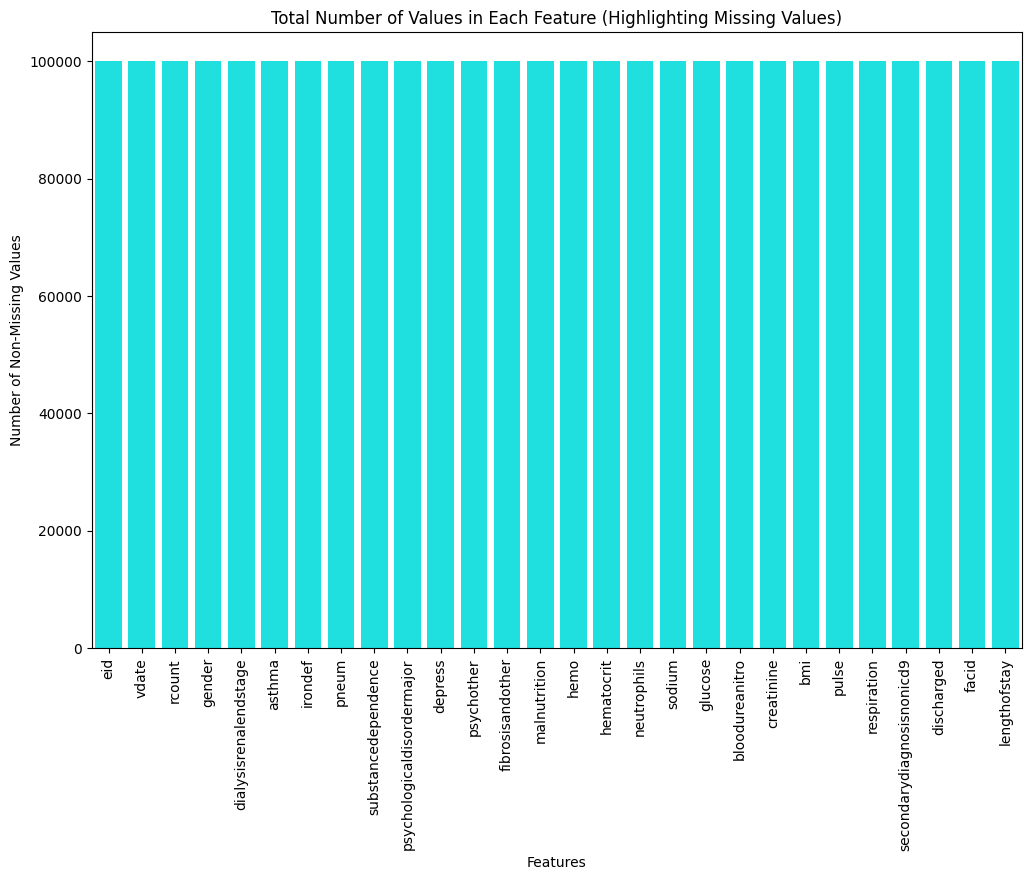

In [ ]:
# Calculate the total number of values for each feature
total_values = df.shape[0]
missing_values = df.isnull().sum()
non_missing_values = total_values - missing_values

# Define colors: one color for features with missing values and another for features without
colors = ['orange' if count > 0 else 'cyan' for count in missing_values]

# Plotting the total number of values
plt.figure(figsize=(12, 8))
sns.barplot(x=non_missing_values.index, y=non_missing_values.values, palette=colors)

# Add labels on top of the bars
for index, value in enumerate(non_missing_values.values):
    plt.text(index, value + 0.02 * total_values, str(value), color='black', ha="center")

plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Number of Non-Missing Values')
plt.title('Total Number of Values in Each Feature (Highlighting Missing Values)')
plt.show()

## Check for Duplication

In [ ]:
# Check for duplication (full record)
print(df.nunique())

eid                           100000
vdate                            367
rcount                             6
gender                             2
dialysisrenalendstage              2
asthma                             2
irondef                            2
pneum                              2
substancedependence                2
psychologicaldisordermajor         2
depress                            2
psychother                         2
fibrosisandother                   2
malnutrition                       2
hemo                               2
hematocrit                       362
neutrophils                      656
sodium                         99948
glucose                        99998
bloodureanitro                   261
creatinine                     99994
bmi                            99994
pulse                            100
respiration                      160
secondarydiagnosisnonicd9         11
discharged                       378
facid                              5
l

In [ ]:
# Check if the record is duplicated (excluded eid)
duplicate_rows = df.duplicated(subset=df.columns.difference(['eid']))

# Check if there is 'True'
print(any(duplicate_rows))

False


# Data Pre-processing (Phase 1)

## Data Reduction

In [ ]:
# Drop eid, facid, vdate, and discharged columns
df = df.drop(['eid', 'facid', 'vdate', 'discharged'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rcount                      100000 non-null  object 
 1   gender                      100000 non-null  object 
 2   dialysisrenalendstage       100000 non-null  int64  
 3   asthma                      100000 non-null  int64  
 4   irondef                     100000 non-null  int64  
 5   pneum                       100000 non-null  int64  
 6   substancedependence         100000 non-null  int64  
 7   psychologicaldisordermajor  100000 non-null  int64  
 8   depress                     100000 non-null  int64  
 9   psychother                  100000 non-null  int64  
 10  fibrosisandother            100000 non-null  int64  
 11  malnutrition                100000 non-null  int64  
 12  hemo                        100000 non-null  int64  
 13  hematocrit     

## Data Transformation

### Convert Data into Appropriate Data Type

In [ ]:
# Define types of columns
# Categorical columns
categorical_cols = ["gender",
                    "rcount",
                    "secondarydiagnosisnonicd9"]

# Binary columns
binary_cols = ["dialysisrenalendstage",
            "asthma",
            "irondef",
            "pneum",
            "substancedependence",
            "psychologicaldisordermajor",
            "depress",
            "psychother",
            "fibrosisandother",
            "malnutrition",
            "hemo"]

# Numerical columns
numerical_cols = ["hematocrit",
            "neutrophils",
            "sodium",
            "glucose",
            "bloodureanitro",
            "creatinine",
            "bmi",
            "pulse",
            "respiration"]

# Target Variable
target_var = ["lengthofstay"]

In [ ]:
# Convert categorical columns to 'category' dtype
df[categorical_cols] = df[categorical_cols].astype('category')

# Verify the changes
print(df.dtypes)

rcount                        category
gender                        category
dialysisrenalendstage            int64
asthma                           int64
irondef                          int64
pneum                            int64
substancedependence              int64
psychologicaldisordermajor       int64
depress                          int64
psychother                       int64
fibrosisandother                 int64
malnutrition                     int64
hemo                             int64
hematocrit                     float64
neutrophils                    float64
sodium                         float64
glucose                        float64
bloodureanitro                 float64
creatinine                     float64
bmi                            float64
pulse                            int64
respiration                    float64
secondarydiagnosisnonicd9     category
lengthofstay                     int64
dtype: object


### Categorical Variables Encoding

In [ ]:
# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical columns
encoded_cols = onehot_encoder.fit_transform(df[categorical_cols])

# Convert the result into a DataFrame
encoded_cols_df = pd.DataFrame(encoded_cols, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Concatenate with the original DataFrame
df_encoded = pd.concat([df, encoded_cols_df], axis=1).drop(categorical_cols, axis=1)

# Verify the changes
encoded_cols_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


gender_M  rcount_1  rcount_2  rcount_3  rcount_4  rcount_5+  \
0       0.0       0.0       0.0       0.0       0.0        0.0   
1       0.0       0.0       0.0       0.0       0.0        1.0   
2       0.0       1.0       0.0       0.0       0.0        0.0   
3       0.0       0.0       0.0       0.0       0.0        0.0   
4       0.0       0.0       0.0       0.0       0.0        0.0   

   secondarydiagnosisnonicd9_1  secondarydiagnosisnonicd9_2  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          1.0   
3                          1.0                          0.0   
4                          0.0                          1.0   

   secondarydiagnosisnonicd9_3  secondarydiagnosisnonicd9_4  \
0                          0.0                          1.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   secondarydiagnosisnonicd9_5  secondarydiagnosisnonicd9_6  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   secondarydiagnosisnonicd9_7  secondarydiagnosisnonicd9_8  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   secondarydiagnosisnonicd9_9  secondarydiagnosisnonicd9_10  
0                          0.0                           0.0  
1                          0.0                           0.0  
2                          0.0                           0.0  
3                          0.0                           0.0  
4                          0.0                           0.0

## Feature Selection (Embedded Method - Random Forest)

In [ ]:
# CALCULATE FEATURE IMPORTANCE USING RANDOM FOREST MODEL

X = df_encoded.drop(columns=['lengthofstay']) # assign all input variables to x
y = df_encoded['lengthofstay']  # assign target variables to y

In [ ]:
# Initialize Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit Random Forest model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

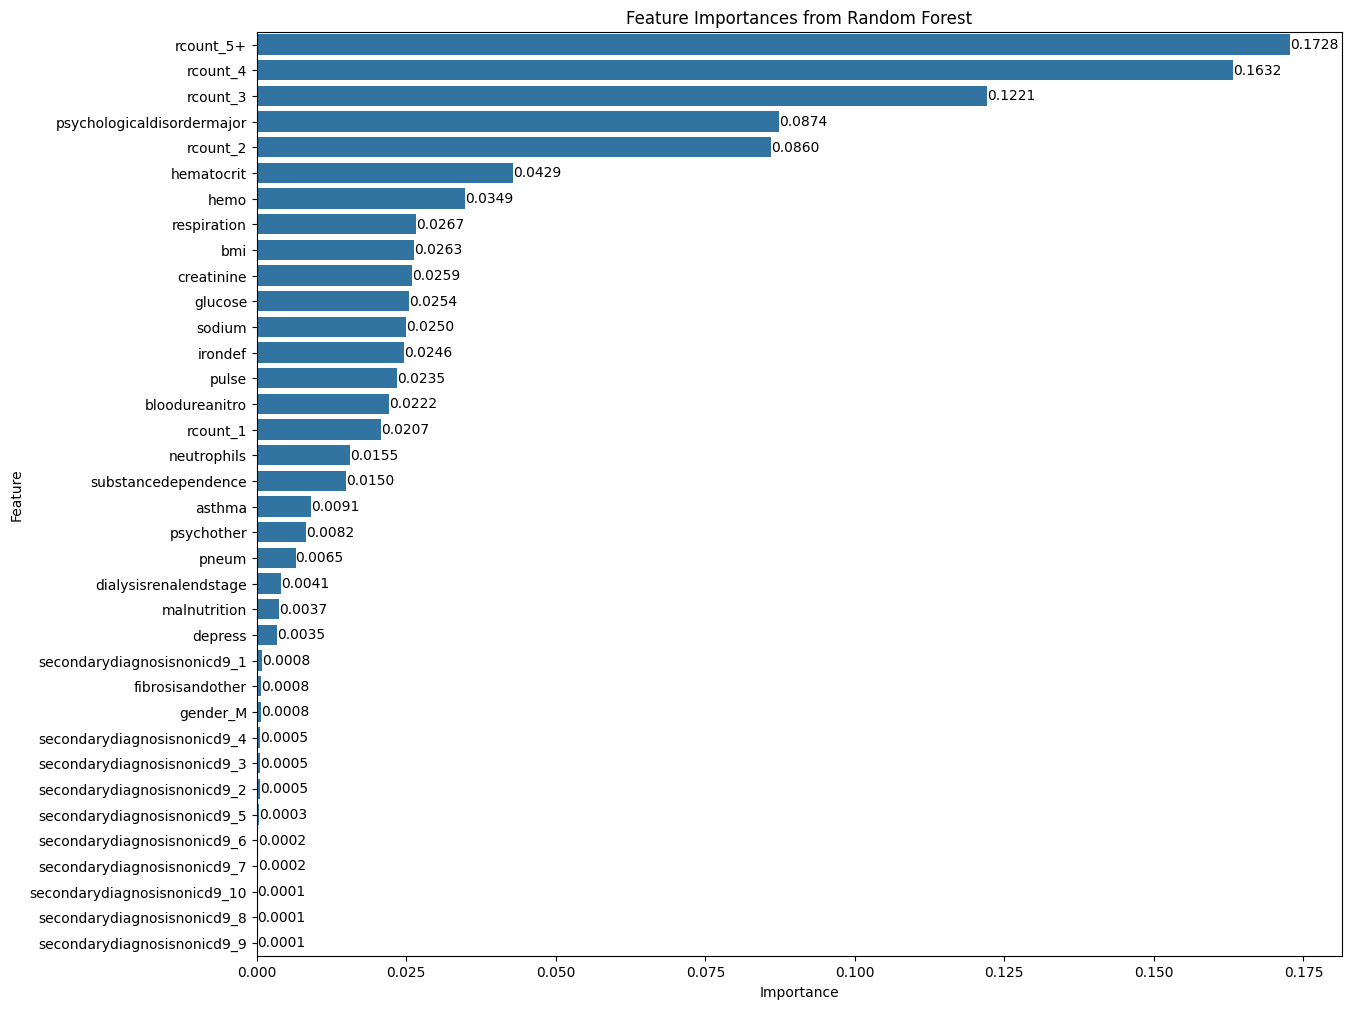

In [ ]:
# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(14, 12))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Annotate each bar with the importance value
for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.show()

In [ ]:
# Drop features with importance value below the threshold of 0.001
df_preprocessed = df_encoded.drop(['fibrosisandother', 'gender_M',
                                   'secondarydiagnosisnonicd9_1',
                                   'secondarydiagnosisnonicd9_2',
                                   'secondarydiagnosisnonicd9_3',
                                   'secondarydiagnosisnonicd9_4',
                                   'secondarydiagnosisnonicd9_5',
                                   'secondarydiagnosisnonicd9_6',
                                   'secondarydiagnosisnonicd9_7',
                                   'secondarydiagnosisnonicd9_8',
                                   'secondarydiagnosisnonicd9_9',
                                   'secondarydiagnosisnonicd9_10'], axis=1)
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   dialysisrenalendstage       100000 non-null  int64  
 1   asthma                      100000 non-null  int64  
 2   irondef                     100000 non-null  int64  
 3   pneum                       100000 non-null  int64  
 4   substancedependence         100000 non-null  int64  
 5   psychologicaldisordermajor  100000 non-null  int64  
 6   depress                     100000 non-null  int64  
 7   psychother                  100000 non-null  int64  
 8   malnutrition                100000 non-null  int64  
 9   hemo                        100000 non-null  int64  
 10  hematocrit                  100000 non-null  float64
 11  neutrophils                 100000 non-null  float64
 12  sodium                      100000 non-null  float64
 13  glucose        

In [ ]:
# Update the un-encoded DataFrame (for EDA purposes)
df = df.drop(['fibrosisandother', 'gender', 'secondarydiagnosisnonicd9'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   rcount                      100000 non-null  category
 1   dialysisrenalendstage       100000 non-null  int64   
 2   asthma                      100000 non-null  int64   
 3   irondef                     100000 non-null  int64   
 4   pneum                       100000 non-null  int64   
 5   substancedependence         100000 non-null  int64   
 6   psychologicaldisordermajor  100000 non-null  int64   
 7   depress                     100000 non-null  int64   
 8   psychother                  100000 non-null  int64   
 9   malnutrition                100000 non-null  int64   
 10  hemo                        100000 non-null  int64   
 11  hematocrit                  100000 non-null  float64 
 12  neutrophils                 100000 non-null  float64 
 13  

In [ ]:
# Update types of columns
# Categorical columns
categorical_cols = ["rcount"]

# Binary columns
binary_cols = ["dialysisrenalendstage",
            "asthma",
            "irondef",
            "pneum",
            "substancedependence",
            "psychologicaldisordermajor",
            "depress",
            "psychother",
            "malnutrition",
            "hemo"]

# Numerical columns
numerical_cols = ["hematocrit",
            "neutrophils",
            "sodium",
            "glucose",
            "bloodureanitro",
            "creatinine",
            "bmi",
            "pulse",
            "respiration"]

# Target Variable
target_var = ["lengthofstay"]

# Data Understanding (Phase 2)

## Descriptive Statistics

In [ ]:
# Summary of categorical and binary columns
# Create an empty list to store summary data
summary_data = []

# Iterate through categorical and binary columns
for column in categorical_cols + binary_cols:
    counts = df[column].value_counts()
    normalized_counts = df[column].value_counts(normalize=True)

    # Append the counts and normalized counts to the summary data
    for value in counts.index:
        summary_data.append({
            'Column': column,
            'Value': value,
            'Count': counts[value],
            'Propotion': normalized_counts[value]
        })

# Create a DataFrame from the summary data
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
print("\nDescriptive Statistics for Categorical Columns:")
print(summary_df)


Descriptive Statistics for Categorical Columns:
                        Column Value  Count  Propotion
0                       rcount     0  55031    0.55031
1                       rcount     1  15007    0.15007
2                       rcount     2   9987    0.09987
3                       rcount     3   8047    0.08047
4                       rcount     4   6941    0.06941
5                       rcount    5+   4987    0.04987
6        dialysisrenalendstage     0  96358    0.96358
7        dialysisrenalendstage     1   3642    0.03642
8                       asthma     0  96473    0.96473
9                       asthma     1   3527    0.03527
10                     irondef     0  90506    0.90506
11                     irondef     1   9494    0.09494
12                       pneum     0  96055    0.96055
13                       pneum     1   3945    0.03945
14         substancedependence     0  93694    0.93694
15         substancedependence     1   6306    0.06306
16  psychologica

In [ ]:
# Summary of numerical columns
print("Descriptive Statistics for Numerical Columns:")
df[numerical_cols].describe()

Descriptive Statistics for Numerical Columns:


hematocrit    neutrophils         sodium        glucose  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       11.975939      10.177455     137.891397     141.963384   
std         2.031792       5.353131       2.999669      29.992996   
min         4.400000       0.100000     124.912632      -1.005927   
25%        10.900000       7.700000     135.871062     121.682383   
50%        11.900000       9.400000     137.887151     142.088545   
75%        12.900000      11.500000     139.912885     162.180996   
max        24.100000     245.900000     151.387283     271.444277   

       bloodureanitro     creatinine            bmi          pulse  \
count   100000.000000  100000.000000  100000.000000  100000.000000   
mean        14.097185       1.099350      29.805759      73.444720   
std         12.952454       0.200262       2.003769      11.644555   
min          1.000000       0.219770      21.992683      21.000000   
25%         11.000000       0.964720      28.454235      66.000000   
50%         12.000000       1.098764      29.807516      73.000000   
75%         14.000000       1.234867      31.156885      81.000000   
max        682.500000       2.035202      38.935293     130.000000   

         respiration  
count  100000.000000  
mean        6.493768  
std         0.568473  
min         0.200000  
25%         6.500000  
50%         6.500000  
75%         6.500000  
max        10.000000

In [ ]:
# Summary of target variable (lengthofstay)
print("Descriptive Statistics for Target Variable (Length of Stay):")
df[target_var].describe()

Descriptive Statistics for Target Variable (Length of Stay):


lengthofstay
count  100000.00000
mean        4.00103
std         2.36031
min         1.00000
25%         2.00000
50%         4.00000
75%         6.00000
max        17.00000

## Graphical Methods

### Categorical and Binary Variables (Univariant Analysis)

Overview of Categorical and Binary Variables

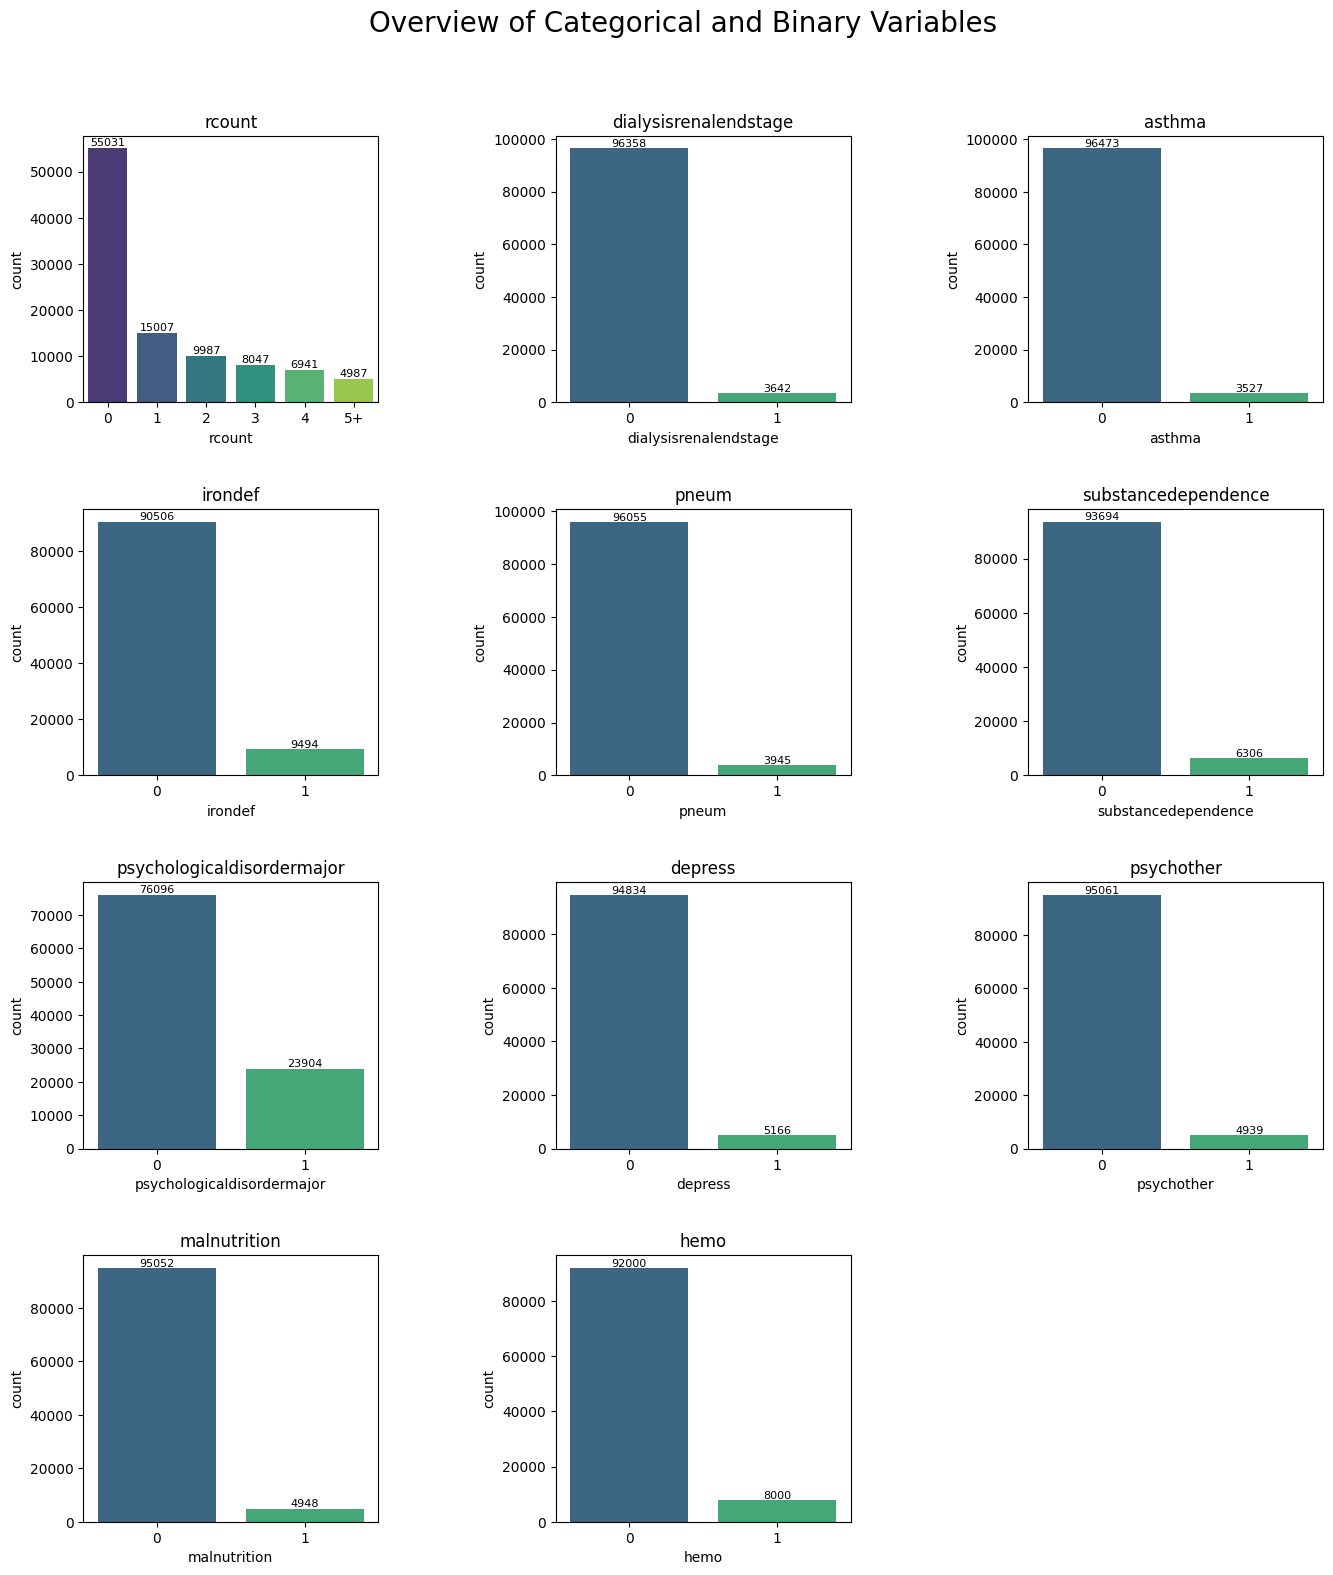

In [ ]:
# Calculate the number of rows and columns for the grid
num_cols = 3
num_rows = int(len(categorical_cols + binary_cols) / num_cols) + (len(categorical_cols + binary_cols) % num_cols > 0)

# Set up the matplotlib figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4.5 * num_rows))

# Add the main title
fig.suptitle('Overview of Categorical and Binary Variables', fontsize=20, y=0.95)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plotting each variable
for i, col in enumerate(categorical_cols + binary_cols):
    ax = sns.countplot(x=df[col], ax=axes[i], hue=df[col], palette='viridis', legend=False)
    axes[i].set_title(col)

    # Add count value for each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 500, '{:1.0f}'.format(height), ha="center", fontsize=8)

# Remove any unused subplots
for i in range(len(categorical_cols + binary_cols), len(axes)):
    fig.delaxes(axes[i])

# Display the plot
plt.subplots_adjust(wspace=0.6, hspace=0.4)
plt.show()



---



In [ ]:
def create_pie_chart(data, column, title):
  """
  Creates a pie chart for a given column in a DataFrame.

  Args:
    data: The pandas DataFrame containing the data.
    column: The name of the column to create the pie chart for.
    title: The title of the pie chart.
  """
  plt.figure(figsize=(6, 6))
  colors = ['#195977', '#507FB6']
  data[column].value_counts().plot.pie(
      autopct='%1.1f%%',
      startangle=90,
      colors=colors,
      wedgeprops={'edgecolor': 'white', 'linewidth': 2}
  )
  plt.title(title)
  plt.ylabel('')
  plt.show()


def create_countplot(data, column, title):
  """
  Creates a bar chart (countplot) for a given column in a DataFrame,
  including count labels on top of each bar.

  Args:
    data: The pandas DataFrame containing the data.
    column: The name of the column to create the bar chart for.
    title: The title of the bar chart.
  """
  plt.figure(figsize=(8, 6))
  ax = sns.countplot(x=data[column], hue=df[column], palette='viridis', legend=False)
  plt.title(title)

  # Add count value for each bar
  for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x() + p.get_width() / 2, height + 500,
              '{:1.0f}'.format(height), ha="center", fontsize=10)

  plt.show()



---



Analysis of Readmission Count Variable

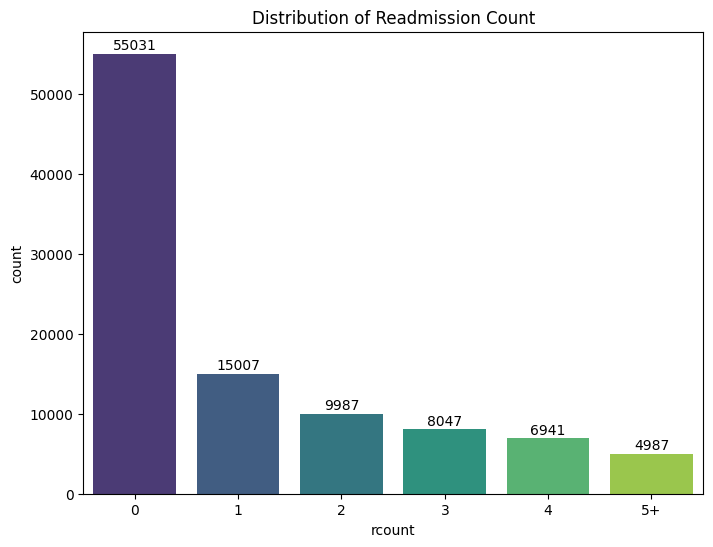

In [ ]:
# Plot bar chart for rcount
create_countplot(df, "rcount", "Distribution of Readmission Count")

Analysis of Dialysis Renal End-Stage Variable

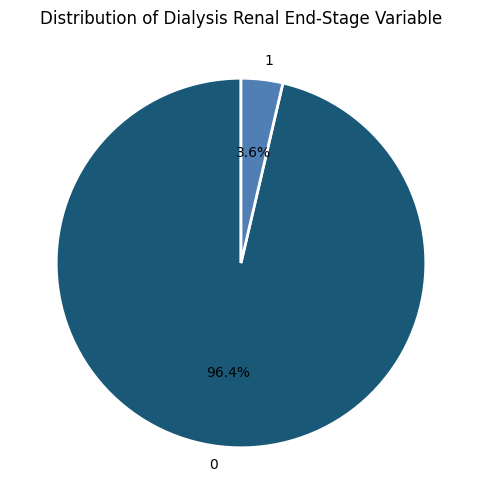

In [ ]:
# Plot pie chart for dialysisrenalendstage
create_pie_chart(df, "dialysisrenalendstage",
                 "Distribution of Dialysis Renal End-Stage Variable")

Analysis of Asthma Variable

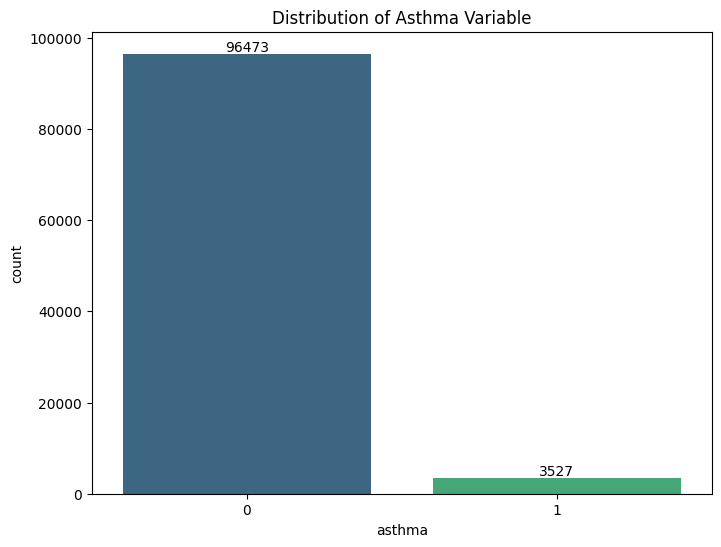

In [ ]:
# Plot bar chart for asthma
create_countplot(df, "asthma", "Distribution of Asthma Variable")

Analysis of Iron Deficiency Variable

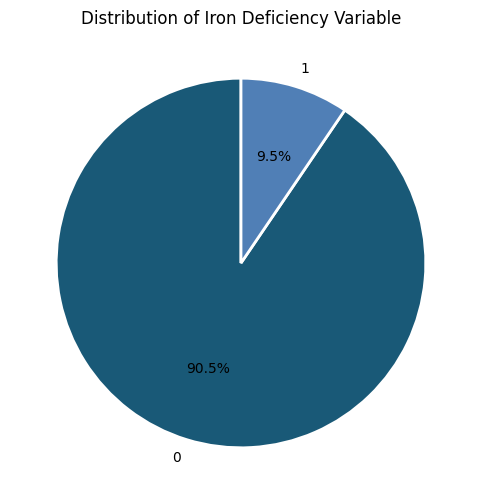

In [ ]:
# Plot pie chart for irondef
create_pie_chart(df, "irondef", "Distribution of Iron Deficiency Variable")

Analysis of Pneumonia Variable

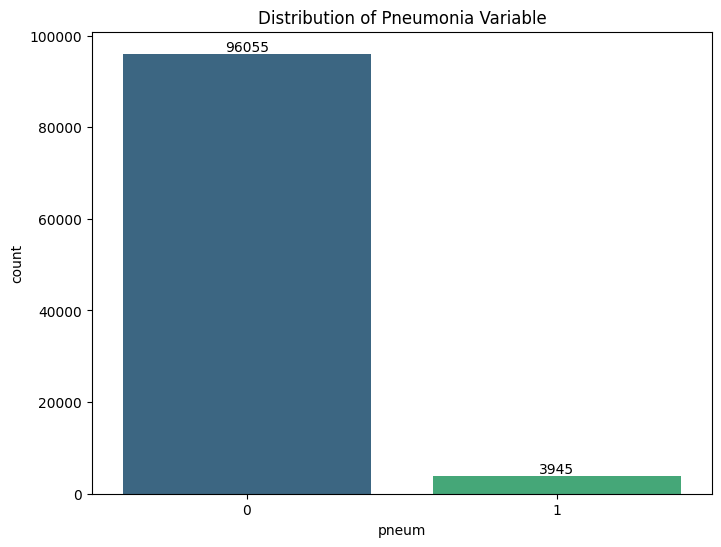

In [ ]:
# Plot bar chart for pneum
create_countplot(df, "pneum", "Distribution of Pneumonia Variable")

Analysis of Substance Dependence Variable

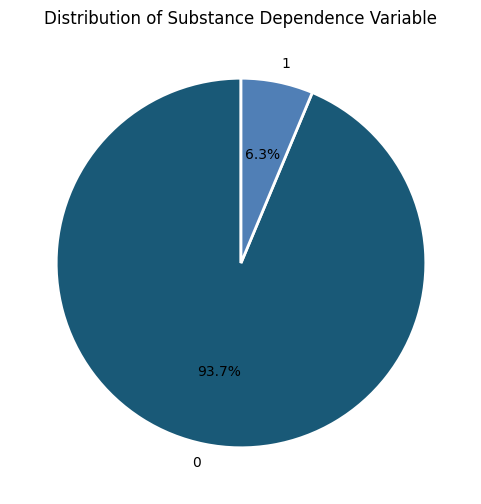

In [ ]:
# Plot pie chart for substancedependence
create_pie_chart(df, "substancedependence", "Distribution of Substance Dependence Variable")

Analysis of Major Psychological Disorder Variable

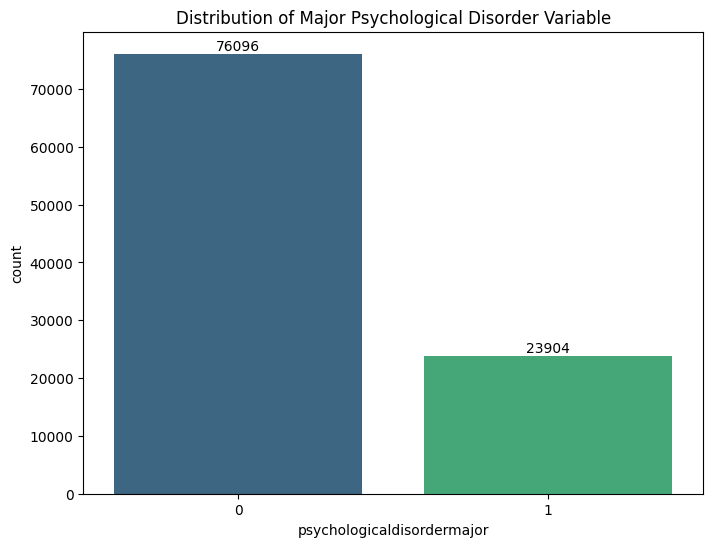

In [ ]:
# Plot bar chart for psychologicaldisordermajor
create_countplot(df, "psychologicaldisordermajor", "Distribution of Major Psychological Disorder Variable")

Analysis of Depress Variable

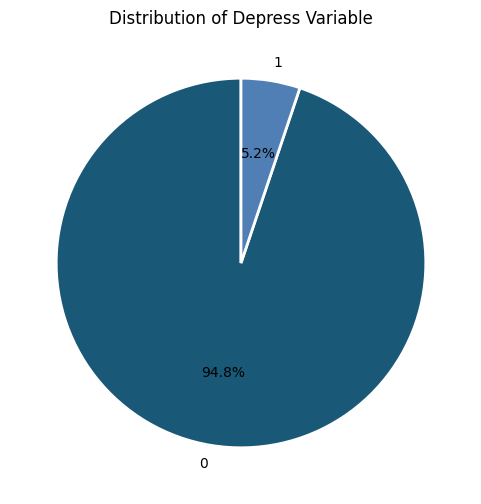

In [ ]:
# Plot pie chart for depress
create_pie_chart(df, "depress", "Distribution of Depress Variable")

Analysis of Other Psychological Disorder Variable

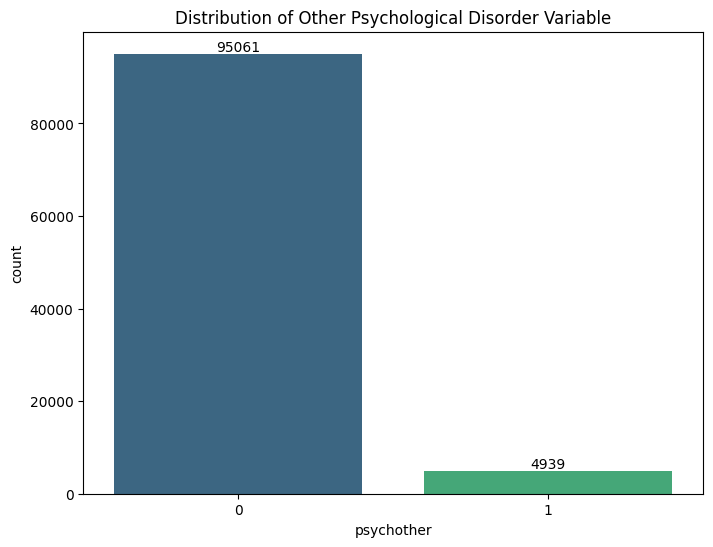

In [ ]:
# Plot bar chart for psychother
create_countplot(df, "psychother", "Distribution of Other Psychological Disorder Variable")

Analysis of Malnutrition Variable

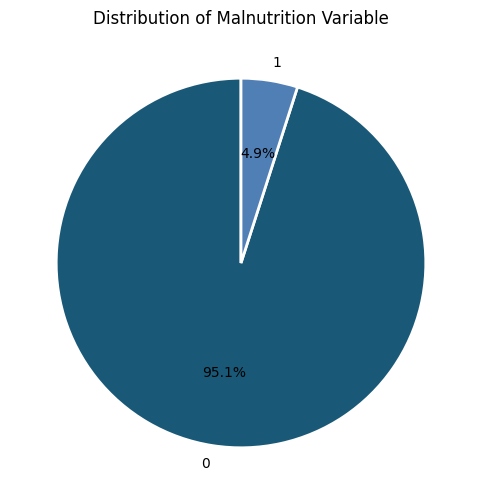

In [ ]:
# Plot pie chart for malnutrition
create_pie_chart(df, "malnutrition", "Distribution of Malnutrition Variable")

Analysis of Blood Disorder (hemo) Variable

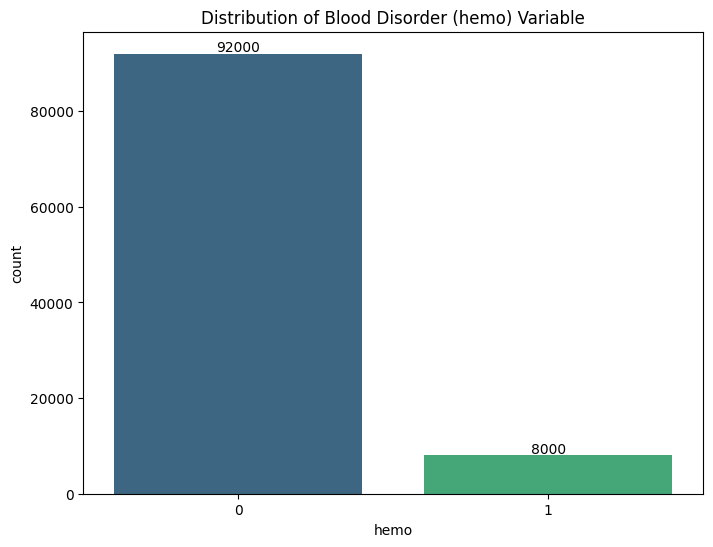

In [ ]:
# Plot bar chart for hemo
create_countplot(df, "hemo", "Distribution of Blood Disorder (hemo) Variable")

### Numerical Variables (Univariant Analysis)

Overview of Numerical Variables

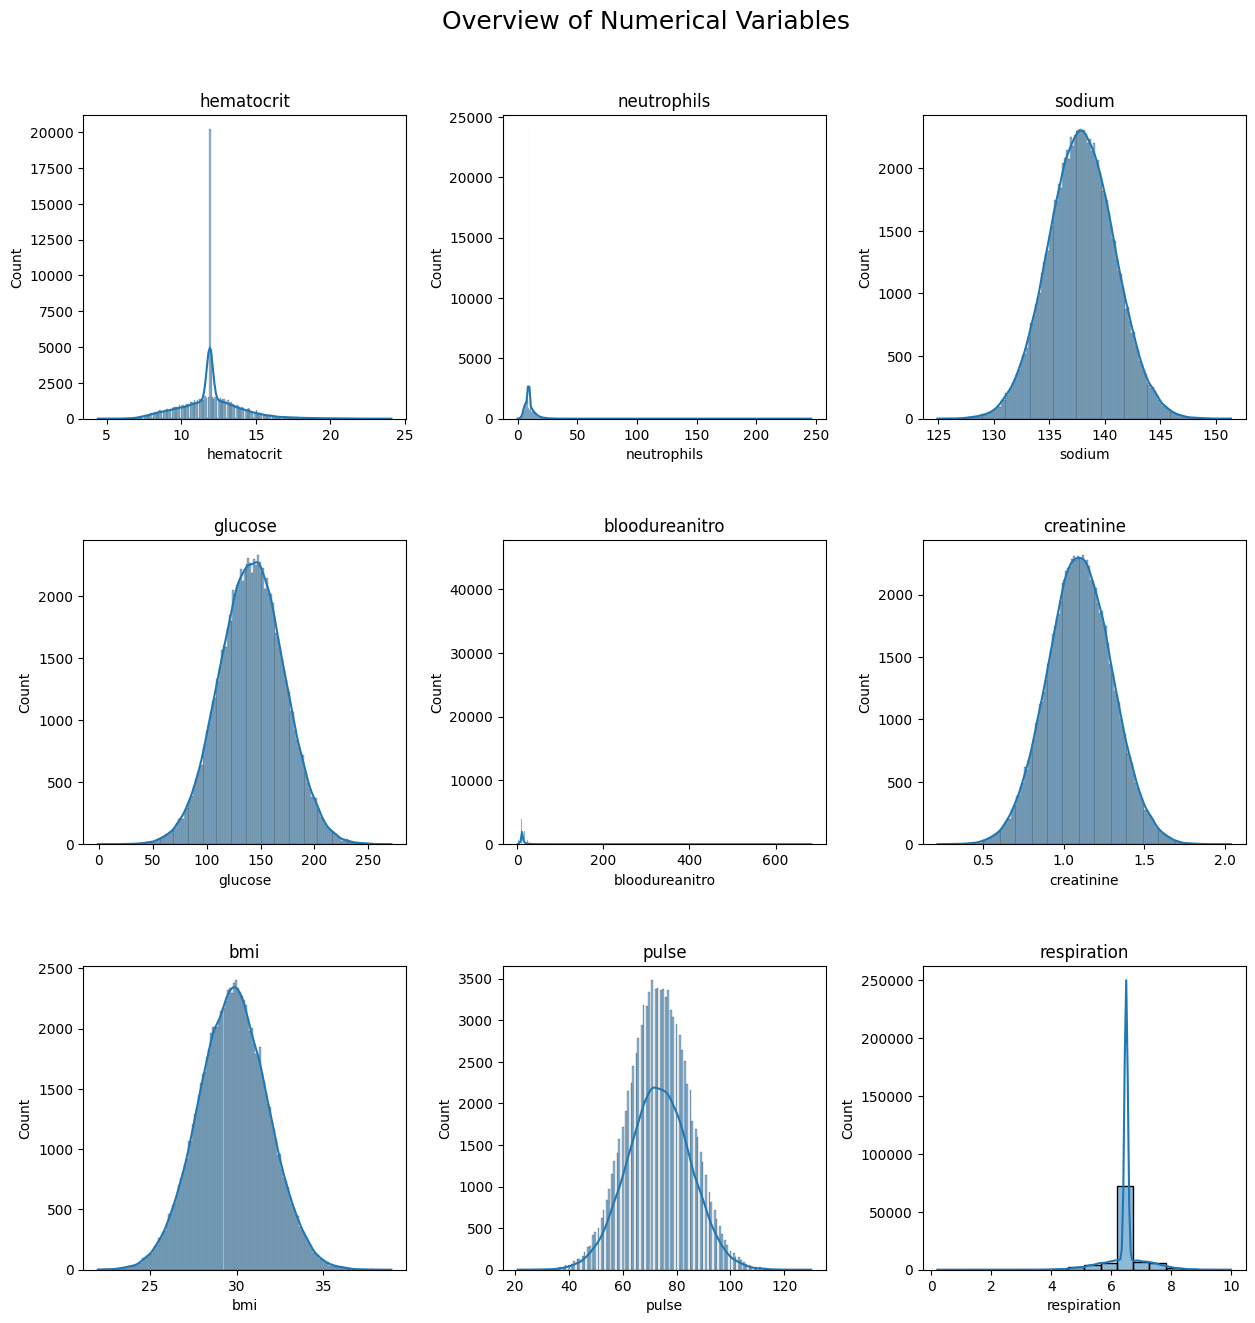

In [ ]:
# Calculate the number of rows and columns for the grid
num_cols = 3
num_rows = int(len(numerical_cols) / num_cols) + (len(numerical_cols) % num_cols > 0)

# Set up the matplotlib figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Add the main title
fig.suptitle('Overview of Numerical Variables', fontsize=18, y=0.95)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plotting each variable
for i, col in enumerate(numerical_cols):
    ax = sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove any unused subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

# Display the plot
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()



---



In [ ]:
def plot_histogram_boxplot(data, column, his_title, bp_title):
  """
  Creates a histogram and boxplot side by side for a given column in a DataFrame.

  Args:
    data: Pandas DataFrame containing the data.
    column: Name of the column to plot.
    his_title: Title of the histogram.
    bp_title: Title of the boxplot.
  """

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Histogram
  sns.histplot(data[column], kde=True, ax=axes[0])
  axes[0].set_title(his_title)
  axes[0].set_xlabel(column)
  axes[0].set_ylabel('Frequency')

  # Calculate descriptive statistics
  skewness = data[column].skew()
  kurtosis = data[column].kurtosis()
  mean = data[column].mean()
  median = data[column].median()
  mode = data[column].mode().iloc[0] if not data[column].mode().empty else None
  std = data[column].std()

  # Add vertical lines for mean, median, and mode to histogram
  axes[0].axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
  axes[0].axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
  axes[0].axvline(mode, color='b', linestyle='-.', label=f'Mode: {mode:.2f}')

  # Add descriptive statistics to histogram
  textstr = '\n'.join((
      r'Skewness: %.2f' % (skewness,),
      r'Kurtosis: %.2f' % (kurtosis,),
      r'Std Dev: %.2f' % (std,)
  ))
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  axes[0].text(0.05, 0.95, textstr, transform=axes[0].transAxes, fontsize=10,
              verticalalignment='top', bbox=props)

  # Add legend to histogram
  axes[0].legend()

  # Boxplot
  sns.boxplot(y=data[column], ax=axes[1])
  axes[1].set_title(bp_title)
  axes[1].set_ylabel(column)

  # Calculate boxplot statistics
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  num_outliers = ((data[column] < lower_bound) |
                  (data[column] > upper_bound)).sum()

  # Add horizontal line for median to boxplot
  axes[1].axhline(y=median, color='r', linestyle='--',
                  label=f'Median: {median:.2f}')

  # Add boxplot statistics to boxplot
  textstr = '\n'.join((
      r'IQR: %.2f' % (IQR,),
      r'Q1: %.2f' % (Q1,),
      r'Q3: %.2f' % (Q3,),
      r'Lower Bound: %.2f' % (lower_bound,),
      r'Upper Bound: %.2f' % (upper_bound,),
      r'# Outliers: {}'.format(num_outliers)
  ))
  axes[1].text(0.05, 0.95, textstr, transform=axes[1].transAxes, fontsize=10,
              verticalalignment='top', bbox=props)

  # Add legend to histogram
  axes[1].legend()

  plt.tight_layout()
  plt.show()



---



Analysis of Hematocrit Variable

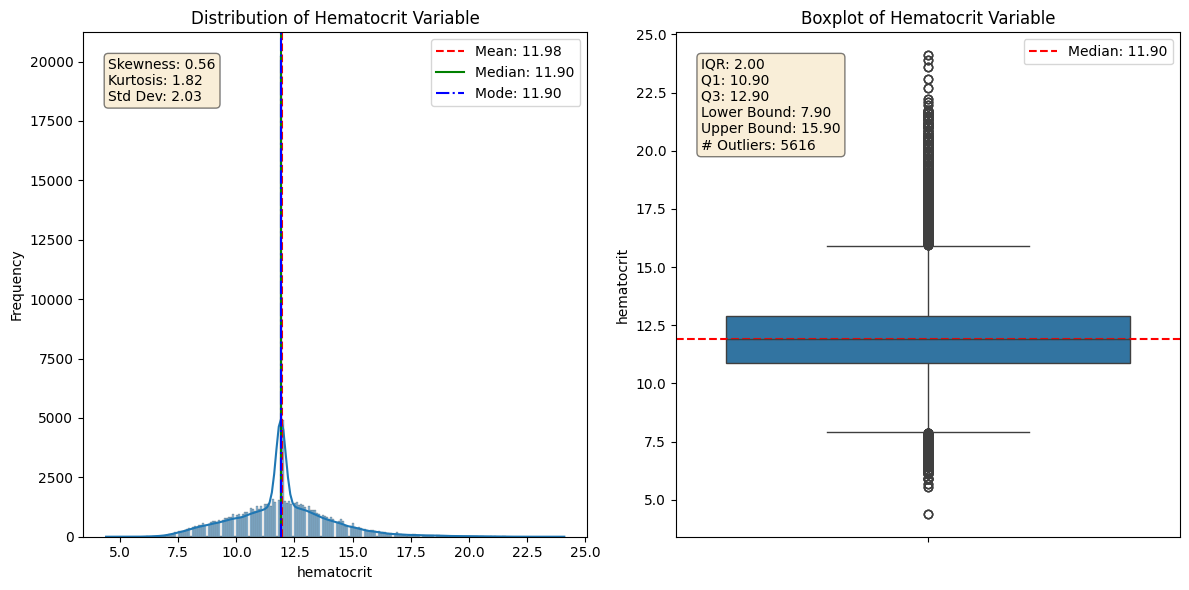

In [ ]:
# Plot histogram_boxplot for hematocrit
plot_histogram_boxplot(df, "hematocrit", "Distribution of Hematocrit Variable", "Boxplot of Hematocrit Variable")

Analysis of Neutrophils Variable

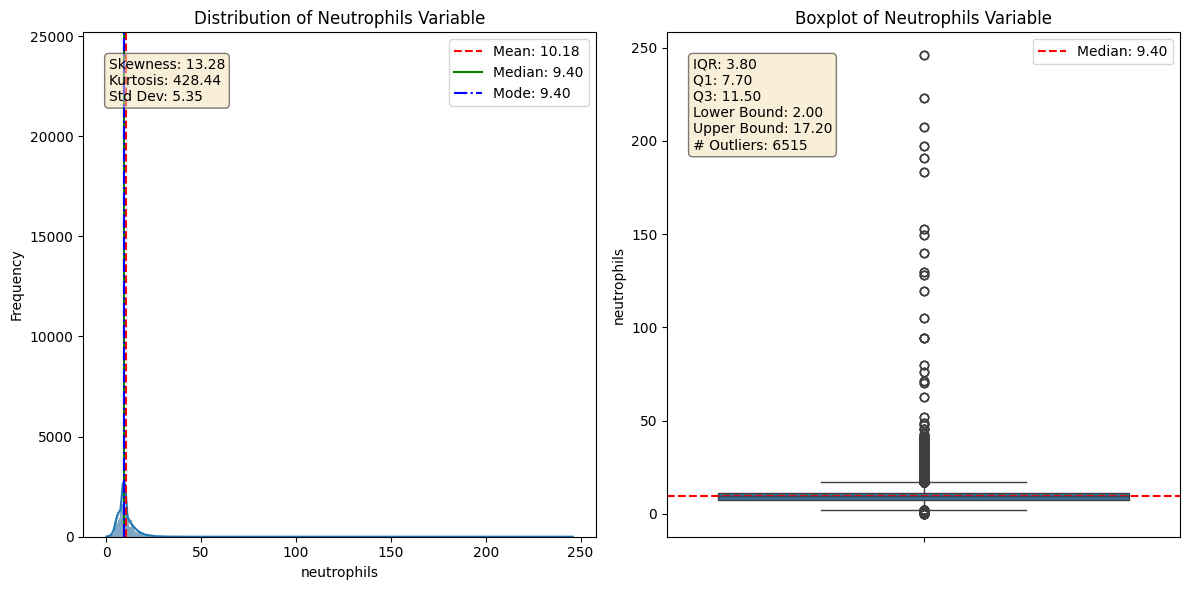

In [ ]:
# Plot histogram_boxplot for neutrophils
plot_histogram_boxplot(df, "neutrophils", "Distribution of Neutrophils Variable", "Boxplot of Neutrophils Variable")

Analysis of Sodium Variable

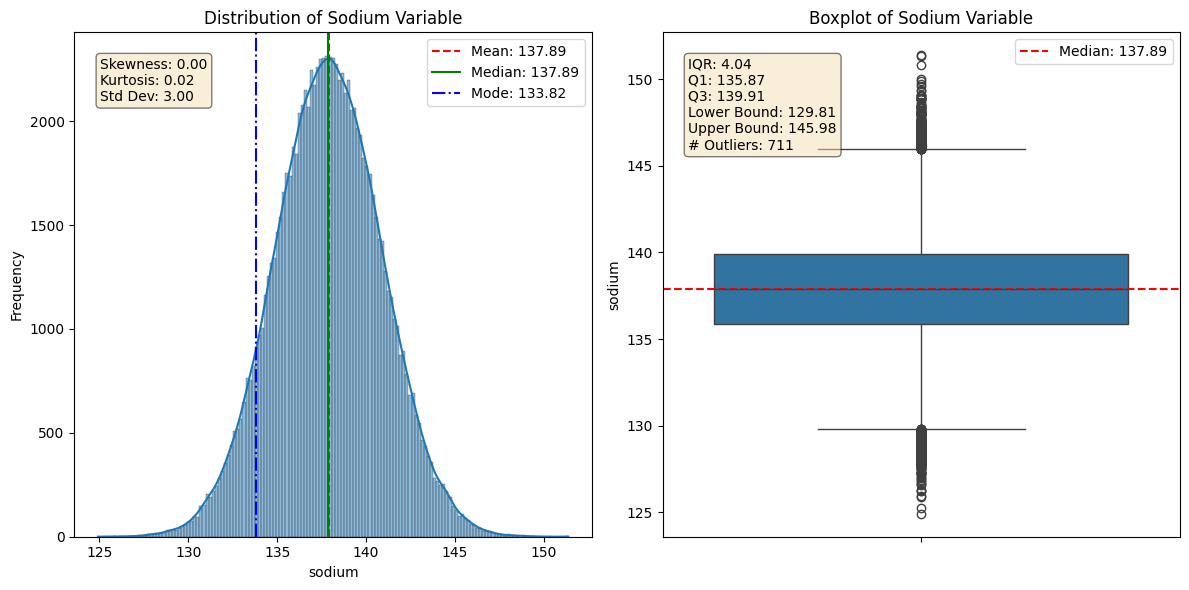

In [ ]:
# Plot histogram_boxplot for sodium
plot_histogram_boxplot(df, "sodium", "Distribution of Sodium Variable", "Boxplot of Sodium Variable")

Analysis of Glucose Variable

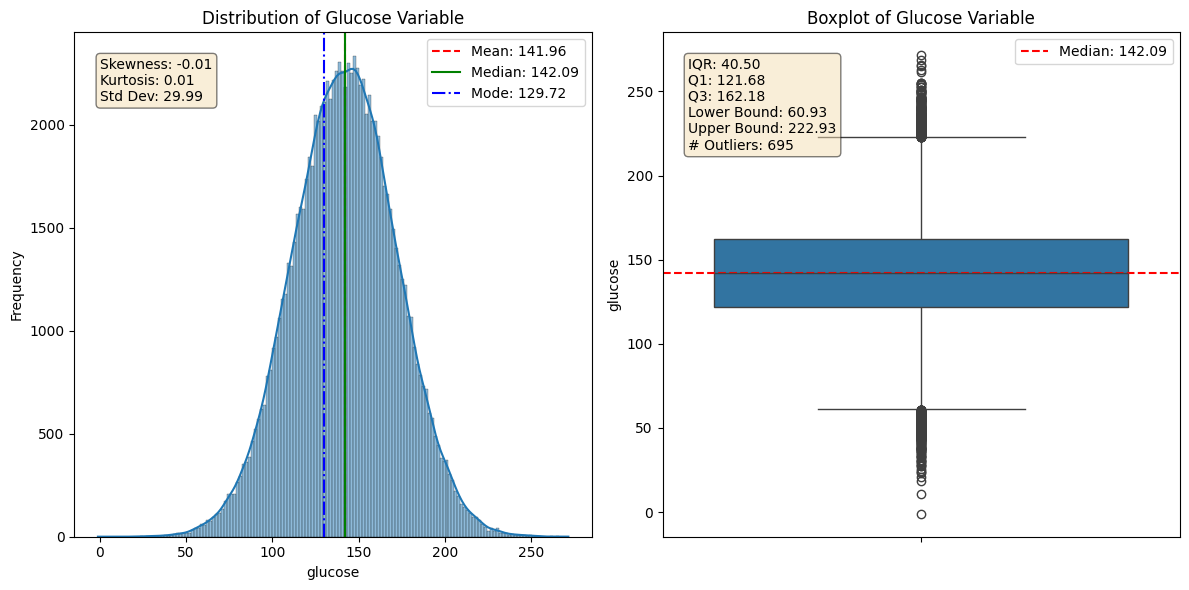

In [ ]:
# Plot histogram_boxplot for glucose
plot_histogram_boxplot(df, "glucose", "Distribution of Glucose Variable", "Boxplot of Glucose Variable")

Analysis of Blood Urea Nitrogen Variable

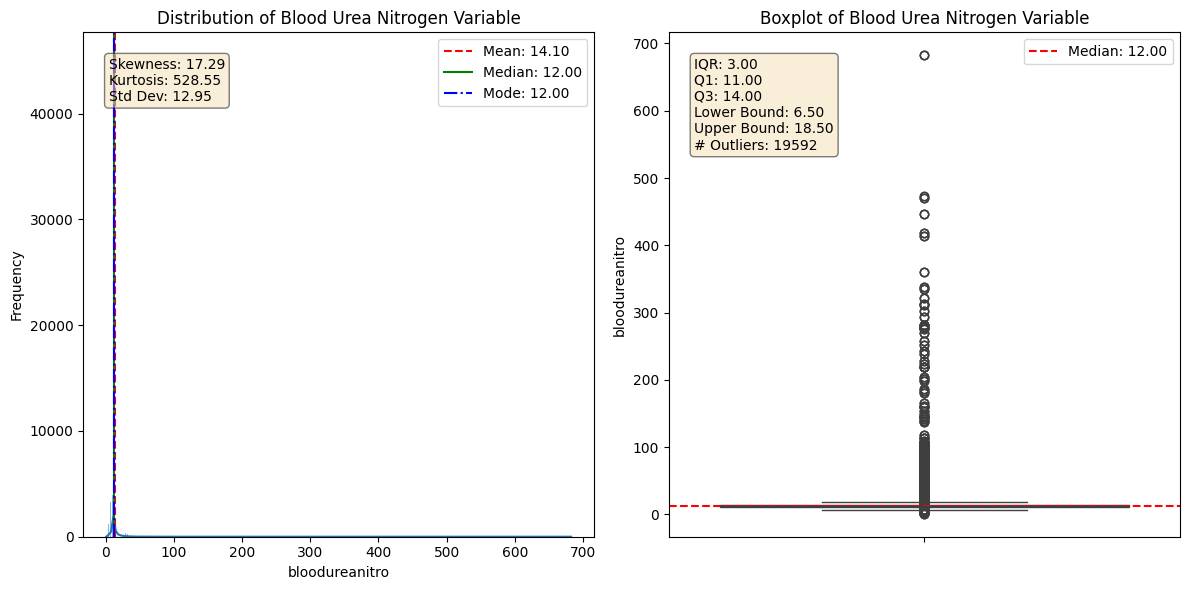

In [ ]:
# Plot histogram_boxplot for bloodureanitro
plot_histogram_boxplot(df, "bloodureanitro", "Distribution of Blood Urea Nitrogen Variable", "Boxplot of Blood Urea Nitrogen Variable")

Analysis of Creatinine Variable

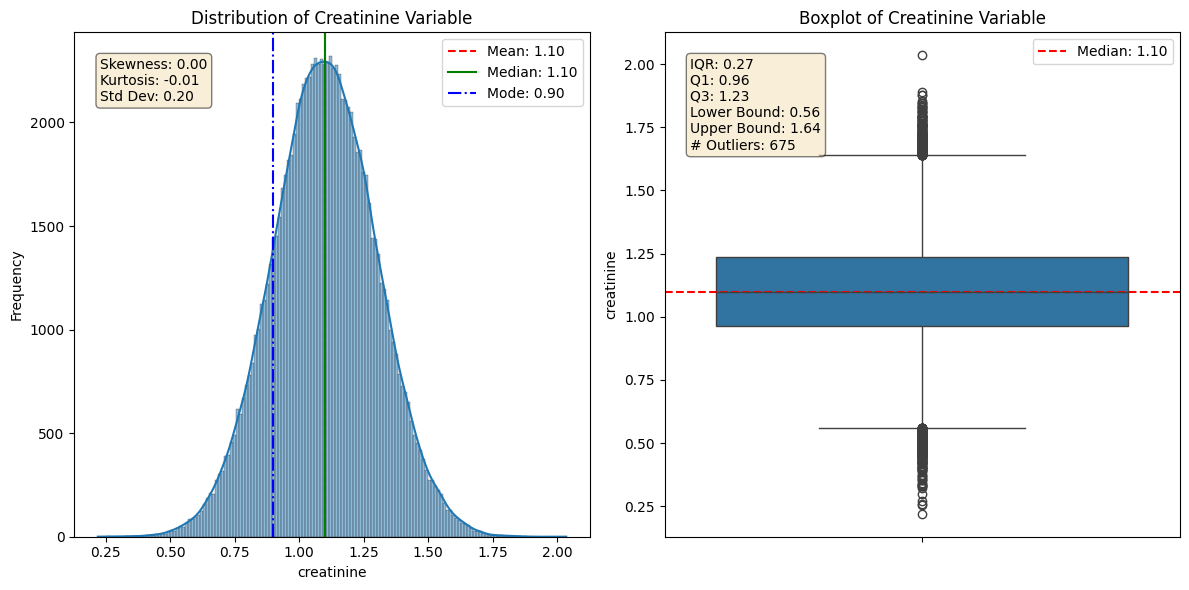

In [ ]:
# Plot histogram_boxplot for creatinine
plot_histogram_boxplot(df, "creatinine", "Distribution of Creatinine Variable", "Boxplot of Creatinine Variable")

Analysis of BMI Variable

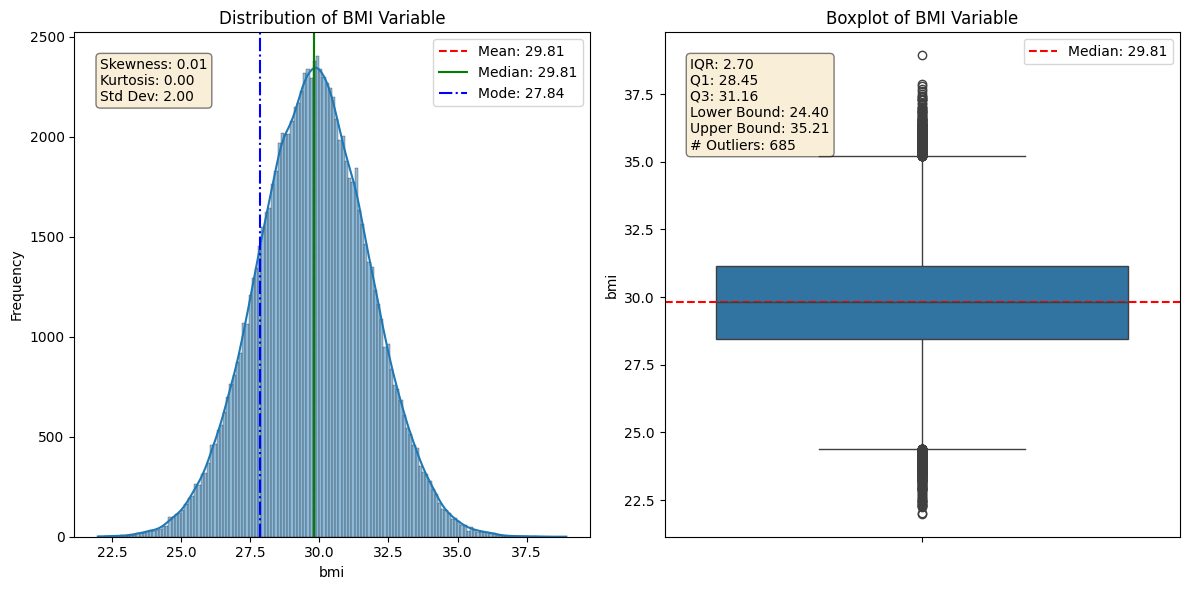

In [ ]:
# Plot histogram_boxplot for bmi
plot_histogram_boxplot(df, "bmi", "Distribution of BMI Variable", "Boxplot of BMI Variable")

Analysis of Pulse Variable

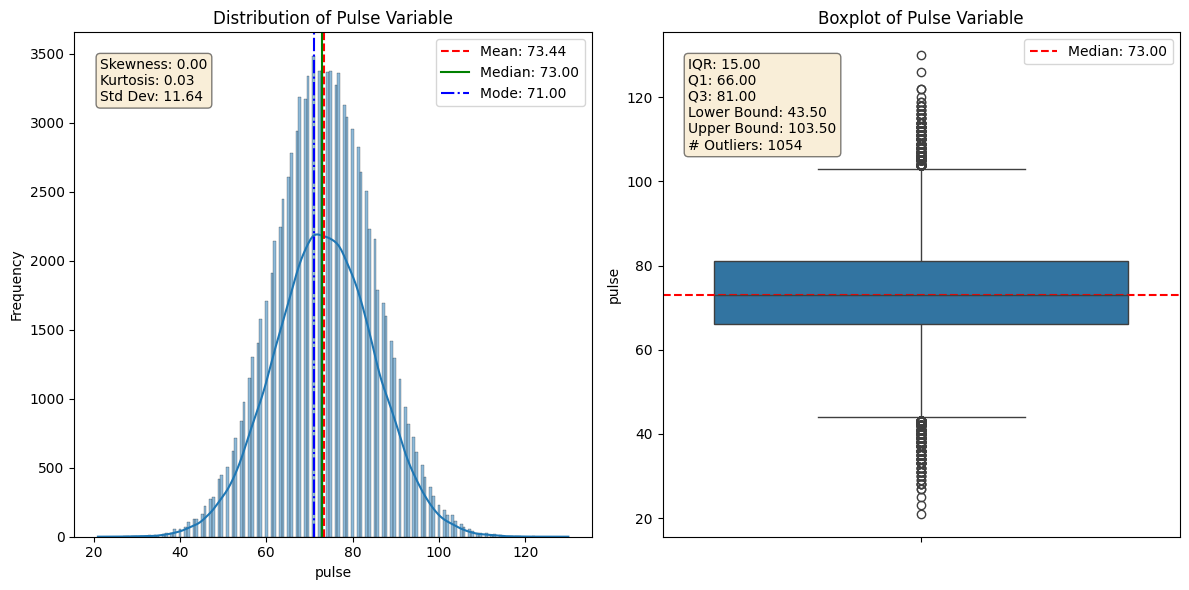

In [ ]:
# Plot histogram_boxplot for pulse
plot_histogram_boxplot(df, "pulse", "Distribution of Pulse Variable", "Boxplot of Pulse Variable")

Analysis of Respiration Variable

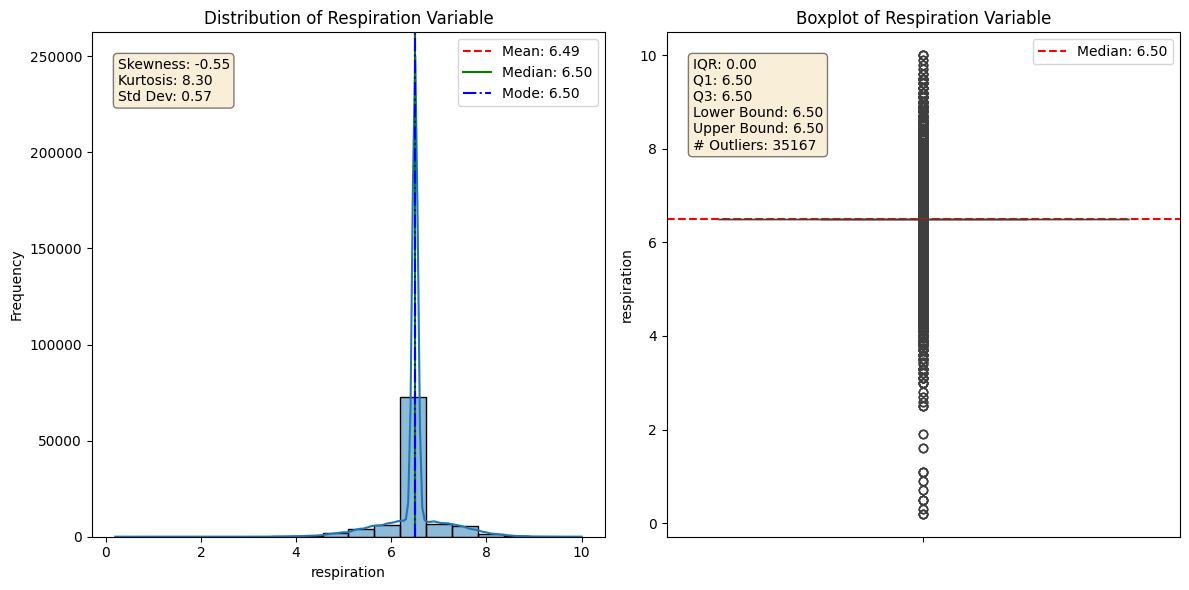

In [ ]:
# Plot histogram_boxplot for respiration
plot_histogram_boxplot(df, "respiration", "Distribution of Respiration Variable", "Boxplot of Respiration Variable")

### Target Variable (Univariant Analysis)

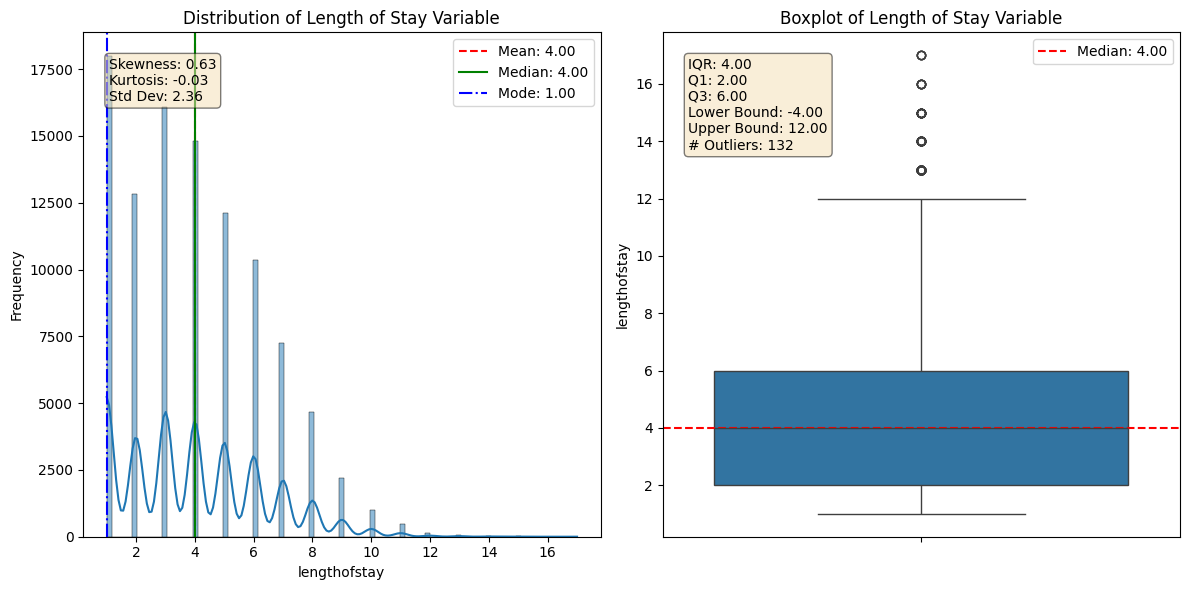

In [ ]:
# Plot histogram_boxplot for lengthofstay
plot_histogram_boxplot(df, "lengthofstay", "Distribution of Length of Stay Variable", "Boxplot of Length of Stay Variable")

# Data Pre-processing (Phase 2)

## Feature Renaming (Expert Opinion)

In [ ]:
# Rename two feature name based on expert opinion
df_preprocessed.rename(columns={
    'hematocrit': 'hemoglobin',
    'neutrophils': 'leukocytes'
}, inplace=True)

df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   dialysisrenalendstage       100000 non-null  int64  
 1   asthma                      100000 non-null  int64  
 2   irondef                     100000 non-null  int64  
 3   pneum                       100000 non-null  int64  
 4   substancedependence         100000 non-null  int64  
 5   psychologicaldisordermajor  100000 non-null  int64  
 6   depress                     100000 non-null  int64  
 7   psychother                  100000 non-null  int64  
 8   malnutrition                100000 non-null  int64  
 9   hemo                        100000 non-null  int64  
 10  hemoglobin                  100000 non-null  float64
 11  leukocytes                  100000 non-null  float64
 12  sodium                      100000 non-null  float64
 13  glucose        

In [ ]:
# For EDA purposes
df.rename(columns={
    'hematocrit': 'hemoglobin',
    'neutrophils': 'leukocytes'
}, inplace=True)

## Invalid Data Removal (Expert Opinion)

In [ ]:
# Remove records where 'bloodureanitro' is more than 200
df_preprocessed = df_preprocessed[df_preprocessed['bloodureanitro'] <= 200]

# Remove the 'respiration' column in place
df_preprocessed.drop(columns=['respiration'], inplace=True)

# Remove rows with negative glucose values
df_preprocessed = df_preprocessed[df_preprocessed['glucose'] >= 0]

In [ ]:
# For EDA purposes
df = df[df['bloodureanitro'] <= 200]
df.drop(columns=['respiration'], inplace=True)
df = df[df['glucose'] >= 0]

## Handling Outliers (Experiments)

### Hemoglobin Variable

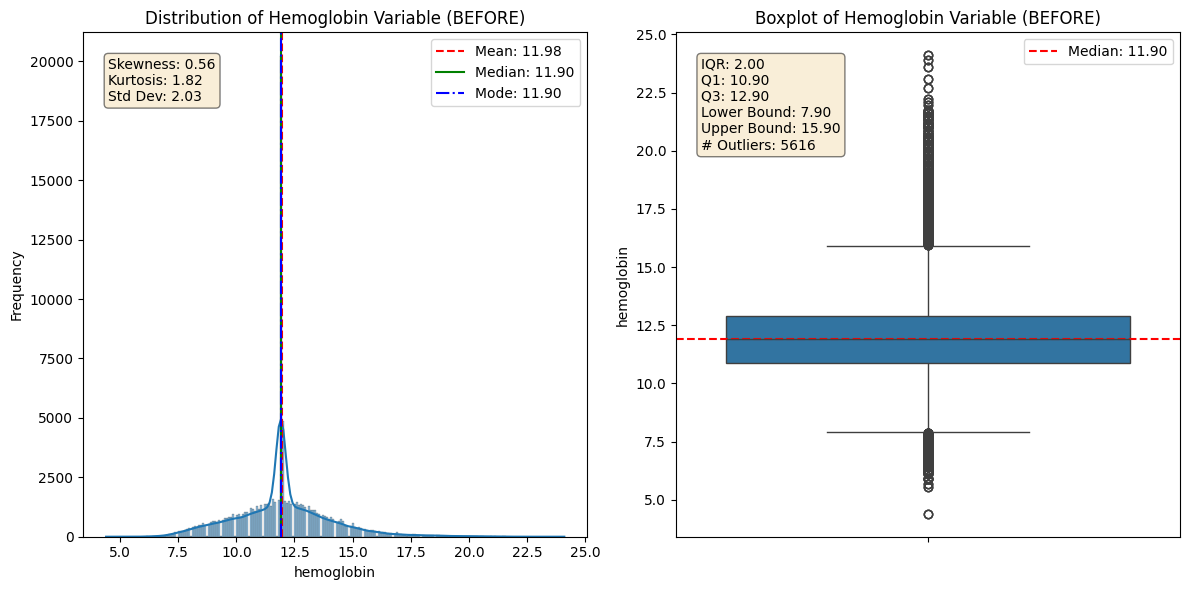

In [ ]:
# Plot histogram_boxplot for hemoglobin (BEFORE)
plot_histogram_boxplot(df, "hemoglobin", "Distribution of Hemoglobin Variable (BEFORE)", "Boxplot of Hemoglobin Variable (BEFORE)")

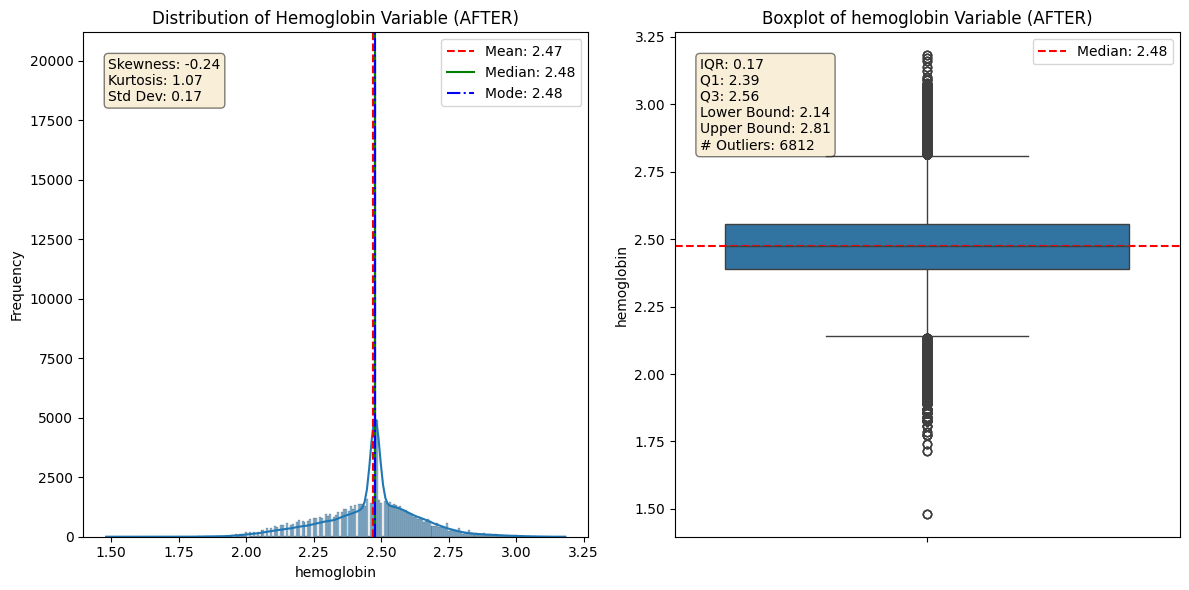

In [ ]:
# LOG TRANSFORMATION
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Apply log transformation to hemoglobin
df_outliers_preview['hemoglobin'] = np.log(df['hemoglobin'])

# Plot histogram_boxplot for hemoglobin (AFTER)
plot_histogram_boxplot(df_outliers_preview, "hemoglobin", "Distribution of Hemoglobin Variable (AFTER)", "Boxplot of hemoglobin Variable (AFTER)")

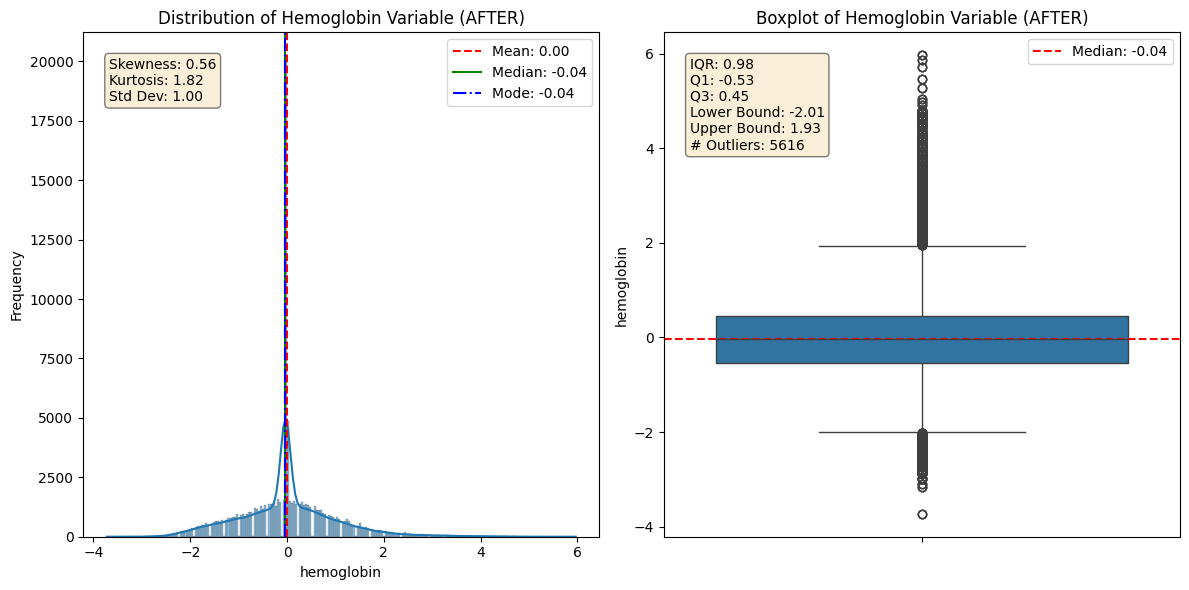

In [ ]:
# STANDARDISATION (STANDARD SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'hemoglobin' column
df_outliers_preview['hemoglobin'] = scaler.fit_transform(df[['hemoglobin']])

# Plot histogram_boxplot for hemoglobin (AFTER)
plot_histogram_boxplot(df_outliers_preview, "hemoglobin", "Distribution of Hemoglobin Variable (AFTER)", "Boxplot of Hemoglobin Variable (AFTER)")

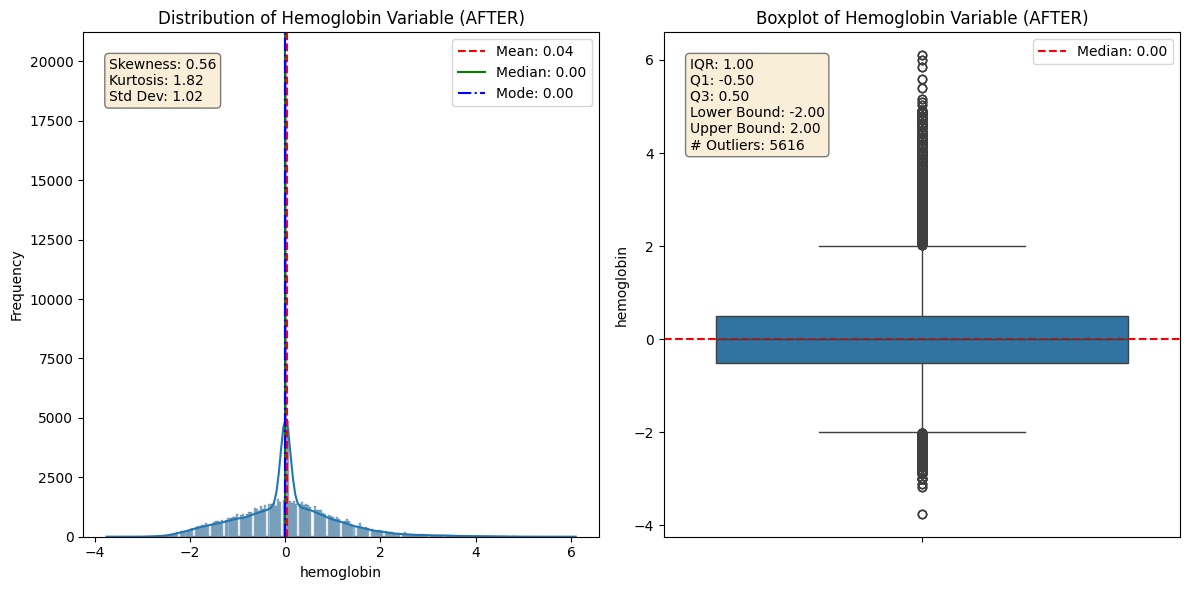

In [ ]:
# STANDARDISATION (ROBUST SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the 'hemoglobin' column
df_outliers_preview['hemoglobin'] = scaler.fit_transform(df[['hemoglobin']])

# Plot histogram_boxplot for hemoglobin (AFTER)
plot_histogram_boxplot(df_outliers_preview, "hemoglobin", "Distribution of Hemoglobin Variable (AFTER)", "Boxplot of Hemoglobin Variable (AFTER)")

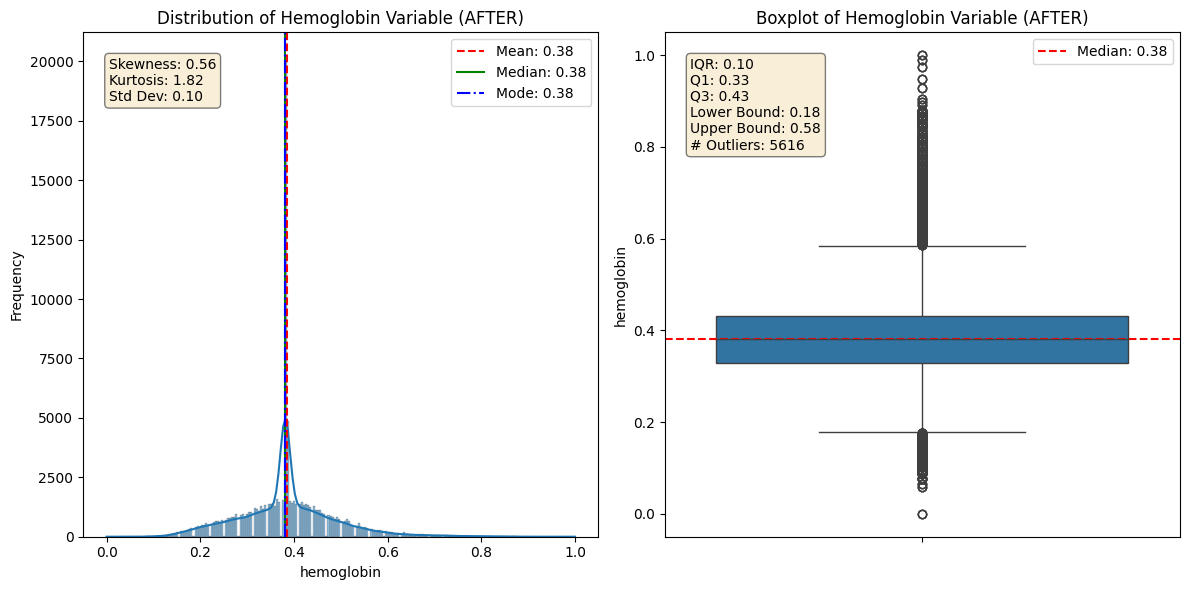

In [ ]:
# NORMALISATION (MIN MAX SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'hemoglobin' column
df_outliers_preview['hemoglobin'] = scaler.fit_transform(df[['hemoglobin']])

# Plot histogram_boxplot for hemoglobin (AFTER)
plot_histogram_boxplot(df_outliers_preview, "hemoglobin", "Distribution of Hemoglobin Variable (AFTER)", "Boxplot of Hemoglobin Variable (AFTER)")

### Leukocytes Variable

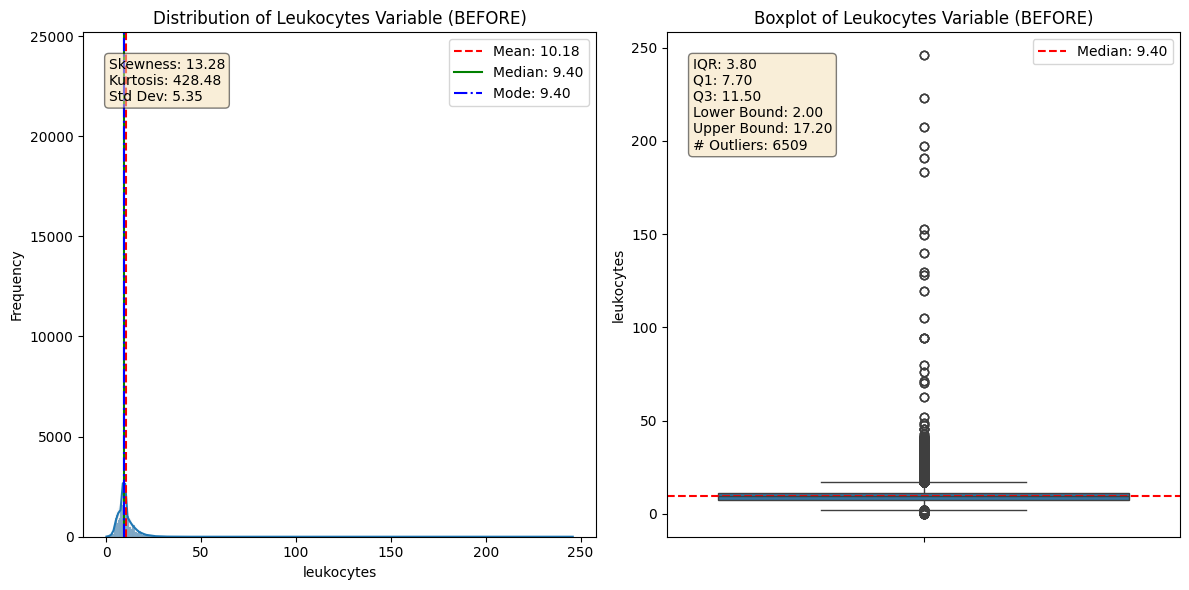

In [ ]:
# Plot histogram_boxplot for leukocytes (BEFORE)
plot_histogram_boxplot(df, "leukocytes", "Distribution of Leukocytes Variable (BEFORE)", "Boxplot of Leukocytes Variable (BEFORE)")

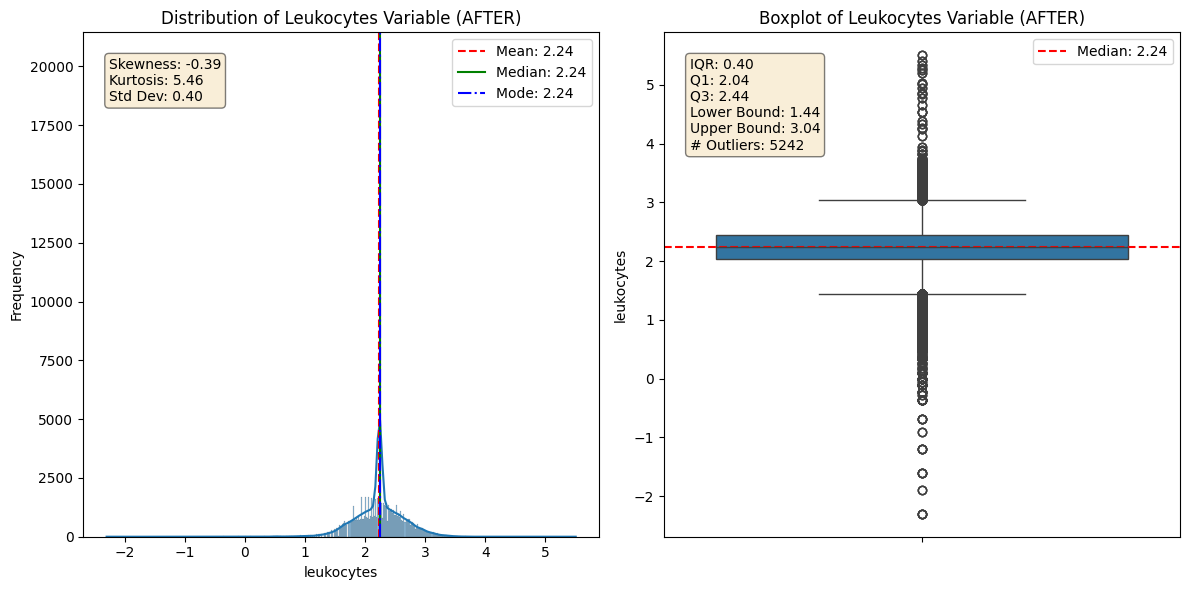

In [ ]:
# LOG TRANSFORMATION
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Apply log transformation to leukocytes
df_outliers_preview['leukocytes'] = np.log(df['leukocytes'])

# Plot histogram_boxplot for leukocytes (AFTER)
plot_histogram_boxplot(df_outliers_preview, "leukocytes", "Distribution of Leukocytes Variable (AFTER)", "Boxplot of Leukocytes Variable (AFTER)")

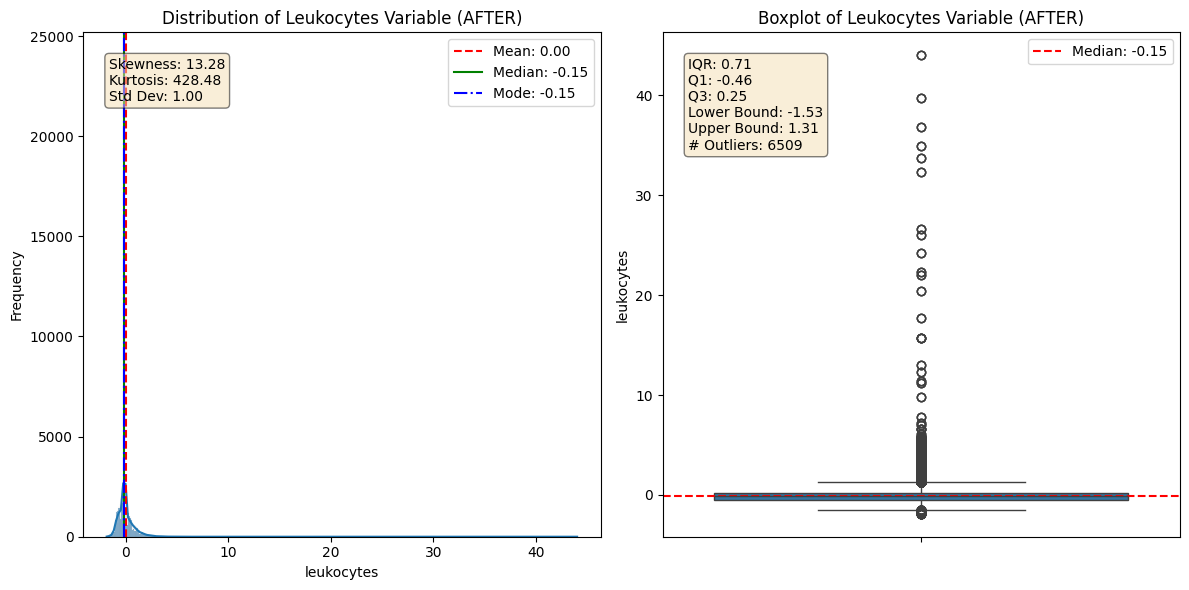

In [ ]:
# STANDARDISATION (STANDARD SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'leukocytes' column
df_outliers_preview['leukocytes'] = scaler.fit_transform(df[['leukocytes']])

# Plot histogram_boxplot for leukocytes (AFTER)
plot_histogram_boxplot(df_outliers_preview, "leukocytes", "Distribution of Leukocytes Variable (AFTER)", "Boxplot of Leukocytes Variable (AFTER)")

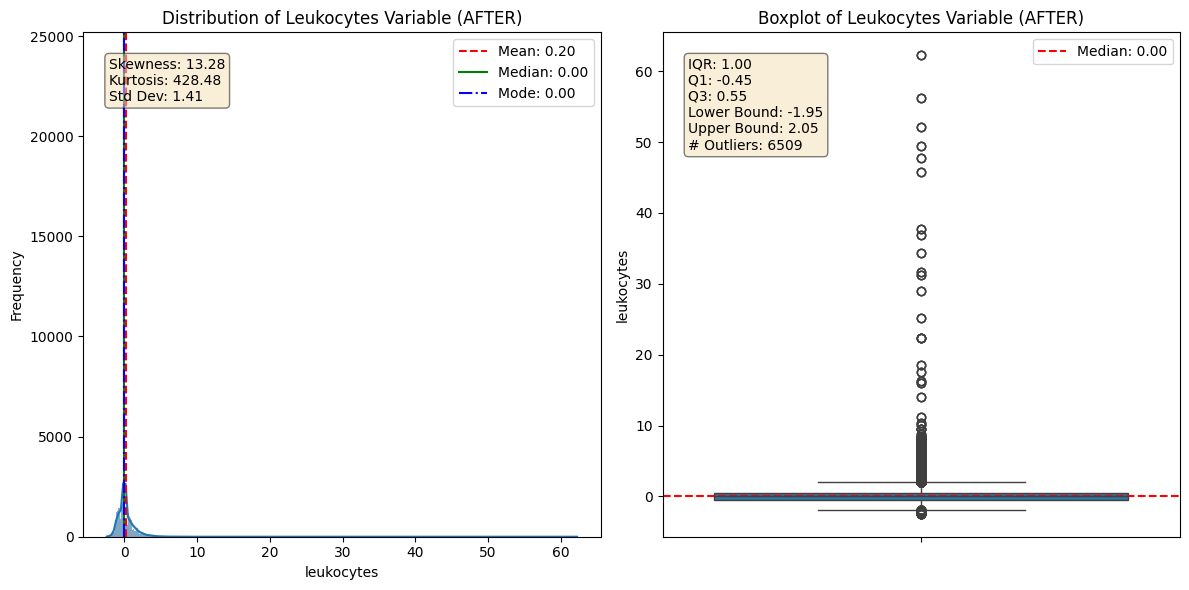

In [ ]:
# STANDARDISATION (ROBUST SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the 'leukocytes' column
df_outliers_preview['leukocytes'] = scaler.fit_transform(df[['leukocytes']])

# Plot histogram_boxplot for leukocytes (AFTER)
plot_histogram_boxplot(df_outliers_preview, "leukocytes", "Distribution of Leukocytes Variable (AFTER)", "Boxplot of Leukocytes Variable (AFTER)")

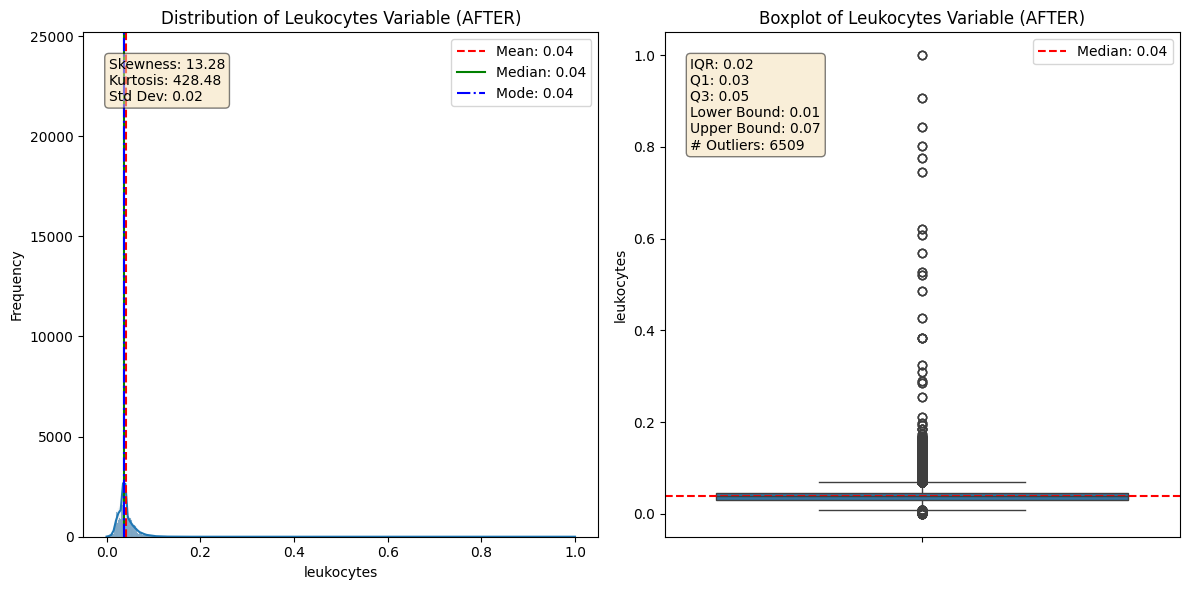

In [ ]:
# NORMALISATION (MIN MAX SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'leukocytes' column
df_outliers_preview['leukocytes'] = scaler.fit_transform(df[['leukocytes']])

# Plot histogram_boxplot for leukocytes (AFTER)
plot_histogram_boxplot(df_outliers_preview, "leukocytes", "Distribution of Leukocytes Variable (AFTER)", "Boxplot of Leukocytes Variable (AFTER)")

### Sodium Variable

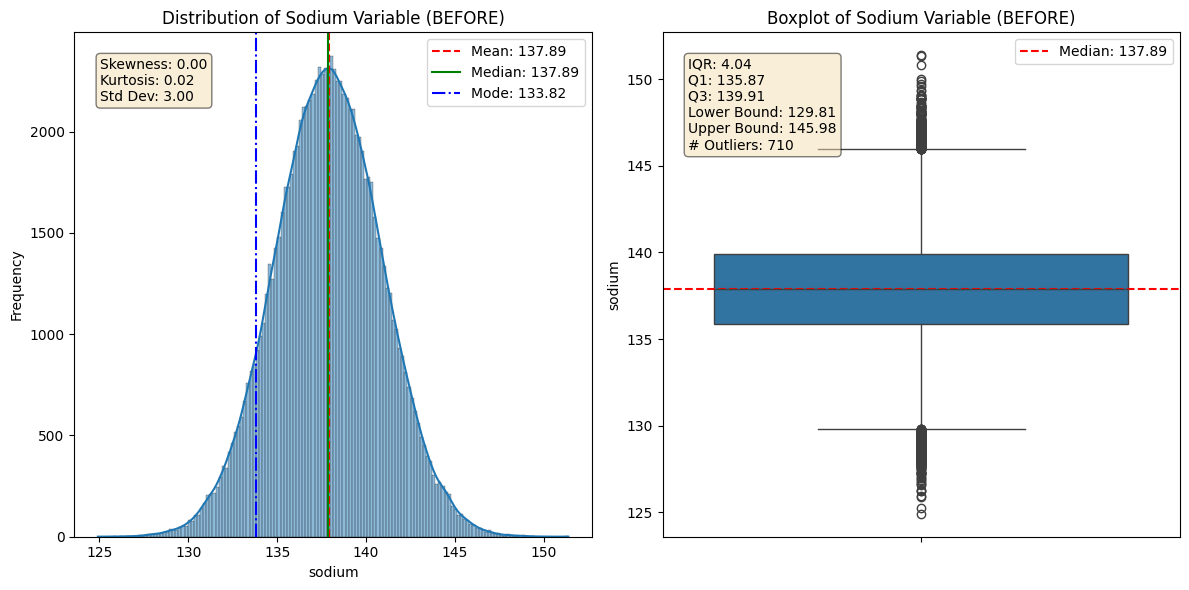

In [ ]:
# Plot histogram_boxplot for sodium (BEFORE)
plot_histogram_boxplot(df, "sodium", "Distribution of Sodium Variable (BEFORE)", "Boxplot of Sodium Variable (BEFORE)")

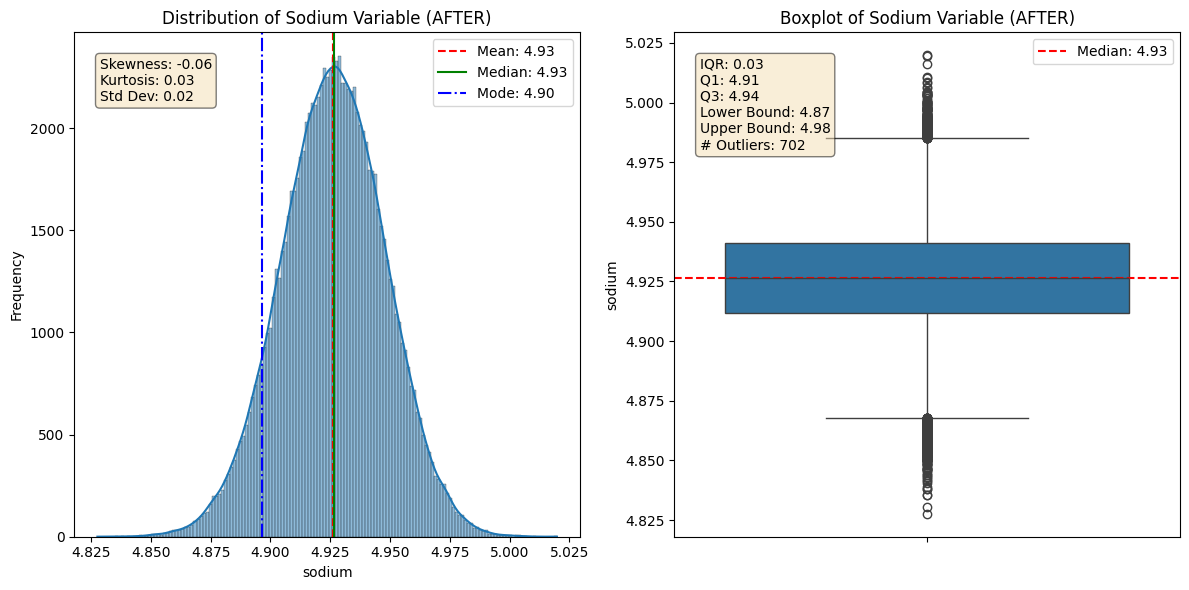

In [ ]:
# LOG TRANSFORMATION
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Apply log transformation to sodium
df_outliers_preview['sodium'] = np.log(df['sodium'])

# Plot histogram_boxplot for sodium (AFTER)
plot_histogram_boxplot(df_outliers_preview, "sodium", "Distribution of Sodium Variable (AFTER)", "Boxplot of Sodium Variable (AFTER)")

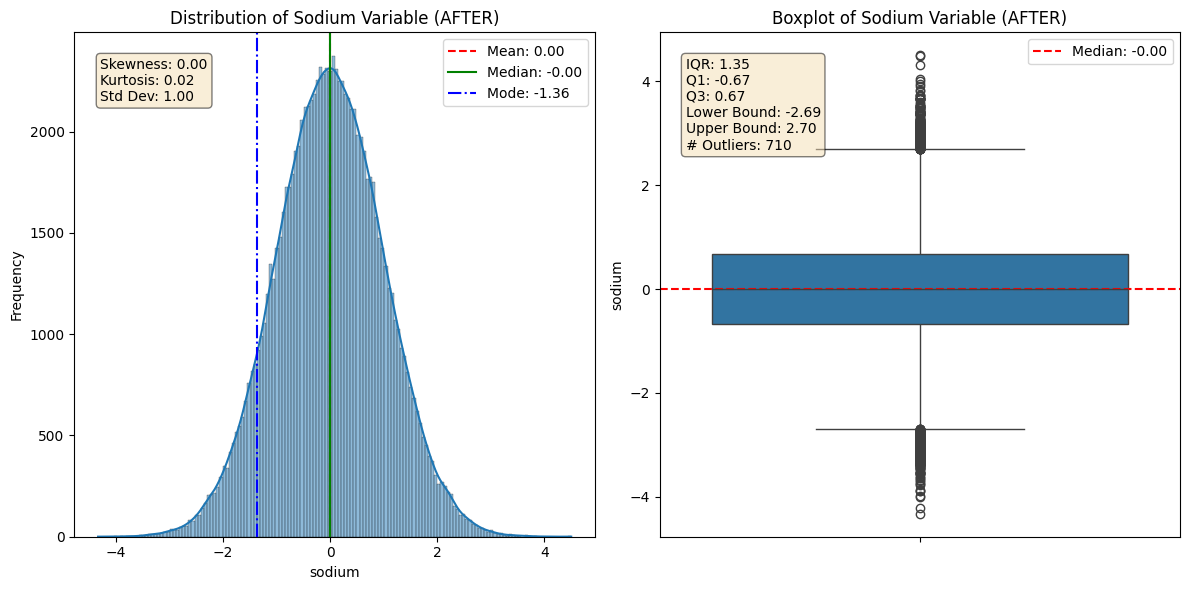

In [ ]:
# STANDARDISATION (STANDARD SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'sodium' column
df_outliers_preview['sodium'] = scaler.fit_transform(df[['sodium']])

# Plot histogram_boxplot for sodium (AFTER)
plot_histogram_boxplot(df_outliers_preview, "sodium", "Distribution of Sodium Variable (AFTER)", "Boxplot of Sodium Variable (AFTER)")

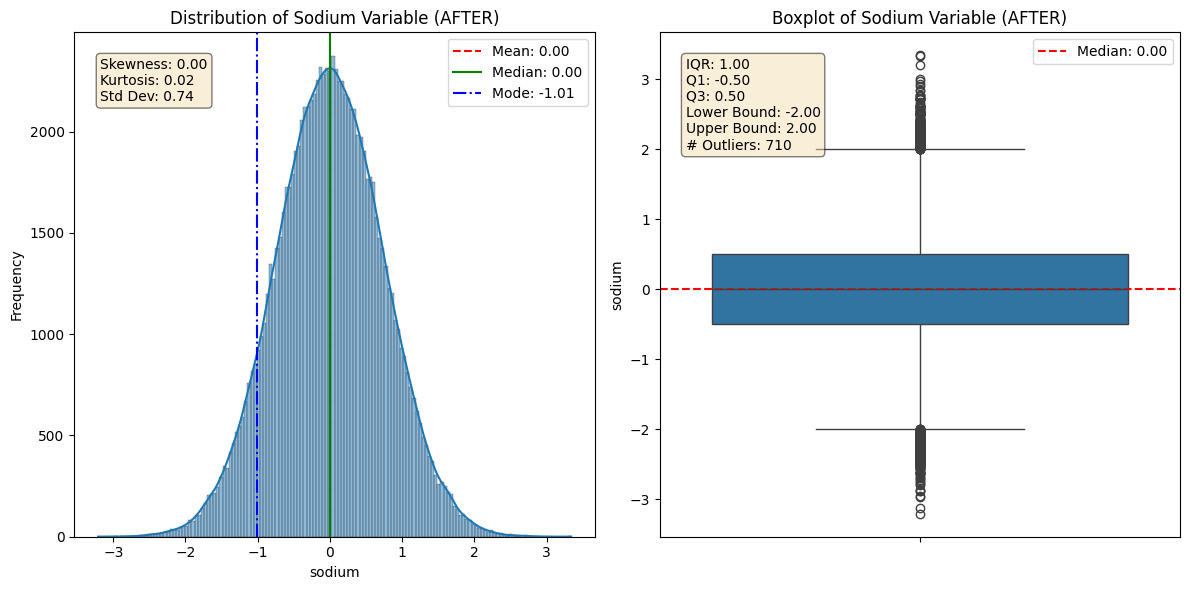

In [ ]:
# STANDARDISATION (ROBUST SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the 'sodium' column
df_outliers_preview['sodium'] = scaler.fit_transform(df[['sodium']])

# Plot histogram_boxplot for sodium (AFTER)
plot_histogram_boxplot(df_outliers_preview, "sodium", "Distribution of Sodium Variable (AFTER)", "Boxplot of Sodium Variable (AFTER)")

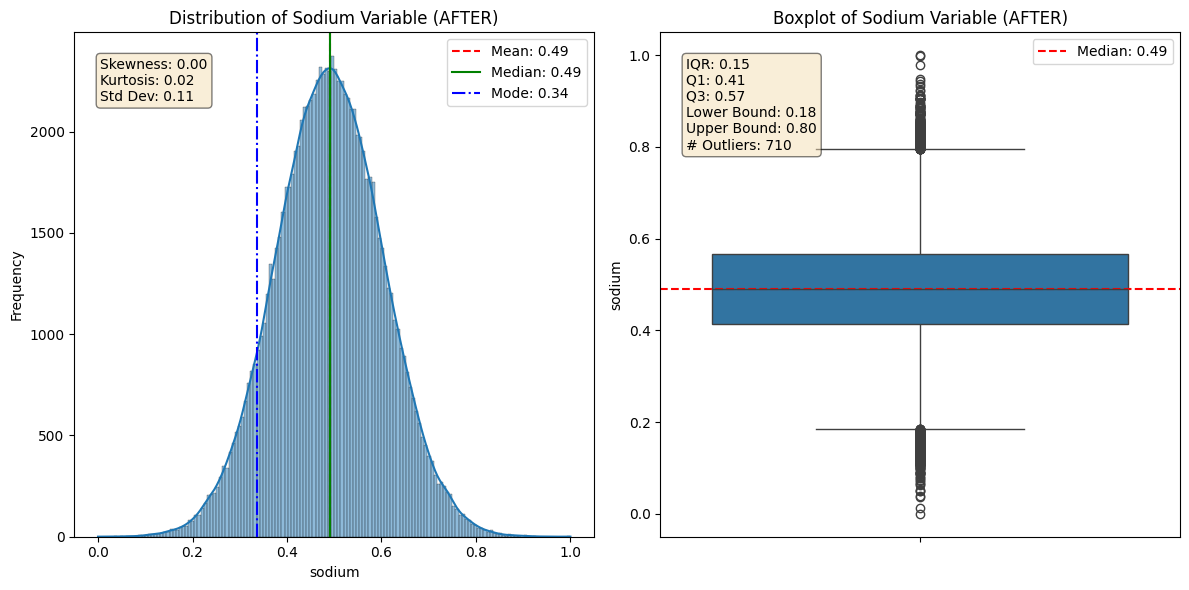

In [ ]:
# NORMALISATION (MIN MAX SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'sodium' column
df_outliers_preview['sodium'] = scaler.fit_transform(df[['sodium']])

# Plot histogram_boxplot for sodium (AFTER)
plot_histogram_boxplot(df_outliers_preview, "sodium", "Distribution of Sodium Variable (AFTER)", "Boxplot of Sodium Variable (AFTER)")

### Glucose Variable

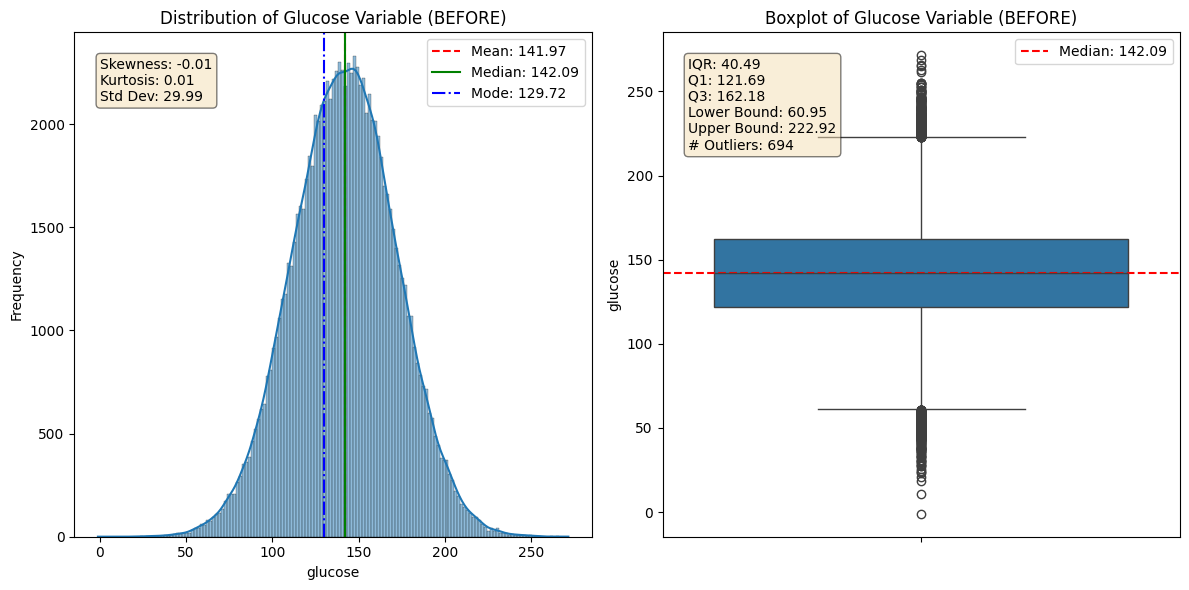

In [ ]:
# Plot histogram_boxplot for glucose (BEFORE)
plot_histogram_boxplot(df, "glucose", "Distribution of Glucose Variable (BEFORE)", "Boxplot of Glucose Variable (BEFORE)")

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


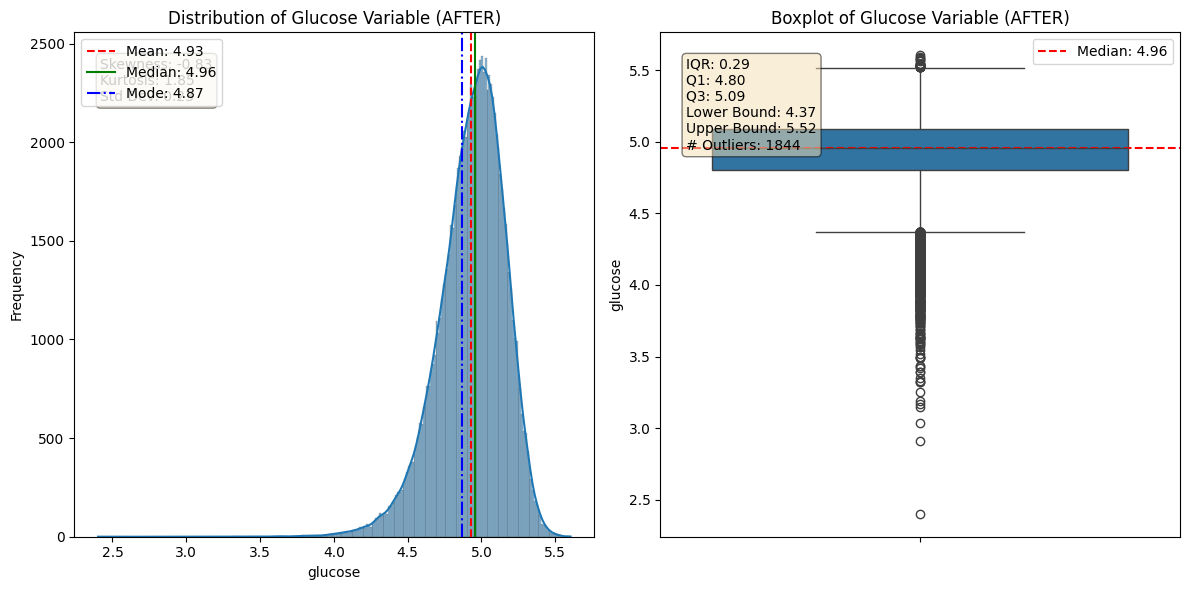

In [ ]:
# LOG TRANSFORMATION
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Apply log transformation to glucose
df_outliers_preview['glucose'] = np.log(df['glucose'])

# Plot histogram_boxplot for glucose (AFTER)
plot_histogram_boxplot(df_outliers_preview, "glucose", "Distribution of Glucose Variable (AFTER)", "Boxplot of Glucose Variable (AFTER)")

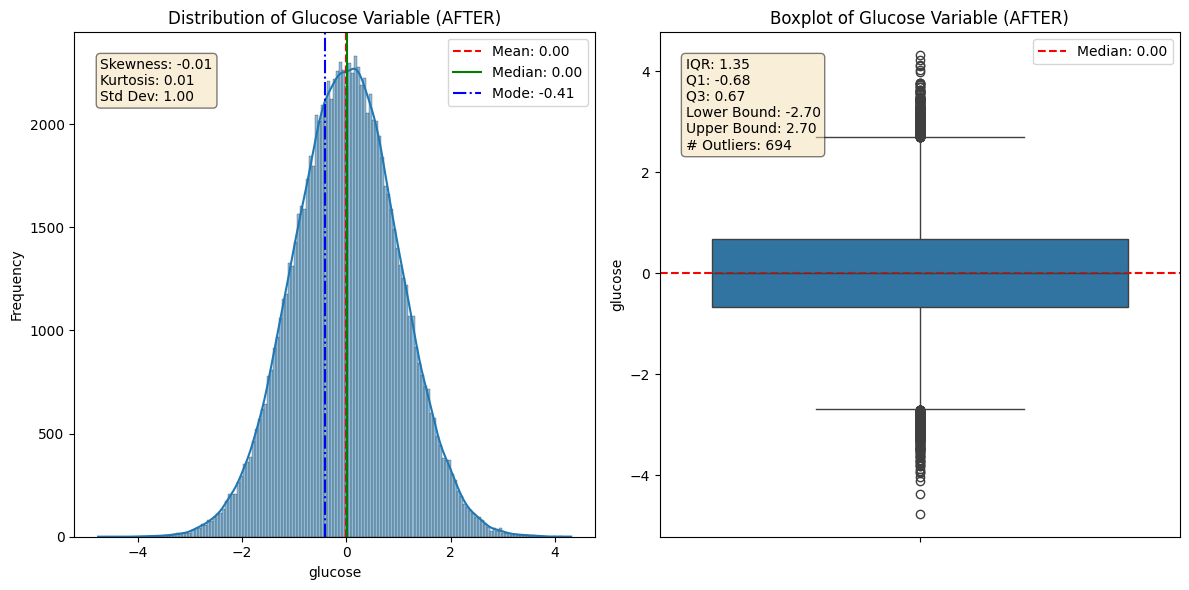

In [ ]:
# STANDARDISATION (STANDARD SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'glucose' column
df_outliers_preview['glucose'] = scaler.fit_transform(df[['glucose']])

# Plot histogram_boxplot for glucose (AFTER)
plot_histogram_boxplot(df_outliers_preview, "glucose", "Distribution of Glucose Variable (AFTER)", "Boxplot of Glucose Variable (AFTER)")

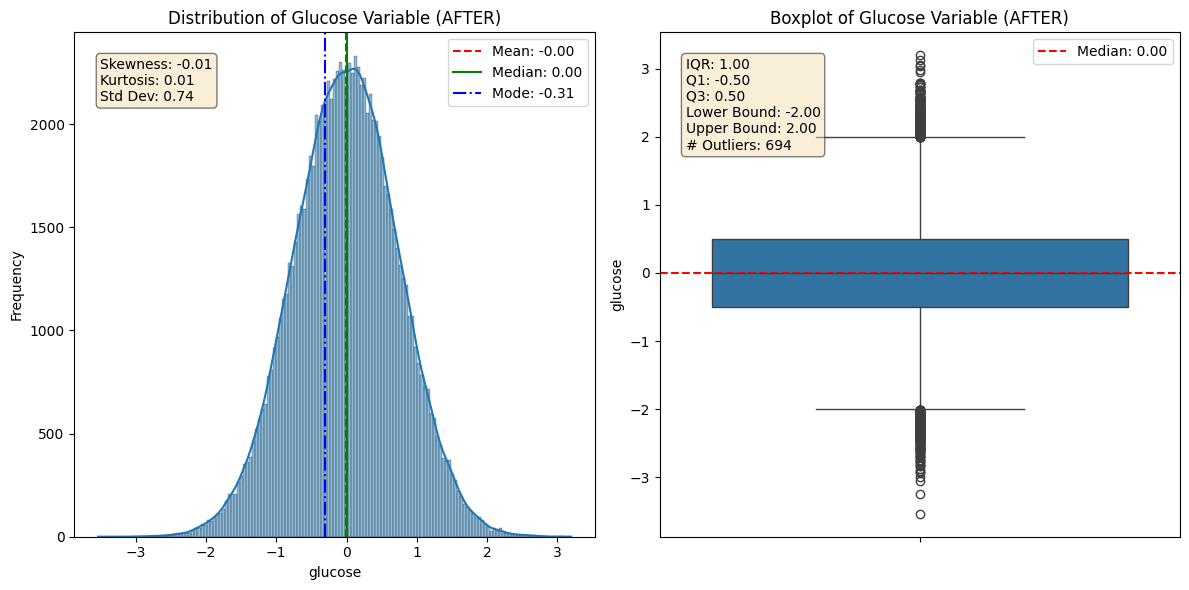

In [ ]:
# STANDARDISATION (ROBUST SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the 'glucose' column
df_outliers_preview['glucose'] = scaler.fit_transform(df[['glucose']])

# Plot histogram_boxplot for glucose (AFTER)
plot_histogram_boxplot(df_outliers_preview, "glucose", "Distribution of Glucose Variable (AFTER)", "Boxplot of Glucose Variable (AFTER)")

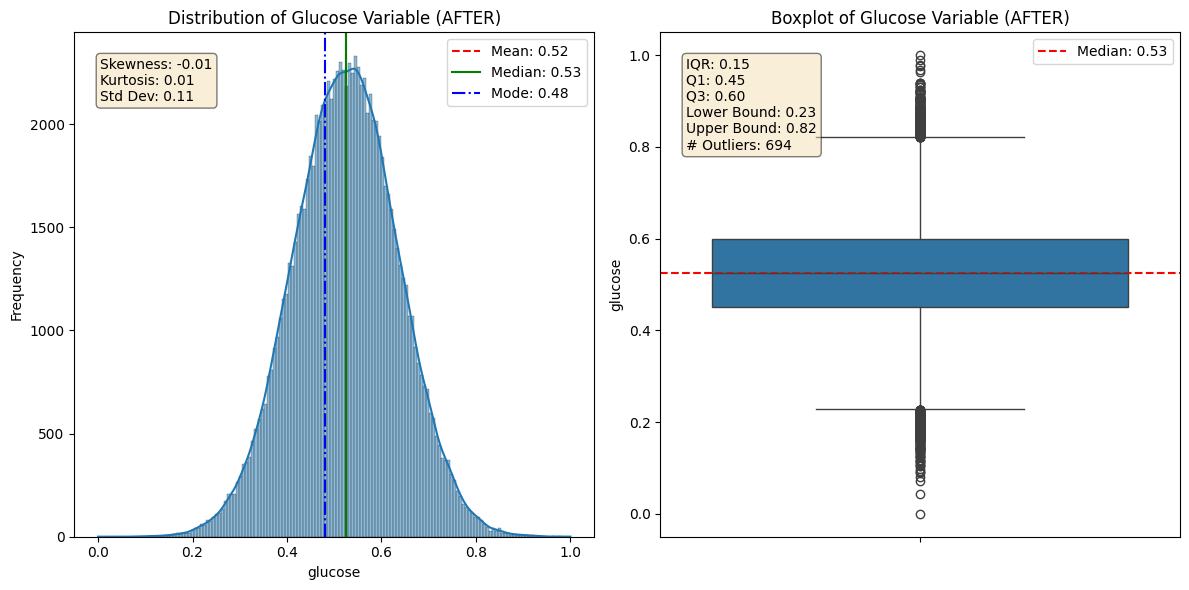

In [ ]:
# NORMALISATION (MIN MAX SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'glucose' column
df_outliers_preview['glucose'] = scaler.fit_transform(df[['glucose']])

# Plot histogram_boxplot for glucose (AFTER)
plot_histogram_boxplot(df_outliers_preview, "glucose", "Distribution of Glucose Variable (AFTER)", "Boxplot of Glucose Variable (AFTER)")

### Blood Urea Nitrogen Variable

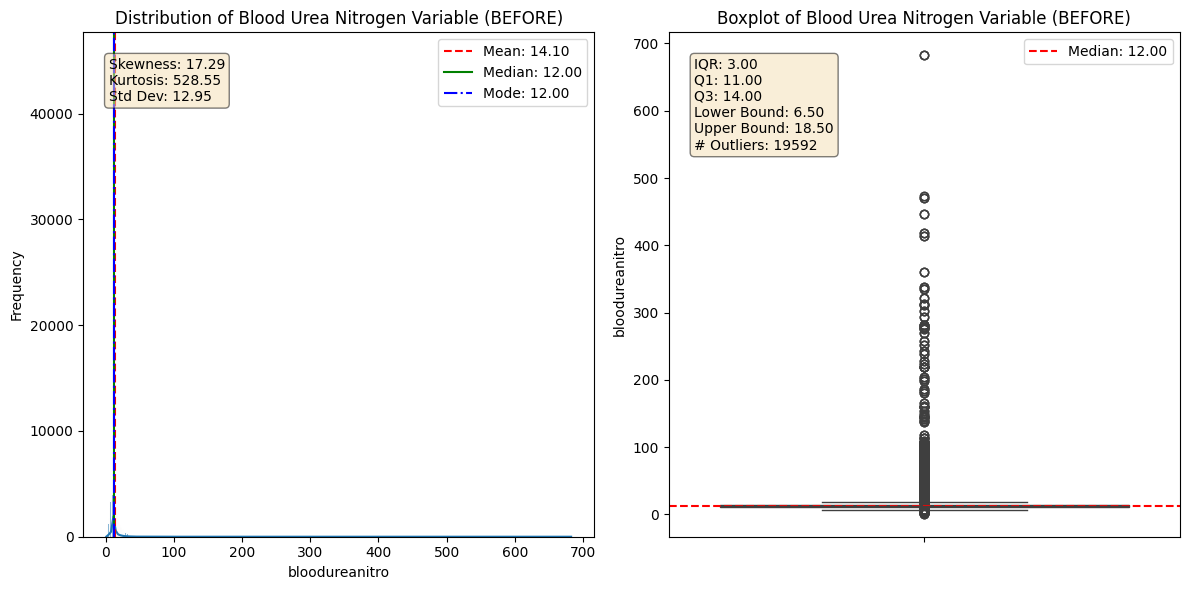

In [ ]:
# Plot histogram_boxplot for bloodureanitro (BEFORE)
plot_histogram_boxplot(df, "bloodureanitro", "Distribution of Blood Urea Nitrogen Variable (BEFORE)", "Boxplot of Blood Urea Nitrogen Variable (BEFORE)")

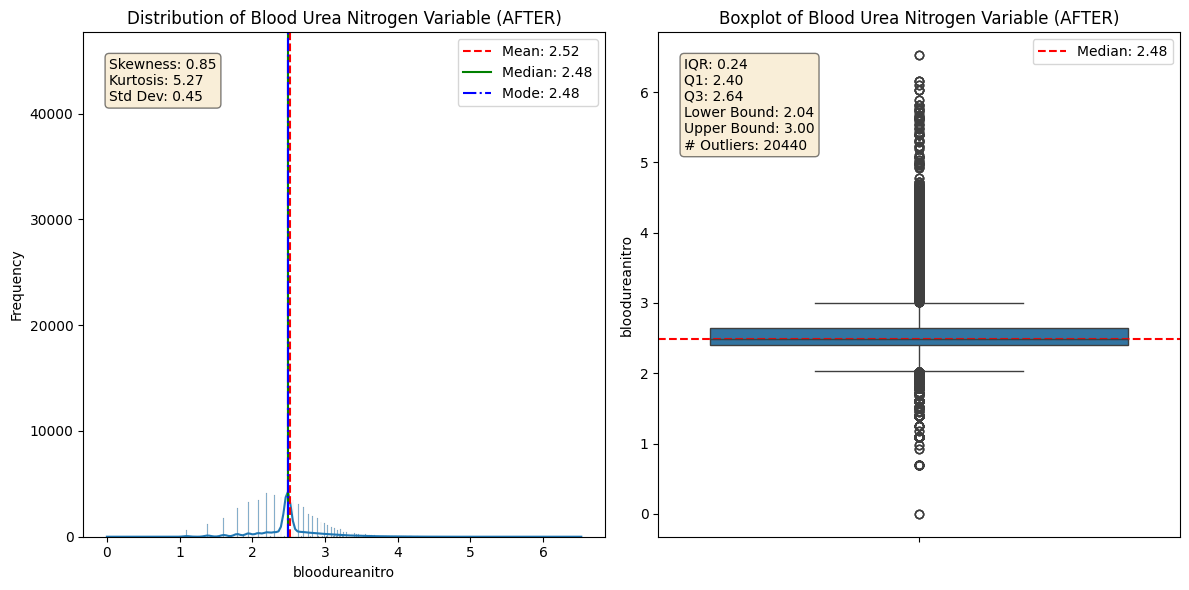

In [ ]:
# LOG TRANSFORMATION
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Apply log transformation to bloodureanitro
df_outliers_preview['bloodureanitro'] = np.log(df['bloodureanitro'])

# Plot histogram_boxplot for bloodureanitro (AFTER)
plot_histogram_boxplot(df_outliers_preview, "bloodureanitro", "Distribution of Blood Urea Nitrogen Variable (AFTER)", "Boxplot of Blood Urea Nitrogen Variable (AFTER)")

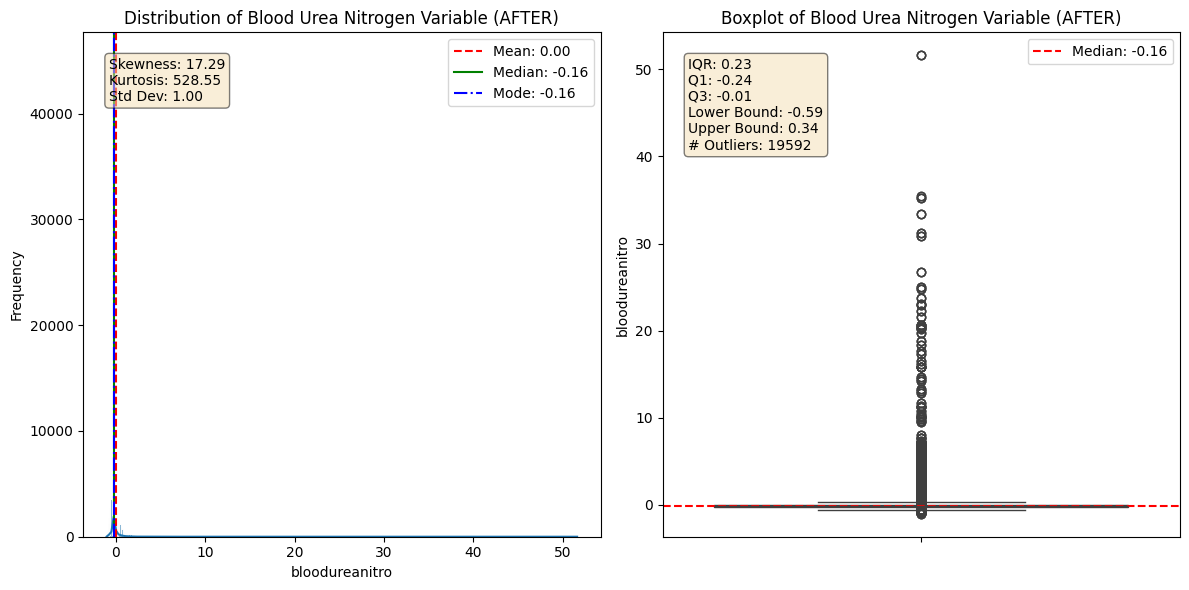

In [ ]:
# STANDARDISATION (STANDARD SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'bloodureanitro' column
df_outliers_preview['bloodureanitro'] = scaler.fit_transform(df[['bloodureanitro']])

# Plot histogram_boxplot for bloodureanitro (AFTER)
plot_histogram_boxplot(df_outliers_preview, "bloodureanitro", "Distribution of Blood Urea Nitrogen Variable (AFTER)", "Boxplot of Blood Urea Nitrogen Variable (AFTER)")

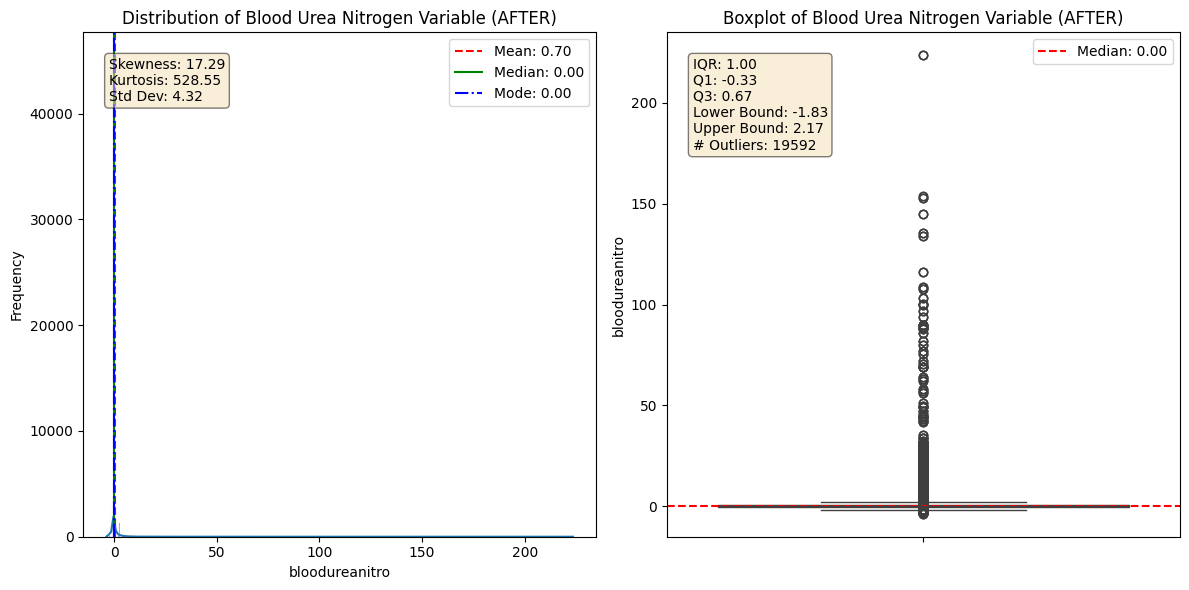

In [ ]:
# STANDARDISATION (ROBUST SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the 'bloodureanitro' column
df_outliers_preview['bloodureanitro'] = scaler.fit_transform(df[['bloodureanitro']])

# Plot histogram_boxplot for bloodureanitro (AFTER)
plot_histogram_boxplot(df_outliers_preview, "bloodureanitro", "Distribution of Blood Urea Nitrogen Variable (AFTER)", "Boxplot of Blood Urea Nitrogen Variable (AFTER)")

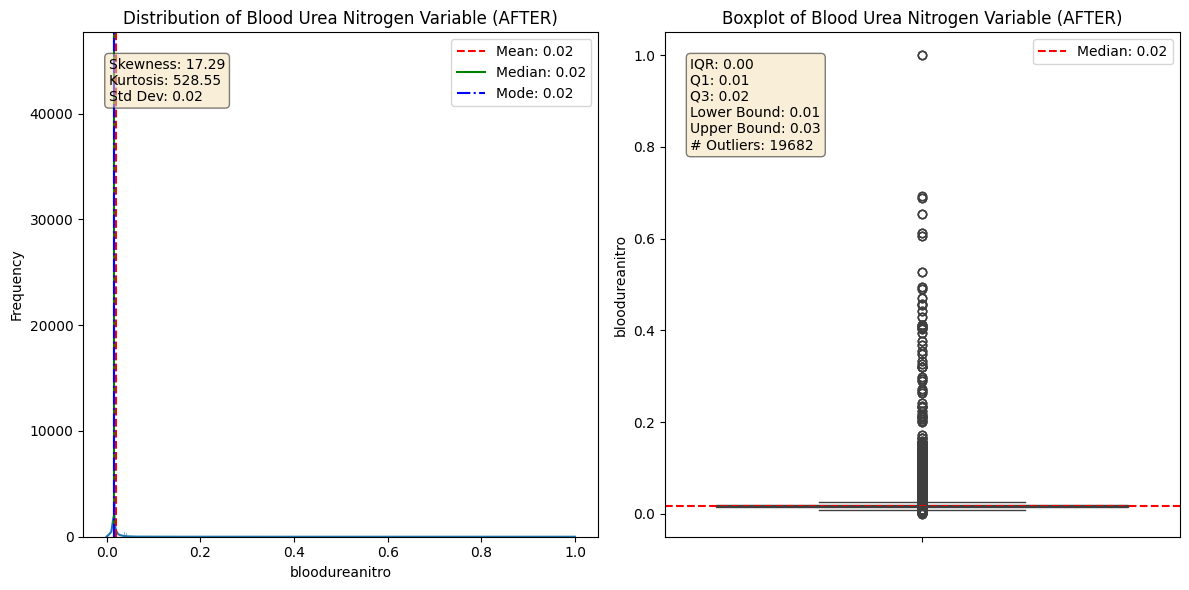

In [ ]:
# NORMALISATION (MIN MAX SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'bloodureanitro' column
df_outliers_preview['bloodureanitro'] = scaler.fit_transform(df[['bloodureanitro']])

# Plot histogram_boxplot for bloodureanitro (AFTER)
plot_histogram_boxplot(df_outliers_preview, "bloodureanitro", "Distribution of Blood Urea Nitrogen Variable (AFTER)", "Boxplot of Blood Urea Nitrogen Variable (AFTER)")

### Creatinine Variable

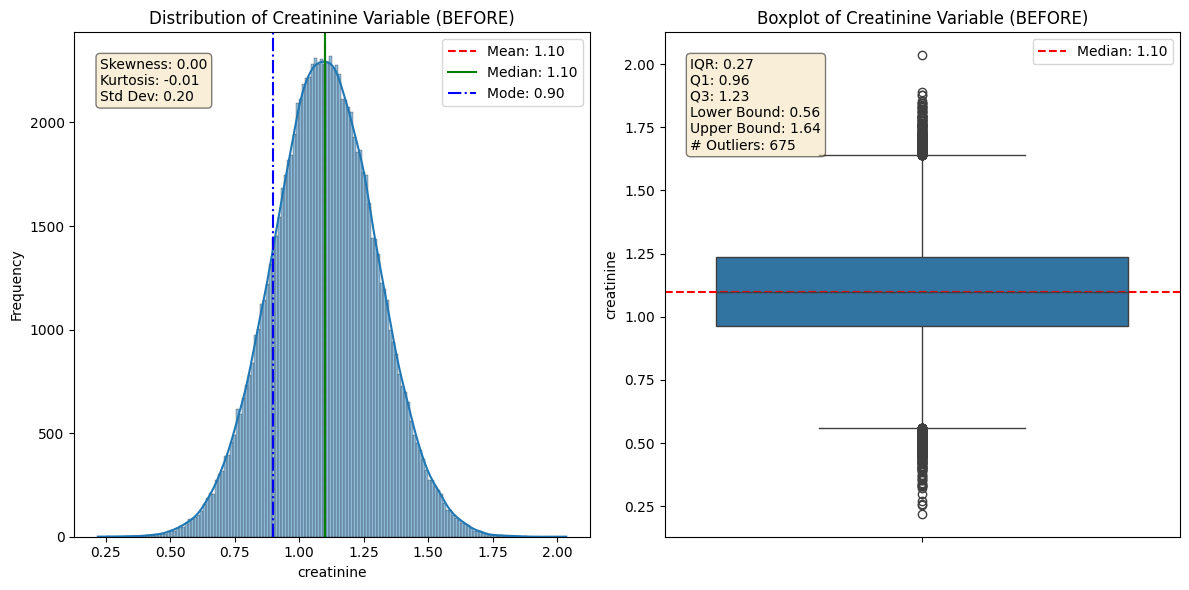

In [ ]:
# Plot histogram_boxplot for creatinine (BEFORE)
plot_histogram_boxplot(df, "creatinine", "Distribution of Creatinine Variable (BEFORE)", "Boxplot of Creatinine Variable (BEFORE)")

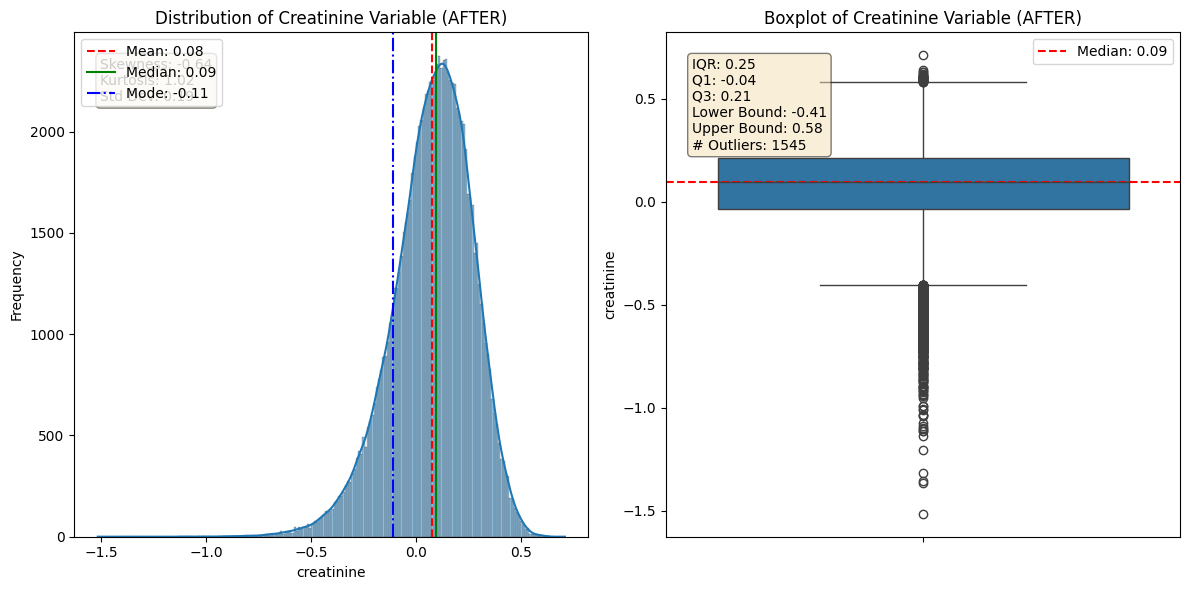

In [ ]:
# LOG TRANSFORMATION
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Apply log transformation to creatinine
df_outliers_preview['creatinine'] = np.log(df['creatinine'])

# Plot histogram_boxplot for creatinine (AFTER)
plot_histogram_boxplot(df_outliers_preview, "creatinine", "Distribution of Creatinine Variable (AFTER)", "Boxplot of Creatinine Variable (AFTER)")

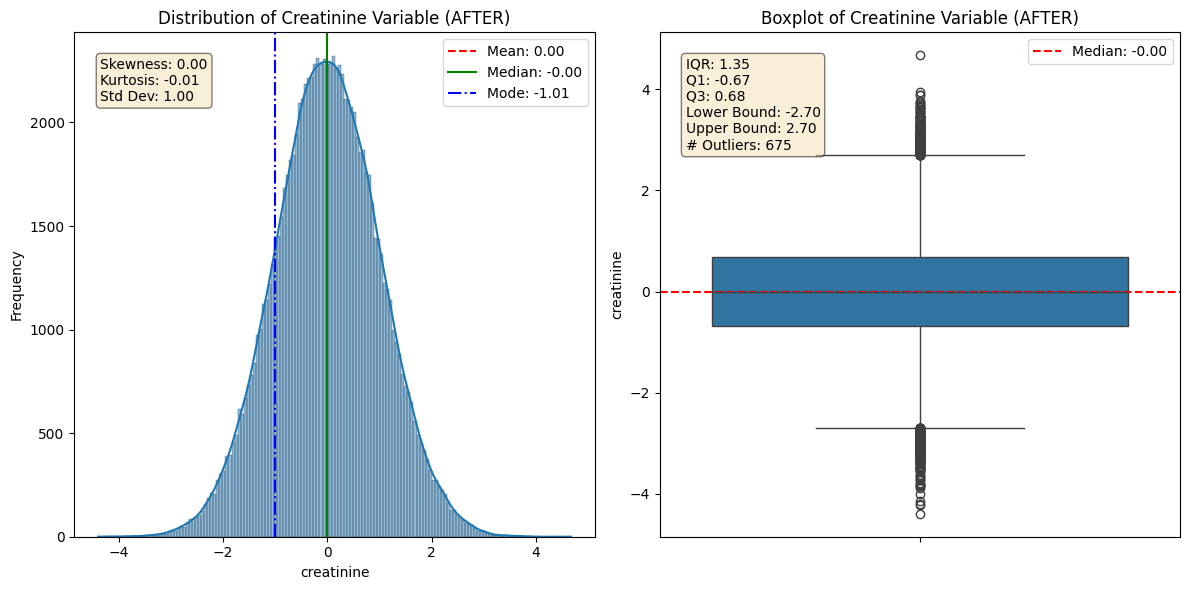

In [ ]:
# STANDARDISATION (STANDARD SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'creatinine' column
df_outliers_preview['creatinine'] = scaler.fit_transform(df[['creatinine']])

# Plot histogram_boxplot for creatinine (AFTER)
plot_histogram_boxplot(df_outliers_preview, "creatinine", "Distribution of Creatinine Variable (AFTER)", "Boxplot of Creatinine Variable (AFTER)")

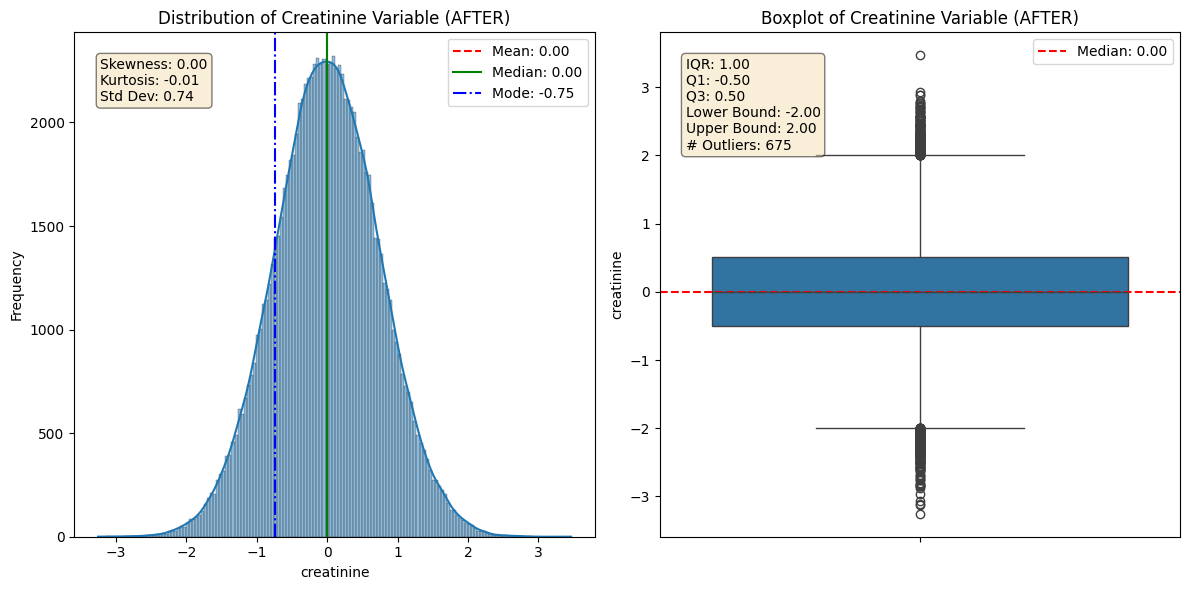

In [ ]:
# STANDARDISATION (ROBUST SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the 'creatinine' column
df_outliers_preview['creatinine'] = scaler.fit_transform(df[['creatinine']])

# Plot histogram_boxplot for creatinine (AFTER)
plot_histogram_boxplot(df_outliers_preview, "creatinine", "Distribution of Creatinine Variable (AFTER)", "Boxplot of Creatinine Variable (AFTER)")

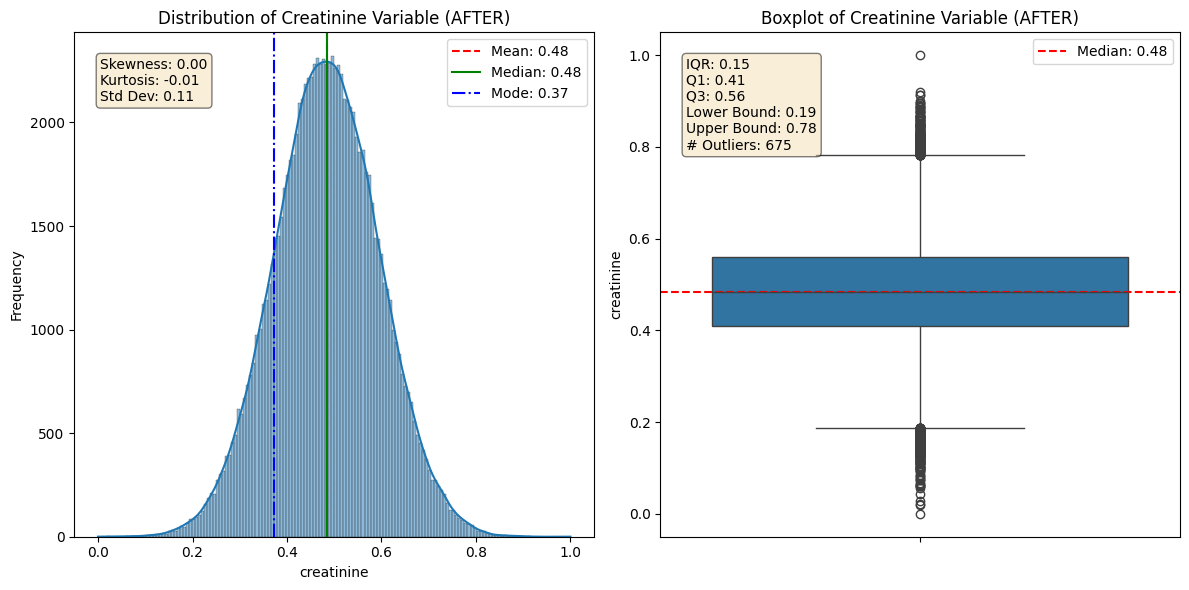

In [ ]:
# NORMALISATION (MIN MAX SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'creatinine' column
df_outliers_preview['creatinine'] = scaler.fit_transform(df[['creatinine']])

# Plot histogram_boxplot for creatinine (AFTER)
plot_histogram_boxplot(df_outliers_preview, "creatinine", "Distribution of Creatinine Variable (AFTER)", "Boxplot of Creatinine Variable (AFTER)")

### BMI Variable

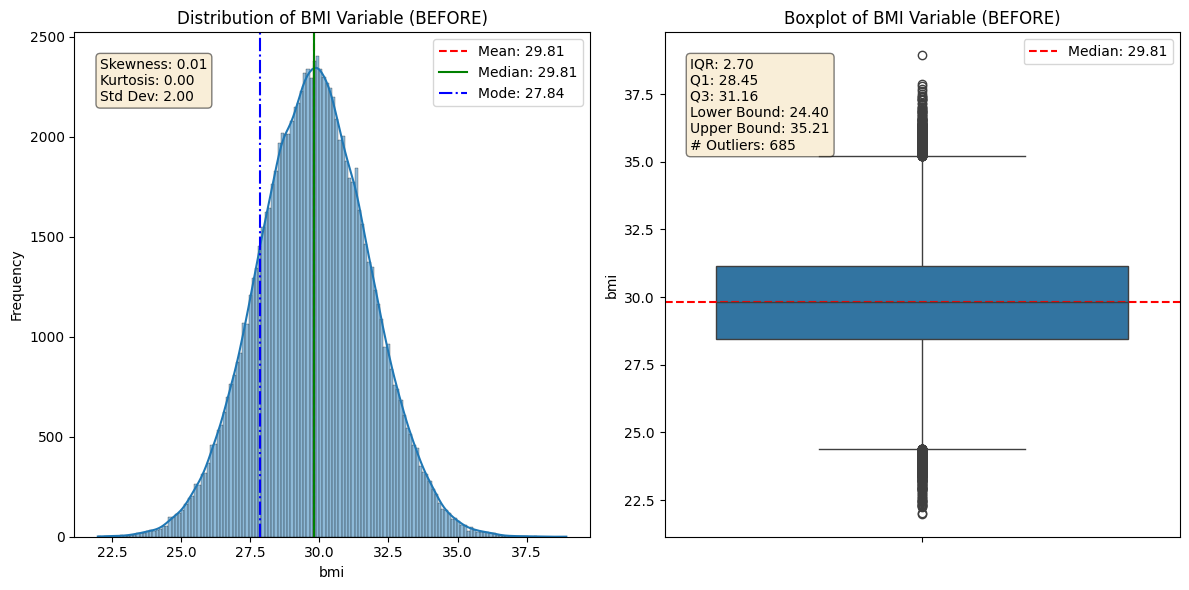

In [ ]:
# Plot histogram_boxplot for bmi (BEFORE)
plot_histogram_boxplot(df, "bmi", "Distribution of BMI Variable (BEFORE)", "Boxplot of BMI Variable (BEFORE)")

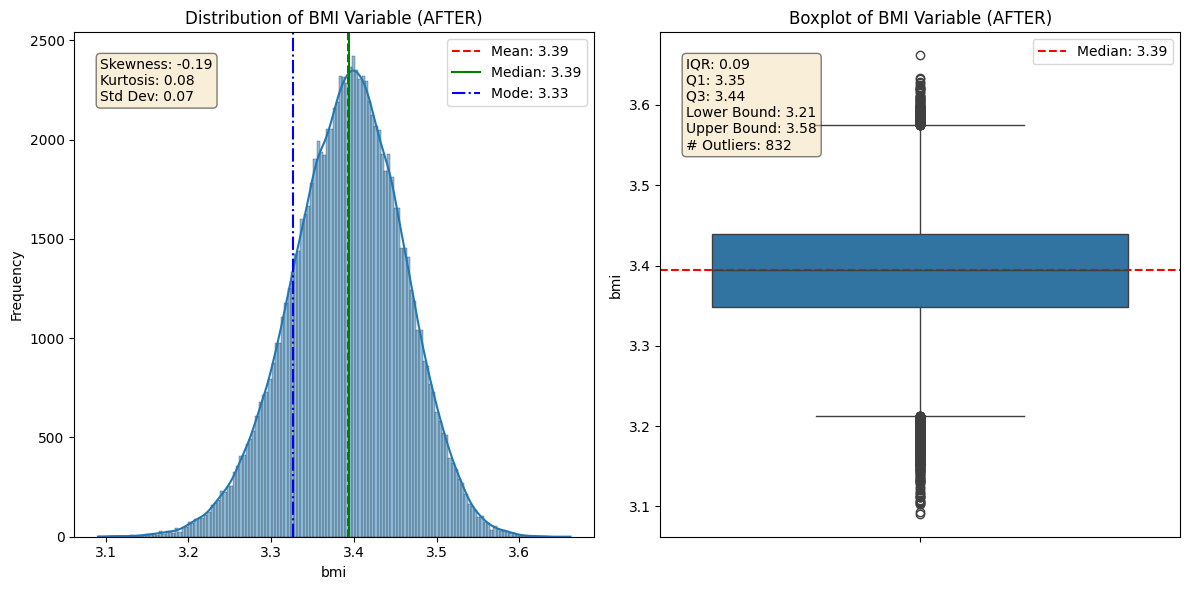

In [ ]:
# LOG TRANSFORMATION
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Apply log transformation to bmi
df_outliers_preview['bmi'] = np.log(df['bmi'])

# Plot histogram_boxplot for bmi (AFTER)
plot_histogram_boxplot(df_outliers_preview, "bmi", "Distribution of BMI Variable (AFTER)", "Boxplot of BMI Variable (AFTER)")

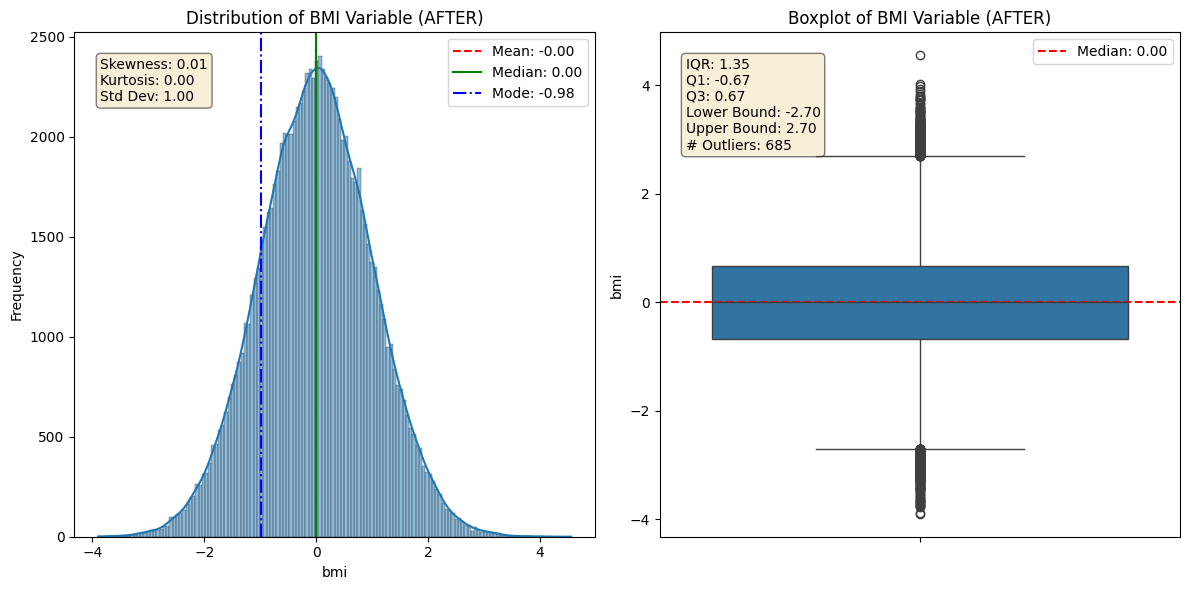

In [ ]:
# STANDARDISATION (STANDARD SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'bmi' column
df_outliers_preview['bmi'] = scaler.fit_transform(df[['bmi']])

# Plot histogram_boxplot for bmi (AFTER)
plot_histogram_boxplot(df_outliers_preview, "bmi", "Distribution of BMI Variable (AFTER)", "Boxplot of BMI Variable (AFTER)")

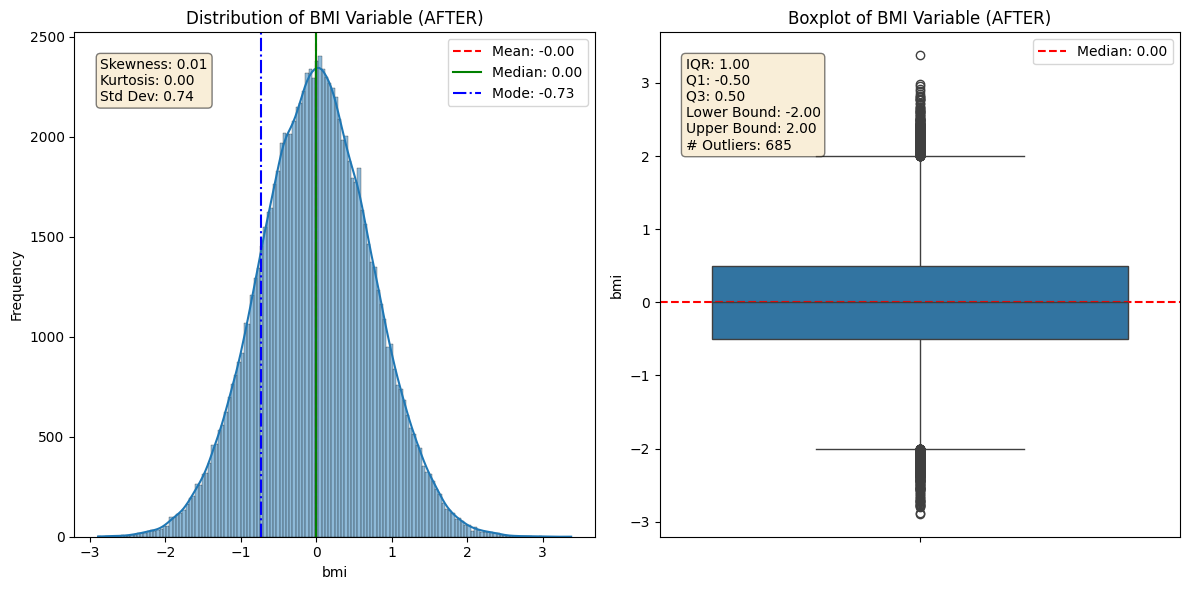

In [ ]:
# STANDARDISATION (ROBUST SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the 'bmi' column
df_outliers_preview['bmi'] = scaler.fit_transform(df[['bmi']])

# Plot histogram_boxplot for bmi (AFTER)
plot_histogram_boxplot(df_outliers_preview, "bmi", "Distribution of BMI Variable (AFTER)", "Boxplot of BMI Variable (AFTER)")

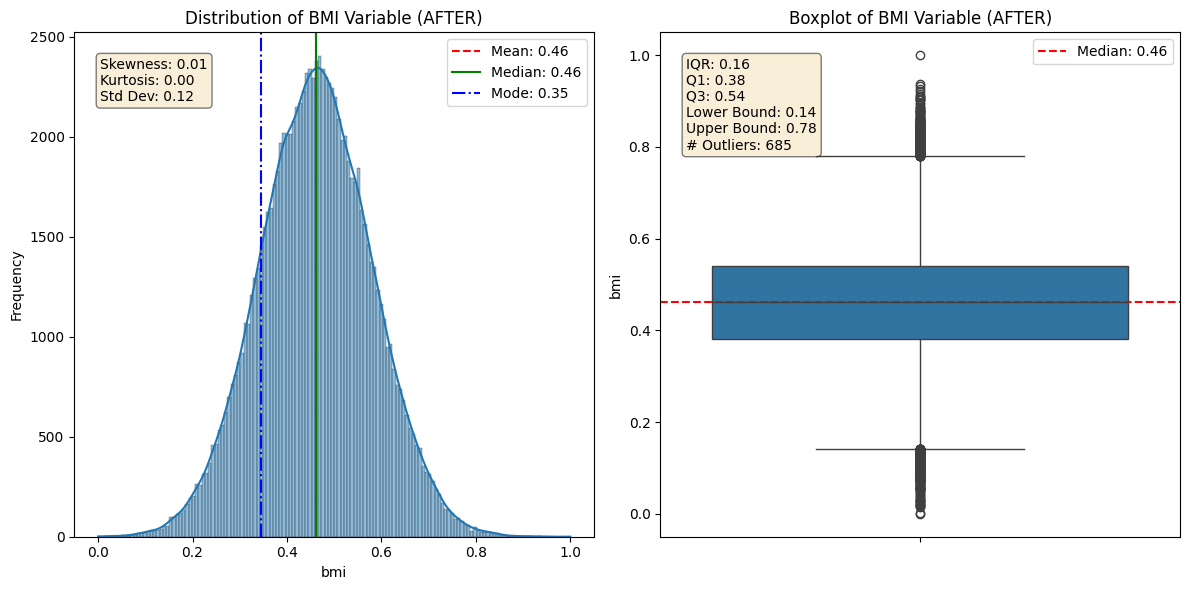

In [ ]:
# NORMALISATION (MIN MAX SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'bmi' column
df_outliers_preview['bmi'] = scaler.fit_transform(df[['bmi']])

# Plot histogram_boxplot for bmi (AFTER)
plot_histogram_boxplot(df_outliers_preview, "bmi", "Distribution of BMI Variable (AFTER)", "Boxplot of BMI Variable (AFTER)")

### Pulse Variable

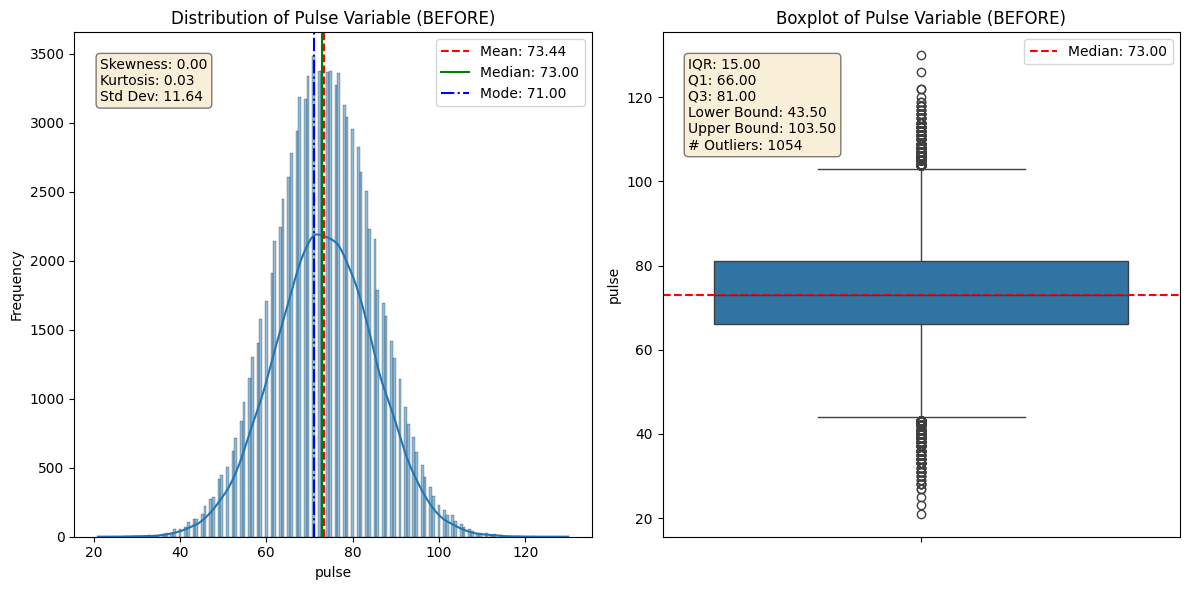

In [ ]:
# Plot histogram_boxplot for pulse (BEFORE)
plot_histogram_boxplot(df, "pulse", "Distribution of Pulse Variable (BEFORE)", "Boxplot of Pulse Variable (BEFORE)")

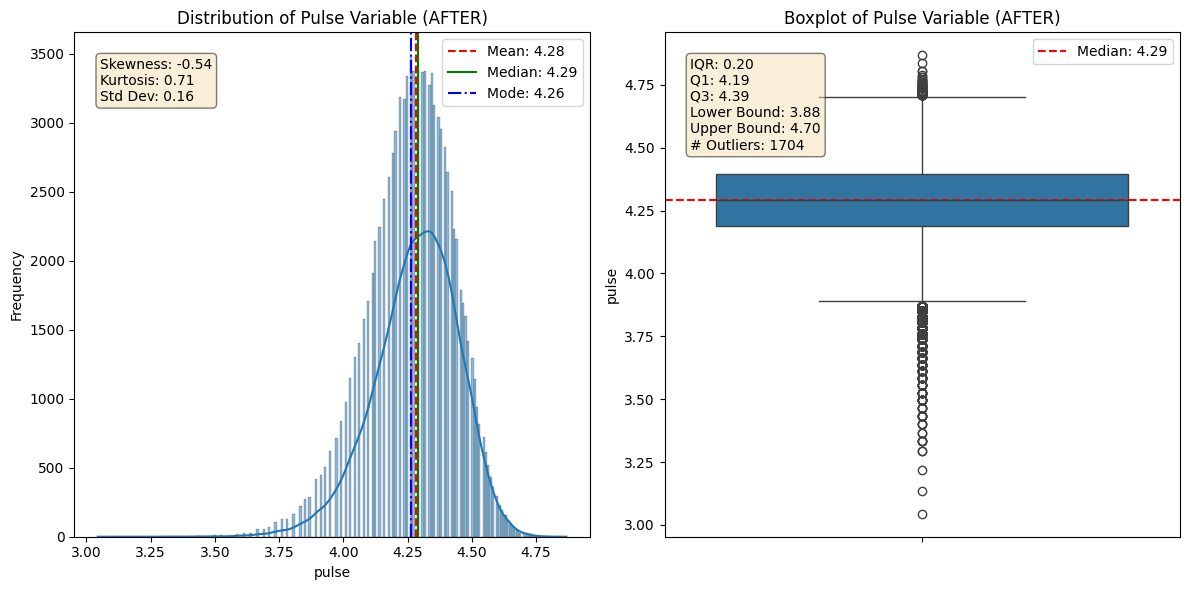

In [ ]:
# LOG TRANSFORMATION
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Apply log transformation to pulse
df_outliers_preview['pulse'] = np.log(df['pulse'])

# Plot histogram_boxplot for pulse (AFTER)
plot_histogram_boxplot(df_outliers_preview, "pulse", "Distribution of Pulse Variable (AFTER)", "Boxplot of Pulse Variable (AFTER)")

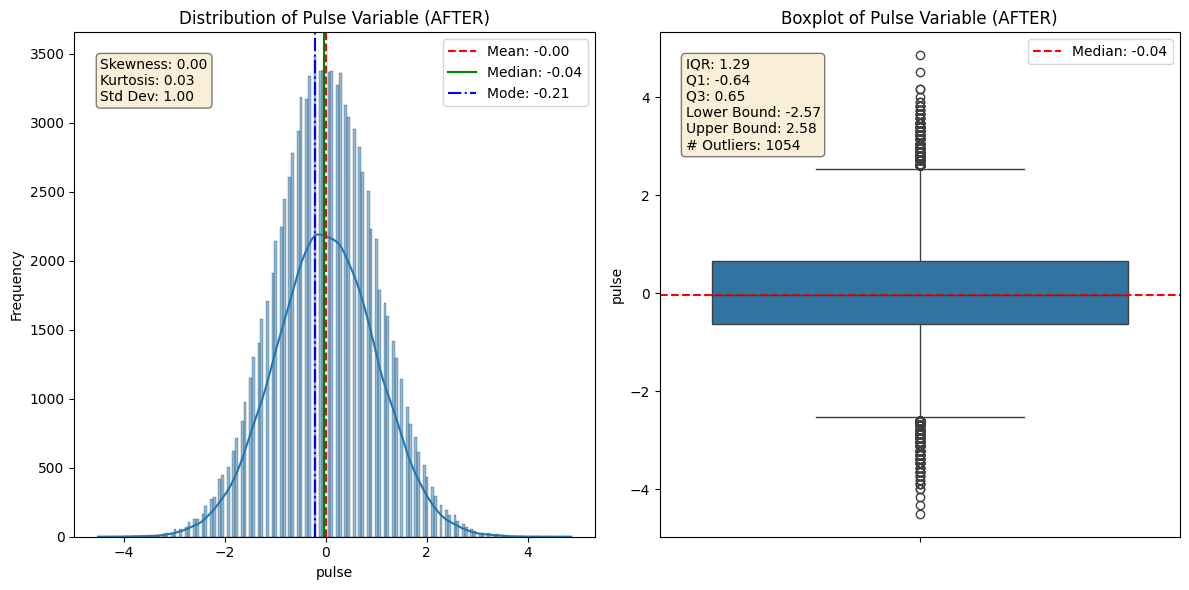

In [ ]:
# STANDARDISATION (STANDARD SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'pulse' column
df_outliers_preview['pulse'] = scaler.fit_transform(df[['pulse']])

# Plot histogram_boxplot for pulse (AFTER)
plot_histogram_boxplot(df_outliers_preview, "pulse", "Distribution of Pulse Variable (AFTER)", "Boxplot of Pulse Variable (AFTER)")

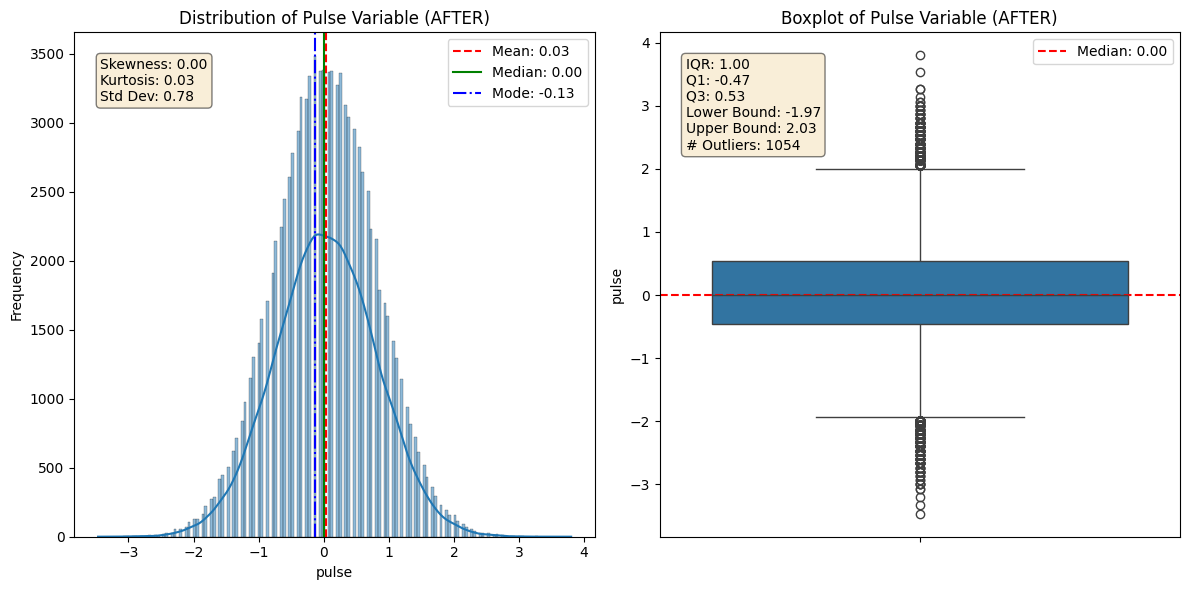

In [ ]:
# STANDARDISATION (ROBUST SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the 'pulse' column
df_outliers_preview['pulse'] = scaler.fit_transform(df[['pulse']])

# Plot histogram_boxplot for pulse (AFTER)
plot_histogram_boxplot(df_outliers_preview, "pulse", "Distribution of Pulse Variable (AFTER)", "Boxplot of Pulse Variable (AFTER)")

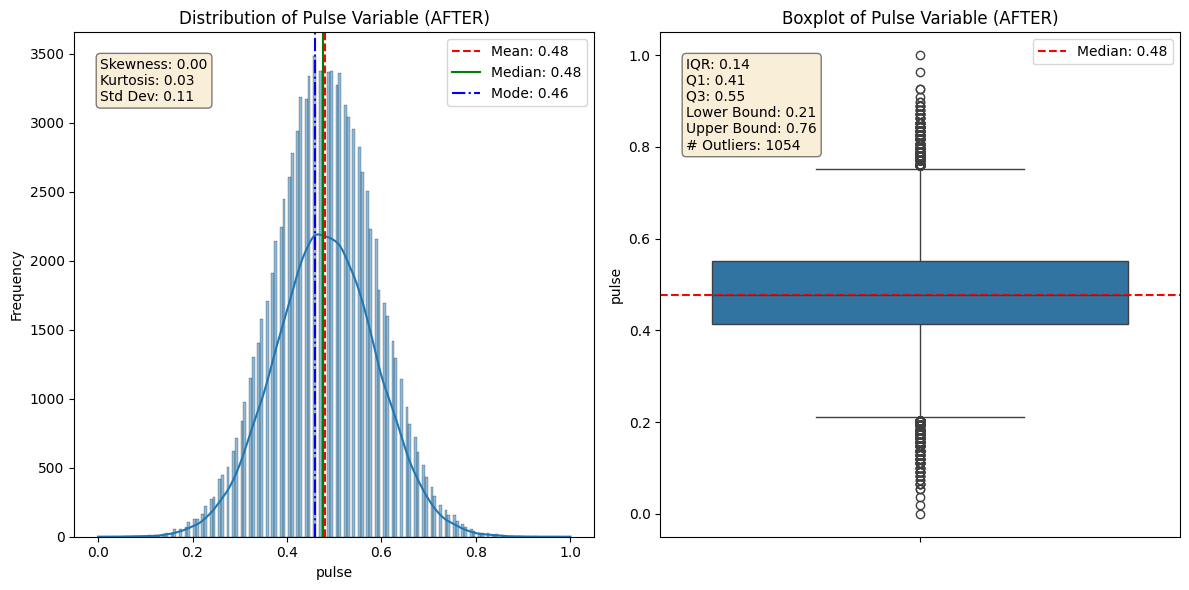

In [ ]:
# NORMALISATION (MIN MAX SCALER)
# Make a copy of the DataFrame to preview outliers handling output
df_outliers_preview = df.copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'pulse' column
df_outliers_preview['pulse'] = scaler.fit_transform(df[['pulse']])

# Plot histogram_boxplot for pulse (AFTER)
plot_histogram_boxplot(df_outliers_preview, "pulse", "Distribution of Pulse Variable (AFTER)", "Boxplot of Pulse Variable (AFTER)")

## Handling Outliers (Final Approaches)

In [ ]:
# Specify columns for RobustScaler
robust_scaler_cols = ['hemoglobin', 'sodium', 'glucose', 'creatinine', 'bmi', 'pulse']

# Specify columns for Log Transformation
log_transform_cols = ['leukocytes', 'bloodureanitro']

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the specified columns with RobustScaler
df_preprocessed[robust_scaler_cols] = robust_scaler.fit_transform(df_preprocessed[robust_scaler_cols])

# Apply log transformation to the specified columns
df_preprocessed[log_transform_cols] = np.log(df_preprocessed[log_transform_cols])

## Train-Test-Validation Split

In [ ]:
# Split the data into training and testing sets (70% train, 30% test)
X = df_preprocessed.drop('lengthofstay', axis=1)
y = df_preprocessed['lengthofstay']

# Split the data into 70% training and 30% remaining (for validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Split the remaining 30% into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [ ]:
print("Length of train set: ", X_train.shape, "y:", y_train.shape)
print("Length of train set: ", X_val.shape, "y:", y_val.shape)
print("Length of test set: ", X_test.shape, "y:", y_test.shape)

Length of train set:  (69934, 23) y: (69934,)
Length of train set:  (14986, 23) y: (14986,)
Length of test set:  (14987, 23) y: (14987,)


# Advance Data Visualisation

## Bivariate Analysis

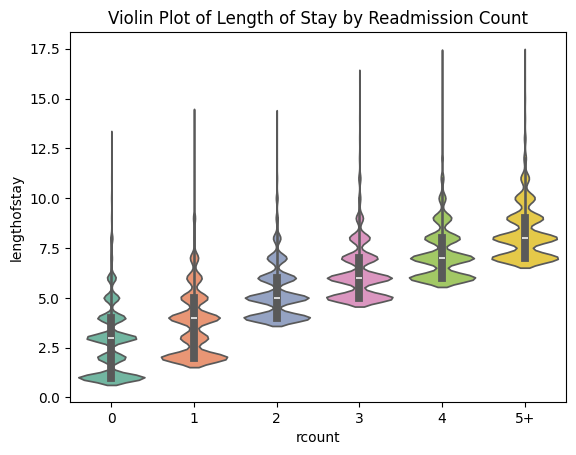

In [ ]:
# Plot violin plot for lengthofstay by rcount
sns.violinplot(x='rcount', y='lengthofstay', data=df, hue='rcount', palette='Set2')
plt.title('Violin Plot of Length of Stay by Readmission Count')
plt.show()

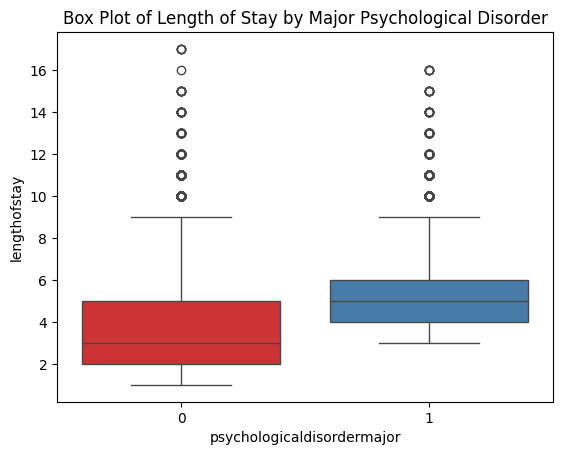

In [ ]:
# Plot box plot for lengthofstay by psychologicaldisordermajor
sns.boxplot(x='psychologicaldisordermajor', y='lengthofstay', data=df_preprocessed,
            hue='psychologicaldisordermajor', palette='Set1', legend=0)
plt.title('Box Plot of Length of Stay by Major Psychological Disorder')
plt.show()

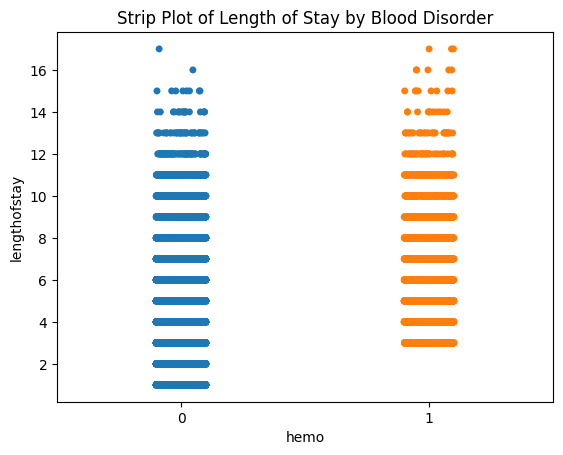

In [ ]:
# Plot strip Plot for lengthofstay by hemo (blood disorder)
sns.stripplot(x='hemo', y='lengthofstay', data=df_preprocessed, hue='hemo', legend=False)
plt.title('Strip Plot of Length of Stay by Blood Disorder')
plt.show()

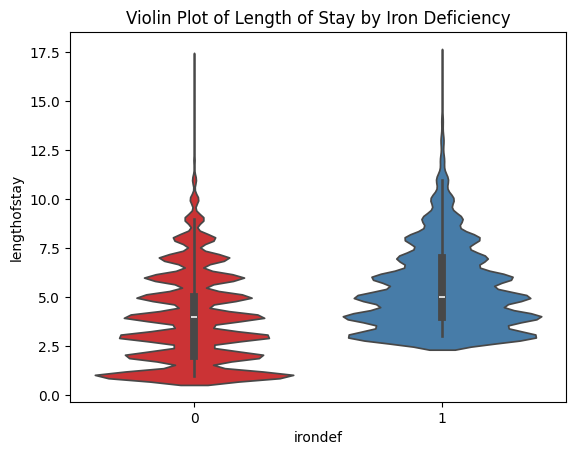

In [ ]:
# Plot violin plot for lengthofstay by irondef
sns.violinplot(x='irondef', y='lengthofstay', data=df, hue='irondef', palette='Set1', legend=False)
plt.title('Violin Plot of Length of Stay by Iron Deficiency')
plt.show()

## Multivariate Analysis

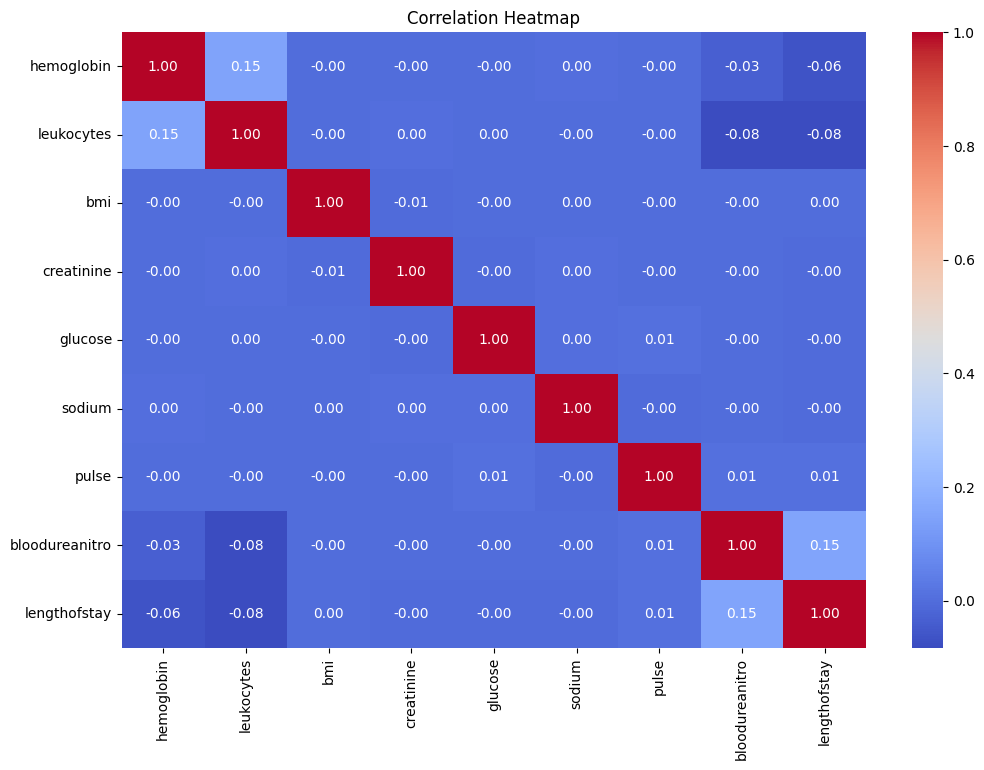

In [ ]:
# High importance value numeric features
var = ['hemoglobin', 'leukocytes', 'bmi', 'creatinine', 'glucose', 'sodium',
       'pulse', 'bloodureanitro']

# Compute the correlation matrix
correlation_matrix = df_preprocessed[var + ["lengthofstay"]].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Model Building

In [ ]:
# Install/ Import libraries
!pip install scikit-optimize

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.7 MB/s eta 0:00:00




---


Model Evaluation Function

In [ ]:
# Function used for model performance evaluation
def evaluate_model_performance(model):
    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for the train set
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    # Calculate metrics for the test set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    # Print the results
    print("[TRAINING RESULT]")
    print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
    print(f"Mean Squared Error (MSE): {mse_train:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
    print(f"R-squared (R²): {r2_train:.4f}\n")

    print("[TESTING RESULT]")
    print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
    print(f"Mean Squared Error (MSE): {mse_test:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
    print(f"R-squared (R²): {r2_test:.4f}")



---



## Deep Neural Networks (DNN)

In [ ]:
# Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

### Base Model

In [ ]:
# Define the model
dnn = Sequential()

# Input layer
dnn.add(Input(shape=(23,)))  # Define input layer separately

# Hidden layers
dnn.add(Dense(300, activation='relu'))
dnn.add(Dense(150, activation='relu'))
dnn.add(Dense(110, activation='relu'))

# Output layer for regression (1 unit, no activation function)
dnn.add(Dense(1))

# Compile the model
dnn.compile(optimizer='adam',
            loss='mse')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10,
                               restore_best_weights=True)

# Fit the model
dnn.fit(X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping])

Epoch 1/100
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 1.6054 - val_loss: 0.7397
Epoch 2/100
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6741 - val_loss: 0.6274
Epoch 3/100
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5974 - val_loss: 0.5771
Epoch 4/100
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5502 - val_loss: 0.5411
Epoch 5/100
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5201 - val_loss: 0.5572
Epoch 6/100
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4928 - val_loss: 0.5128
Epoch 7/100
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4725 - val_loss: 0.5111
Epoch 8/100
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4504 - val_loss: 0.5016
Epoch 9/100
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4446 - val_loss: 0.4927
Epoch 10/100
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4302 - val_loss: 0.4911
Epoch 11/100
2186/2186 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4124 - val_loss: 0.4837
Epoch 12/100
2186/

In [ ]:
# Evaluate Model Performance
evaluate_model_performance(dnn)

2186/2186 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
[TRAINING RESULT]
Mean Absolute Error (MAE): 0.3647
Mean Squared Error (MSE): 0.2731
Root Mean Squared Error (RMSE): 0.5226
R-squared (R²): 0.9509

[TESTING RESULT]
Mean Absolute Error (MAE): 0.4302
Mean Squared Error (MSE): 0.4150
Root Mean Squared Error (RMSE): 0.6442
R-squared (R²): 0.9264


### Hyperparameter Tuning

In [ ]:
! pip install hyperopt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK

In [ ]:
def create_model(params):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],))) # Input object as first layer
    model.add(Dense(params['units'], activation=params['activation'],
                    kernel_regularizer=l2(params['l2'])))

    for _ in range(params['num_layers']):
        model.add(Dense(params['units'], activation=params['activation'],
                        kernel_regularizer=l2(params['l2'])))

    model.add(Dense(1))  # Output layer for regression

    # Set up the optimizer with the learning rate
    if params['optimizer'] == 'adam':
        optimizer = Adam(learning_rate=params['learning_rate'])
    elif params['optimizer'] == 'sgd':
        optimizer = SGD(learning_rate=params['learning_rate'])
    elif params['optimizer'] == 'rmsprop':
        optimizer = RMSprop(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer, loss='mse')
    return model

In [ ]:
def objective(params):
    model = create_model(params)

    # Set up Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10,
                                   restore_best_weights=True)

    history = model.fit(
        X_train,
        y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        verbose=2,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping]
    )

    val_loss = min(history.history['val_loss'])
    return {'loss': val_loss, 'status': STATUS_OK}

In [ ]:
# Define the hyperparameter search space
space = {
    'units': hp.randint('units', 40, 500),
    'activation': hp.choice('activation', ['relu', 'sigmoid', 'tanh']),
    'optimizer': hp.choice('optimizer', ['adam', 'sgd', 'rmsprop']),
    'num_layers': hp.randint('num_layers', 3, 7),
    'batch_size': hp.randint('batch_size', 32, 129),
    'epochs': hp.randint('epochs', 50, 101),
    'l2': hp.loguniform('l2', np.log(1e-3), np.log(1e-2)),
    'learning_rate': hp.loguniform('learning_rate', np.log(1e-5), np.log(1e-1)),
}

trials = Trials()
dnn_best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

# Print the best hyperparameters and best score
print("Best hyperparameters:", dnn_best_params)

Streaming output truncated to the last 5000 lines.
1555/1555 - 3s - 2ms/step - loss: 0.9197 - val_loss: 0.9638

Epoch 56/62

1555/1555 - 3s - 2ms/step - loss: 0.9172 - val_loss: 0.9593

Epoch 57/62

1555/1555 - 3s - 2ms/step - loss: 0.9145 - val_loss: 0.9599

Epoch 58/62

1555/1555 - 3s - 2ms/step - loss: 0.9122 - val_loss: 0.9570

Epoch 59/62

1555/1555 - 2s - 2ms/step - loss: 0.9101 - val_loss: 0.9603

Epoch 60/62

1555/1555 - 3s - 2ms/step - loss: 0.9076 - val_loss: 0.9508

Epoch 61/62

1555/1555 - 3s - 2ms/step - loss: 0.9052 - val_loss: 0.9511

Epoch 62/62

1555/1555 - 3s - 2ms/step - loss: 0.9030 - val_loss: 0.9505

Epoch 1/90

560/560 - 19s - 34ms/step - loss: 13.1789 - val_loss: 7.5846

Epoch 2/90

560/560 - 1s - 2ms/step - loss: 6.6658 - val_loss: 5.6186

Epoch 3/90

560/560 - 1s - 2ms/step - loss: 4.7063 - val_loss: 4.0919

Epoch 4/90

560/560 - 1s - 2ms/step - loss: 3.8709 - val_loss: 3.8001

Epoch 5/90

560/560 - 1s - 2ms/step - loss: 3.6441 - val_loss: 3.6188

Epoch 6/90



In [ ]:
# Use the best hyperparameters to create and train the final model
# Best hyperparameters from Hyperopt
best_params = {
    'activation': 'relu',
    'batch_size': 53,
    'epochs': 72,
    'l2': 0.0010271586716838813,
    'learning_rate': 0.001626237209070081,
    'num_layers': 5,
    'optimizer': 'rmsprop',
    'units': 98
}

# Create and train the final model with the best hyperparameters
dnn_opt = create_model(best_params)

# Train the final model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_dnn = dnn_opt.fit(
    X_train,
    y_train,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=2,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/72
1320/1320 - 7s - 5ms/step - loss: 1.4835 - val_loss: 0.8834
Epoch 2/72
1320/1320 - 2s - 2ms/step - loss: 0.9271 - val_loss: 1.2391
Epoch 3/72
1320/1320 - 2s - 2ms/step - loss: 0.8219 - val_loss: 0.8423
Epoch 4/72
1320/1320 - 2s - 2ms/step - loss: 0.7587 - val_loss: 0.7855
Epoch 5/72
1320/1320 - 2s - 2ms/step - loss: 0.7277 - val_loss: 0.6987
Epoch 6/72
1320/1320 - 2s - 2ms/step - loss: 0.7080 - val_loss: 0.7267
Epoch 7/72
1320/1320 - 2s - 2ms/step - loss: 0.6902 - val_loss: 0.7788
Epoch 8/72
1320/1320 - 2s - 2ms/step - loss: 0.6755 - val_loss: 0.6824
Epoch 9/72
1320/1320 - 2s - 2ms/step - loss: 0.6634 - val_loss: 0.6565
Epoch 10/72
1320/1320 - 2s - 2ms/step - loss: 0.6523 - val_loss: 0.7013
Epoch 11/72
1320/1320 - 2s - 2ms/step - loss: 0.6378 - val_loss: 0.6232
Epoch 12/72
1320/1320 - 2s - 2ms/step - loss: 0.6285 - val_loss: 0.6838
Epoch 13/72
1320/1320 - 2s - 2ms/step - loss: 0.6161 - val_loss: 0.6137
Epoch 14/72
1320/1320 - 2s - 2ms/step - loss: 0.6030 - val_loss: 0.6076
E

In [ ]:
# Evaluate the performance of the best model
evaluate_model_performance(dnn_opt)

2186/2186 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
[TRAINING RESULT]
Mean Absolute Error (MAE): 0.4413
Mean Squared Error (MSE): 0.3918
Root Mean Squared Error (RMSE): 0.6259
R-squared (R²): 0.9296

[TESTING RESULT]
Mean Absolute Error (MAE): 0.4449
Mean Squared Error (MSE): 0.4051
Root Mean Squared Error (RMSE): 0.6365
R-squared (R²): 0.9282


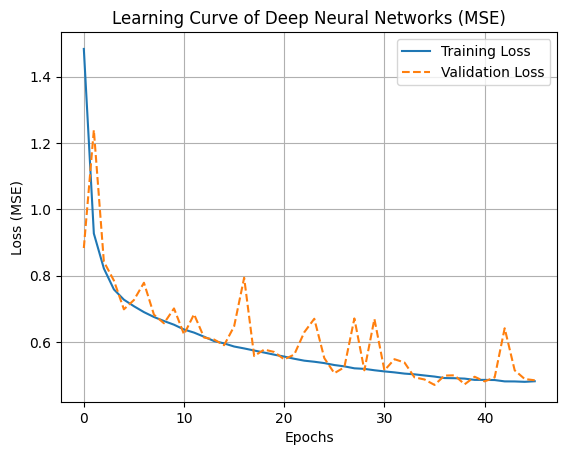

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_dnn.history['loss'], label='Training Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve of Deep Neural Networks (MSE)')
plt.legend()
plt.grid(True)
plt.show()

## TabNet

In [ ]:
# Install/ Import libraries
pip install pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.0 MB/s eta 0:00:00


### Base Model

In [ ]:
# Reshape y_train to be a 2D array
y_train_reshaped = y_train.values.reshape(-1, 1)
# Reshape y_val to be a 2D array
y_val_reshaped = y_val.values.reshape(-1, 1)

# Initialize TabNetRegressor
tabnet = TabNetRegressor()

# Fit the model with the validation set
tabnet.fit(
    X_train.values,
    y_train_reshaped,
    eval_set=[(X_train.values, y_train_reshaped),
              (X_val.values, y_val_reshaped)],
    eval_name=['train', 'val'])

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.31662 | train_mse: 2.83233 | val_mse: 2.83619 |  0:00:05s
epoch 1  | loss: 1.39546 | train_mse: 2.60334 | val_mse: 2.62138 |  0:00:11s
epoch 2  | loss: 1.21874 | train_mse: 1.62214 | val_mse: 1.64772 |  0:00:17s
epoch 3  | loss: 1.07389 | train_mse: 1.1915  | val_mse: 1.2149  |  0:00:23s
epoch 4  | loss: 0.98877 | train_mse: 1.00199 | val_mse: 1.03813 |  0:00:28s
epoch 5  | loss: 0.93931 | train_mse: 0.8959  | val_mse: 0.92654 |  0:00:34s
epoch 6  | loss: 0.89466 | train_mse: 0.85305 | val_mse: 0.88274 |  0:00:40s
epoch 7  | loss: 0.86331 | train_mse: 0.80086 | val_mse: 0.83215 |  0:00:46s
epoch 8  | loss: 0.81968 | train_mse: 0.79945 | val_mse: 0.82501 |  0:00:52s
epoch 9  | loss: 0.78029 | train_mse: 0.80266 | val_mse: 0.8193  |  0:00:58s
epoch 10 | loss: 0.76807 | train_mse: 0.70521 | val_mse: 0.74386 |  0:01:04s
epoch 11 | loss: 0.72508 | train_mse: 0.70962 | val_mse: 0.73155 |  0:01:10s
epoch 12 | loss: 0.70767 | train_mse: 0.64888 | val_mse: 0.66363 |  0:01:16s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# Make predictions on training data
y_train_pred = tabnet.predict(X_train.values).flatten()

# Make predictions on test data
y_test_pred = tabnet.predict(X_test.values).flatten()

# Calculate metrics for training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("[TRAINING RESULT]")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R-squared (R²): {r2_train:.4f}")

print("\n[TESTING RESULT]")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}")

[TRAINING RESULT]
Mean Absolute Error (MAE): 0.4188
Mean Squared Error (MSE): 0.3732
Root Mean Squared Error (RMSE): 0.6109
R-squared (R²): 0.9330

[TESTING RESULT]
Mean Absolute Error (MAE): 0.4255
Mean Squared Error (MSE): 0.3960
Root Mean Squared Error (RMSE): 0.6293
R-squared (R²): 0.9298


### Hyperparameter Tuning

In [ ]:
# Import Libraries
from skopt import BayesSearchCV

In [ ]:
# Reshape y_train to be a 2D array
y_train_reshaped = y_train.values.reshape(-1, 1)
# Reshape y_val to be a 2D array
y_val_reshaped = y_val.values.reshape(-1, 1)

# Define the hyperparameter search space
param_grid = {
    'n_d': (8, 64),                 # Number of decision steps
    'n_a': (8, 64),                 # Number of attention steps
    'n_steps': (3, 10),             # Number of steps in the decision process
    'n_independent': (1, 5),        # Number of independent components in each decision step
    'n_shared': (1, 5),             # Number of shared components in each decision step
    'gamma': (1.0, 2.0),            # Relaxation factor to control sparsity
    'lambda_sparse': (1e-5, 1e-3),  # Sparsity regularization
    'momentum': (1e-2, 4e-1)         # Momentum in batch normalization
}

# Define the TabNet model
tabnet_model = TabNetRegressor()

# Define the BayesSearchCV object
tabnet_opt = BayesSearchCV(
    estimator=tabnet_model,
    search_spaces=param_grid,
    n_iter=16,                        # Number of iterations to run
    cv=3,                             # 3-fold cross-validation
    random_state=42,
    scoring='neg_mean_squared_error'  # Ensure the scoring metric is appropriate
)

# Fit the BayesSearchCV model
tabnet_opt.fit(
    X_train.values,
    y_train_reshaped,
    eval_set=[(X_train.values, y_train_reshaped), (X_val.values, y_val_reshaped)],
    eval_name=['train', 'val'],
    batch_size=1024,
    virtual_batch_size=128,
    max_epochs=100,
    patience=10
)

# Best hyperparameters
print("Best Hyperparameters: ", tabnet_opt.best_params_)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.95472 | train_mse: 4.26482 | val_mse: 4.19809 |  0:00:10s
epoch 1  | loss: 3.94392 | train_mse: 3.85469 | val_mse: 3.86481 |  0:00:20s
epoch 2  | loss: 2.19645 | train_mse: 2.44746 | val_mse: 2.46811 |  0:00:31s
epoch 3  | loss: 2.15173 | train_mse: 2.07981 | val_mse: 2.0998  |  0:00:41s
epoch 4  | loss: 1.45545 | train_mse: 1.55808 | val_mse: 1.5552  |  0:00:51s
epoch 5  | loss: 1.41919 | train_mse: 1.39877 | val_mse: 1.41658 |  0:01:02s
epoch 6  | loss: 1.38217 | train_mse: 1.20209 | val_mse: 1.22781 |  0:01:12s
epoch 7  | loss: 1.14028 | train_mse: 1.08302 | val_mse: 1.11921 |  0:01:23s
epoch 8  | loss: 1.06246 | train_mse: 1.01866 | val_mse: 1.05932 |  0:01:34s
epoch 9  | loss: 1.1009  | train_mse: 0.99345 | val_mse: 1.01792 |  0:01:45s
epoch 10 | loss: 1.03902 | train_mse: 1.012   | val_mse: 1.05368 |  0:01:56s
epoch 11 | loss: 1.02203 | train_mse: 0.96862 | val_mse: 0.9927  |  0:02:07s
epoch 12 | loss: 1.02429 | train_mse: 0.9586  | val_mse: 0.98005 |  0:02:18s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.76896 | train_mse: 4.44312 | val_mse: 4.44323 |  0:00:10s
epoch 1  | loss: 2.78447 | train_mse: 3.59191 | val_mse: 3.56344 |  0:00:21s
epoch 2  | loss: 2.26814 | train_mse: 3.81447 | val_mse: 3.86843 |  0:00:31s
epoch 3  | loss: 1.94242 | train_mse: 2.78249 | val_mse: 2.79813 |  0:00:41s
epoch 4  | loss: 1.64401 | train_mse: 2.09553 | val_mse: 2.07317 |  0:00:52s
epoch 5  | loss: 1.30878 | train_mse: 1.51248 | val_mse: 1.52692 |  0:01:02s
epoch 6  | loss: 1.21341 | train_mse: 1.11939 | val_mse: 1.15208 |  0:01:13s
epoch 7  | loss: 1.18872 | train_mse: 1.03749 | val_mse: 1.06526 |  0:01:24s
epoch 8  | loss: 1.11694 | train_mse: 1.01376 | val_mse: 1.02248 |  0:01:35s
epoch 9  | loss: 1.10087 | train_mse: 1.24101 | val_mse: 1.26424 |  0:01:45s
epoch 10 | loss: 1.0569  | train_mse: 1.00772 | val_mse: 1.02542 |  0:01:56s
epoch 11 | loss: 0.98984 | train_mse: 0.91469 | val_mse: 0.9339  |  0:02:06s
epoch 12 | loss: 0.98103 | train_mse: 0.93064 | val_mse: 0.95377 |  0:02:17s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.53925 | train_mse: 4.16608 | val_mse: 4.14946 |  0:00:10s
epoch 1  | loss: 3.07388 | train_mse: 3.67269 | val_mse: 3.6799  |  0:00:21s
epoch 2  | loss: 1.98273 | train_mse: 2.98343 | val_mse: 2.96699 |  0:00:31s
epoch 3  | loss: 1.89542 | train_mse: 3.22476 | val_mse: 3.20146 |  0:00:42s
epoch 4  | loss: 1.79057 | train_mse: 2.108   | val_mse: 2.14794 |  0:00:53s
epoch 5  | loss: 1.57078 | train_mse: 1.78563 | val_mse: 1.80477 |  0:01:04s
epoch 6  | loss: 1.55024 | train_mse: 1.67749 | val_mse: 1.70353 |  0:01:14s
epoch 7  | loss: 1.49201 | train_mse: 1.40967 | val_mse: 1.44002 |  0:01:25s
epoch 8  | loss: 1.45738 | train_mse: 1.33915 | val_mse: 1.37803 |  0:01:35s
epoch 9  | loss: 1.4021  | train_mse: 1.43202 | val_mse: 1.45704 |  0:01:46s
epoch 10 | loss: 1.37362 | train_mse: 1.31903 | val_mse: 1.33007 |  0:01:56s
epoch 11 | loss: 1.34431 | train_mse: 1.28184 | val_mse: 1.29491 |  0:02:07s
epoch 12 | loss: 1.29597 | train_mse: 1.25666 | val_mse: 1.30294 |  0:02:17s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.64989 | train_mse: 5.18799 | val_mse: 5.1146  |  0:00:05s
epoch 1  | loss: 2.05749 | train_mse: 4.07616 | val_mse: 4.02859 |  0:00:11s
epoch 2  | loss: 1.63908 | train_mse: 2.48263 | val_mse: 2.45277 |  0:00:16s
epoch 3  | loss: 1.6973  | train_mse: 2.4961  | val_mse: 2.49071 |  0:00:21s
epoch 4  | loss: 1.41983 | train_mse: 1.56037 | val_mse: 1.58294 |  0:00:27s
epoch 5  | loss: 1.37736 | train_mse: 1.52526 | val_mse: 1.53243 |  0:00:32s
epoch 6  | loss: 1.2749  | train_mse: 1.35301 | val_mse: 1.38157 |  0:00:38s
epoch 7  | loss: 1.24494 | train_mse: 1.15841 | val_mse: 1.19704 |  0:00:44s
epoch 8  | loss: 1.12138 | train_mse: 1.10345 | val_mse: 1.12969 |  0:00:49s
epoch 9  | loss: 1.08631 | train_mse: 0.99532 | val_mse: 1.01405 |  0:00:55s
epoch 10 | loss: 1.03769 | train_mse: 0.95678 | val_mse: 0.97953 |  0:01:00s
epoch 11 | loss: 0.99954 | train_mse: 0.94224 | val_mse: 0.96839 |  0:01:06s
epoch 12 | loss: 0.97305 | train_mse: 0.89596 | val_mse: 0.91917 |  0:01:12s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.63594 | train_mse: 3.76426 | val_mse: 3.75006 |  0:00:05s
epoch 1  | loss: 2.14329 | train_mse: 3.06741 | val_mse: 3.06439 |  0:00:11s
epoch 2  | loss: 1.74966 | train_mse: 2.80971 | val_mse: 2.76672 |  0:00:16s
epoch 3  | loss: 1.45609 | train_mse: 1.95233 | val_mse: 1.97192 |  0:00:22s
epoch 4  | loss: 1.43241 | train_mse: 1.53648 | val_mse: 1.56086 |  0:00:27s
epoch 5  | loss: 1.34097 | train_mse: 1.34799 | val_mse: 1.37223 |  0:00:33s
epoch 6  | loss: 1.23428 | train_mse: 1.28918 | val_mse: 1.30513 |  0:00:39s
epoch 7  | loss: 1.16085 | train_mse: 1.13533 | val_mse: 1.16036 |  0:00:45s
epoch 8  | loss: 1.12442 | train_mse: 1.03407 | val_mse: 1.07248 |  0:00:50s
epoch 9  | loss: 1.05287 | train_mse: 0.97161 | val_mse: 1.00103 |  0:00:56s
epoch 10 | loss: 0.95963 | train_mse: 0.8796  | val_mse: 0.91959 |  0:01:02s
epoch 11 | loss: 0.90959 | train_mse: 0.90187 | val_mse: 0.93522 |  0:01:07s
epoch 12 | loss: 0.96111 | train_mse: 0.87354 | val_mse: 0.90988 |  0:01:13s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.62506 | train_mse: 4.60173 | val_mse: 4.54047 |  0:00:05s
epoch 1  | loss: 2.16388 | train_mse: 3.63292 | val_mse: 3.60586 |  0:00:11s
epoch 2  | loss: 1.61095 | train_mse: 3.09792 | val_mse: 3.09981 |  0:00:17s
epoch 3  | loss: 1.38495 | train_mse: 2.05599 | val_mse: 2.0707  |  0:00:22s
epoch 4  | loss: 1.31379 | train_mse: 1.39332 | val_mse: 1.4196  |  0:00:28s
epoch 5  | loss: 1.17044 | train_mse: 1.19747 | val_mse: 1.22012 |  0:00:33s
epoch 6  | loss: 1.11171 | train_mse: 1.14333 | val_mse: 1.17391 |  0:00:39s
epoch 7  | loss: 1.07364 | train_mse: 1.07261 | val_mse: 1.0913  |  0:00:45s
epoch 8  | loss: 1.03081 | train_mse: 0.96769 | val_mse: 1.00573 |  0:00:50s
epoch 9  | loss: 1.01713 | train_mse: 0.94868 | val_mse: 0.99038 |  0:00:56s
epoch 10 | loss: 0.99842 | train_mse: 0.97467 | val_mse: 1.02199 |  0:01:01s
epoch 11 | loss: 1.00954 | train_mse: 0.91454 | val_mse: 0.94624 |  0:01:07s
epoch 12 | loss: 0.95929 | train_mse: 0.87323 | val_mse: 0.89709 |  0:01:13s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.92184 | train_mse: 5.12907 | val_mse: 5.05804 |  0:00:10s
epoch 1  | loss: 2.98123 | train_mse: 4.71893 | val_mse: 4.67627 |  0:00:21s
epoch 2  | loss: 2.32596 | train_mse: 3.73397 | val_mse: 3.68682 |  0:00:31s
epoch 3  | loss: 1.7467  | train_mse: 2.64559 | val_mse: 2.64557 |  0:00:42s
epoch 4  | loss: 1.60216 | train_mse: 1.7298  | val_mse: 1.77388 |  0:00:52s
epoch 5  | loss: 1.63369 | train_mse: 1.61037 | val_mse: 1.63315 |  0:01:03s
epoch 6  | loss: 1.55526 | train_mse: 1.5044  | val_mse: 1.51745 |  0:01:14s
epoch 7  | loss: 1.41283 | train_mse: 1.27727 | val_mse: 1.30425 |  0:01:25s
epoch 8  | loss: 1.33359 | train_mse: 1.23081 | val_mse: 1.26354 |  0:01:35s
epoch 9  | loss: 1.2837  | train_mse: 1.2055  | val_mse: 1.21776 |  0:01:46s
epoch 10 | loss: 1.17833 | train_mse: 1.06493 | val_mse: 1.09904 |  0:01:57s
epoch 11 | loss: 1.09921 | train_mse: 1.01953 | val_mse: 1.04716 |  0:02:07s
epoch 12 | loss: 1.05674 | train_mse: 1.02676 | val_mse: 1.07618 |  0:02:18s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.6675  | train_mse: 5.93088 | val_mse: 5.92643 |  0:00:10s
epoch 1  | loss: 3.19263 | train_mse: 4.3964  | val_mse: 4.39759 |  0:00:21s
epoch 2  | loss: 2.3249  | train_mse: 3.77933 | val_mse: 3.77483 |  0:00:32s
epoch 3  | loss: 2.08771 | train_mse: 2.87235 | val_mse: 2.91318 |  0:00:43s
epoch 4  | loss: 1.80174 | train_mse: 2.40559 | val_mse: 2.40172 |  0:00:54s
epoch 5  | loss: 1.63244 | train_mse: 1.73221 | val_mse: 1.74025 |  0:01:05s
epoch 6  | loss: 1.61739 | train_mse: 1.52316 | val_mse: 1.54547 |  0:01:16s
epoch 7  | loss: 1.41516 | train_mse: 1.36981 | val_mse: 1.37249 |  0:01:26s
epoch 8  | loss: 1.32563 | train_mse: 1.30616 | val_mse: 1.33606 |  0:01:37s
epoch 9  | loss: 1.27543 | train_mse: 1.21209 | val_mse: 1.23218 |  0:01:48s
epoch 10 | loss: 1.23579 | train_mse: 1.20931 | val_mse: 1.21312 |  0:01:59s
epoch 11 | loss: 1.16945 | train_mse: 1.14711 | val_mse: 1.18365 |  0:02:10s
epoch 12 | loss: 1.12776 | train_mse: 1.06529 | val_mse: 1.06909 |  0:02:20s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.32812 | train_mse: 5.24144 | val_mse: 5.20072 |  0:00:10s
epoch 1  | loss: 2.96652 | train_mse: 4.233   | val_mse: 4.18376 |  0:00:21s
epoch 2  | loss: 2.80548 | train_mse: 4.54454 | val_mse: 4.53352 |  0:00:32s
epoch 3  | loss: 2.49629 | train_mse: 3.52851 | val_mse: 3.55762 |  0:00:43s
epoch 4  | loss: 2.11394 | train_mse: 2.52781 | val_mse: 2.5528  |  0:00:53s
epoch 5  | loss: 1.8671  | train_mse: 1.97907 | val_mse: 2.02866 |  0:01:04s
epoch 6  | loss: 1.71989 | train_mse: 1.62616 | val_mse: 1.67657 |  0:01:16s
epoch 7  | loss: 1.52752 | train_mse: 1.4859  | val_mse: 1.52667 |  0:01:27s
epoch 8  | loss: 1.57723 | train_mse: 1.54183 | val_mse: 1.57309 |  0:01:38s
epoch 9  | loss: 1.55373 | train_mse: 1.4106  | val_mse: 1.43345 |  0:01:49s
epoch 10 | loss: 1.38891 | train_mse: 1.23293 | val_mse: 1.25814 |  0:02:00s
epoch 11 | loss: 1.31484 | train_mse: 1.18104 | val_mse: 1.21227 |  0:02:11s
epoch 12 | loss: 1.32019 | train_mse: 1.36621 | val_mse: 1.41984 |  0:02:21s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8.04565 | train_mse: 4.91488 | val_mse: 4.89407 |  0:00:11s
epoch 1  | loss: 4.86945 | train_mse: 5.00628 | val_mse: 4.95204 |  0:00:23s
epoch 2  | loss: 3.59152 | train_mse: 3.82148 | val_mse: 3.82347 |  0:00:35s
epoch 3  | loss: 2.8189  | train_mse: 3.51101 | val_mse: 3.51018 |  0:00:47s
epoch 4  | loss: 1.84021 | train_mse: 1.97623 | val_mse: 1.98552 |  0:00:58s
epoch 5  | loss: 1.78962 | train_mse: 1.71252 | val_mse: 1.74978 |  0:01:10s
epoch 6  | loss: 1.55737 | train_mse: 1.43558 | val_mse: 1.4694  |  0:01:22s
epoch 7  | loss: 1.50359 | train_mse: 1.35245 | val_mse: 1.38657 |  0:01:35s
epoch 8  | loss: 1.34437 | train_mse: 1.33165 | val_mse: 1.36382 |  0:01:46s
epoch 9  | loss: 1.25815 | train_mse: 1.11512 | val_mse: 1.14967 |  0:01:58s
epoch 10 | loss: 1.1728  | train_mse: 1.23138 | val_mse: 1.25184 |  0:02:10s
epoch 11 | loss: 1.12294 | train_mse: 1.00811 | val_mse: 1.04107 |  0:02:22s
epoch 12 | loss: 1.04241 | train_mse: 0.96848 | val_mse: 1.00346 |  0:02:34s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.96562 | train_mse: 4.85518 | val_mse: 4.88104 |  0:00:12s
epoch 1  | loss: 4.99133 | train_mse: 4.54852 | val_mse: 4.50354 |  0:00:23s
epoch 2  | loss: 3.28936 | train_mse: 5.05705 | val_mse: 4.99301 |  0:00:35s
epoch 3  | loss: 2.40089 | train_mse: 3.68064 | val_mse: 3.65809 |  0:00:47s
epoch 4  | loss: 2.18669 | train_mse: 2.90204 | val_mse: 2.93558 |  0:00:59s
epoch 5  | loss: 1.9967  | train_mse: 1.91433 | val_mse: 1.95502 |  0:01:11s
epoch 6  | loss: 1.61756 | train_mse: 1.43686 | val_mse: 1.47847 |  0:01:23s
epoch 7  | loss: 1.52289 | train_mse: 1.33633 | val_mse: 1.3614  |  0:01:34s
epoch 8  | loss: 1.32554 | train_mse: 1.34171 | val_mse: 1.38638 |  0:01:46s
epoch 9  | loss: 1.28959 | train_mse: 1.26753 | val_mse: 1.29888 |  0:01:58s
epoch 10 | loss: 1.31846 | train_mse: 1.19101 | val_mse: 1.20721 |  0:02:09s
epoch 11 | loss: 1.31438 | train_mse: 1.43603 | val_mse: 1.45213 |  0:02:21s
epoch 12 | loss: 1.41677 | train_mse: 1.27323 | val_mse: 1.27877 |  0:02:33s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.36701 | train_mse: 4.9621  | val_mse: 4.98913 |  0:00:11s
epoch 1  | loss: 4.00065 | train_mse: 4.99109 | val_mse: 4.89202 |  0:00:23s
epoch 2  | loss: 3.45385 | train_mse: 3.89738 | val_mse: 3.87255 |  0:00:34s
epoch 3  | loss: 2.81686 | train_mse: 3.45284 | val_mse: 3.43658 |  0:00:46s
epoch 4  | loss: 2.69214 | train_mse: 2.58546 | val_mse: 2.58816 |  0:00:58s
epoch 5  | loss: 1.904   | train_mse: 1.84839 | val_mse: 1.89326 |  0:01:10s
epoch 6  | loss: 1.65783 | train_mse: 1.58076 | val_mse: 1.5726  |  0:01:22s
epoch 7  | loss: 1.45987 | train_mse: 1.49561 | val_mse: 1.50671 |  0:01:33s
epoch 8  | loss: 1.83181 | train_mse: 1.57448 | val_mse: 1.59622 |  0:01:45s
epoch 9  | loss: 1.67881 | train_mse: 1.65047 | val_mse: 1.68803 |  0:01:57s
epoch 10 | loss: 1.70739 | train_mse: 1.54581 | val_mse: 1.51066 |  0:02:08s
epoch 11 | loss: 1.38778 | train_mse: 1.20834 | val_mse: 1.19962 |  0:02:20s
epoch 12 | loss: 1.20995 | train_mse: 1.13595 | val_mse: 1.16776 |  0:02:32s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8.66441 | train_mse: 7.22699 | val_mse: 7.08077 |  0:00:13s
epoch 1  | loss: 4.71861 | train_mse: 4.81056 | val_mse: 4.77443 |  0:00:26s
epoch 2  | loss: 2.24025 | train_mse: 3.18702 | val_mse: 3.1961  |  0:00:40s
epoch 3  | loss: 1.83848 | train_mse: 3.42972 | val_mse: 3.42188 |  0:00:54s
epoch 4  | loss: 1.66971 | train_mse: 2.05326 | val_mse: 2.06249 |  0:01:07s
epoch 5  | loss: 1.67271 | train_mse: 1.57279 | val_mse: 1.5722  |  0:01:21s
epoch 6  | loss: 1.40294 | train_mse: 1.34776 | val_mse: 1.37713 |  0:01:34s
epoch 7  | loss: 1.21737 | train_mse: 1.25478 | val_mse: 1.27292 |  0:01:48s
epoch 8  | loss: 1.24042 | train_mse: 1.12569 | val_mse: 1.1212  |  0:02:01s
epoch 9  | loss: 1.20399 | train_mse: 1.13484 | val_mse: 1.15531 |  0:02:14s
epoch 10 | loss: 1.11956 | train_mse: 1.06069 | val_mse: 1.08509 |  0:02:28s
epoch 11 | loss: 1.04831 | train_mse: 1.00274 | val_mse: 1.02411 |  0:02:41s
epoch 12 | loss: 1.0049  | train_mse: 0.94375 | val_mse: 0.96538 |  0:02:55s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8.14332 | train_mse: 7.38372 | val_mse: 7.32815 |  0:00:13s
epoch 1  | loss: 4.76333 | train_mse: 4.86458 | val_mse: 4.81974 |  0:00:26s
epoch 2  | loss: 2.85054 | train_mse: 4.05718 | val_mse: 4.03264 |  0:00:40s
epoch 3  | loss: 2.02633 | train_mse: 2.83654 | val_mse: 2.80611 |  0:00:53s
epoch 4  | loss: 1.71258 | train_mse: 1.63093 | val_mse: 1.65166 |  0:01:07s
epoch 5  | loss: 1.38316 | train_mse: 1.56109 | val_mse: 1.59398 |  0:01:21s
epoch 6  | loss: 1.3405  | train_mse: 1.43783 | val_mse: 1.44228 |  0:01:34s
epoch 7  | loss: 1.359   | train_mse: 1.30169 | val_mse: 1.30686 |  0:01:48s
epoch 8  | loss: 1.14664 | train_mse: 1.24888 | val_mse: 1.27036 |  0:02:01s
epoch 9  | loss: 1.19628 | train_mse: 1.13119 | val_mse: 1.16247 |  0:02:15s
epoch 10 | loss: 1.13648 | train_mse: 1.01307 | val_mse: 1.04746 |  0:02:28s
epoch 11 | loss: 1.05469 | train_mse: 1.03025 | val_mse: 1.06357 |  0:02:41s
epoch 12 | loss: 1.03899 | train_mse: 0.94025 | val_mse: 0.96008 |  0:02:55s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8.50536 | train_mse: 4.64348 | val_mse: 4.68818 |  0:00:13s
epoch 1  | loss: 5.3592  | train_mse: 6.40563 | val_mse: 6.29237 |  0:00:26s
epoch 2  | loss: 3.05239 | train_mse: 3.60546 | val_mse: 3.57792 |  0:00:40s
epoch 3  | loss: 3.11374 | train_mse: 3.94497 | val_mse: 3.93578 |  0:00:53s
epoch 4  | loss: 2.10138 | train_mse: 2.03814 | val_mse: 2.06898 |  0:01:06s
epoch 5  | loss: 1.6742  | train_mse: 1.52003 | val_mse: 1.55922 |  0:01:20s
epoch 6  | loss: 1.6133  | train_mse: 1.77772 | val_mse: 1.81127 |  0:01:33s
epoch 7  | loss: 1.61252 | train_mse: 1.56545 | val_mse: 1.59389 |  0:01:48s
epoch 8  | loss: 1.53599 | train_mse: 1.63439 | val_mse: 1.63895 |  0:02:01s
epoch 9  | loss: 1.46494 | train_mse: 1.39533 | val_mse: 1.41208 |  0:02:15s
epoch 10 | loss: 1.34063 | train_mse: 1.31267 | val_mse: 1.37287 |  0:02:28s
epoch 11 | loss: 1.25551 | train_mse: 1.62299 | val_mse: 1.70931 |  0:02:42s
epoch 12 | loss: 1.2577  | train_mse: 1.46477 | val_mse: 1.48857 |  0:02:55s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.98011 | train_mse: 5.61687 | val_mse: 5.53693 |  0:00:09s
epoch 1  | loss: 3.72171 | train_mse: 3.92688 | val_mse: 3.91159 |  0:00:18s
epoch 2  | loss: 3.25011 | train_mse: 4.24531 | val_mse: 4.14339 |  0:00:28s
epoch 3  | loss: 2.78447 | train_mse: 3.97238 | val_mse: 3.92781 |  0:00:38s
epoch 4  | loss: 2.33041 | train_mse: 2.5981  | val_mse: 2.60857 |  0:00:47s
epoch 5  | loss: 1.87106 | train_mse: 1.78318 | val_mse: 1.78411 |  0:00:57s
epoch 6  | loss: 1.46817 | train_mse: 1.41553 | val_mse: 1.44303 |  0:01:06s
epoch 7  | loss: 1.34573 | train_mse: 1.11961 | val_mse: 1.12313 |  0:01:16s
epoch 8  | loss: 1.19513 | train_mse: 1.09976 | val_mse: 1.10249 |  0:01:26s
epoch 9  | loss: 1.17112 | train_mse: 1.02875 | val_mse: 1.03228 |  0:01:36s
epoch 10 | loss: 1.07501 | train_mse: 1.0369  | val_mse: 1.0527  |  0:01:45s
epoch 11 | loss: 1.03485 | train_mse: 0.99402 | val_mse: 1.01665 |  0:01:55s
epoch 12 | loss: 1.02507 | train_mse: 0.93544 | val_mse: 0.9605  |  0:02:05s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8.58364 | train_mse: 4.76595 | val_mse: 4.73264 |  0:00:09s
epoch 1  | loss: 3.51681 | train_mse: 4.42211 | val_mse: 4.36646 |  0:00:18s
epoch 2  | loss: 2.27996 | train_mse: 3.63894 | val_mse: 3.61806 |  0:00:28s
epoch 3  | loss: 1.91224 | train_mse: 2.46427 | val_mse: 2.4869  |  0:00:38s
epoch 4  | loss: 1.49946 | train_mse: 1.74261 | val_mse: 1.76478 |  0:00:47s
epoch 5  | loss: 1.41672 | train_mse: 1.37655 | val_mse: 1.39434 |  0:00:57s
epoch 6  | loss: 1.3876  | train_mse: 1.29275 | val_mse: 1.31982 |  0:01:07s
epoch 7  | loss: 1.27651 | train_mse: 1.15411 | val_mse: 1.20048 |  0:01:16s
epoch 8  | loss: 1.24908 | train_mse: 1.13335 | val_mse: 1.16514 |  0:01:26s
epoch 9  | loss: 1.15791 | train_mse: 1.14797 | val_mse: 1.15563 |  0:01:36s
epoch 10 | loss: 1.10294 | train_mse: 1.0123  | val_mse: 1.0293  |  0:01:46s
epoch 11 | loss: 1.02661 | train_mse: 0.96211 | val_mse: 0.99601 |  0:01:55s
epoch 12 | loss: 0.99367 | train_mse: 0.92238 | val_mse: 0.94586 |  0:02:05s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8.34894 | train_mse: 4.95752 | val_mse: 4.85053 |  0:00:09s
epoch 1  | loss: 3.44128 | train_mse: 4.44749 | val_mse: 4.39895 |  0:00:18s
epoch 2  | loss: 2.39812 | train_mse: 3.66823 | val_mse: 3.67702 |  0:00:28s
epoch 3  | loss: 2.11301 | train_mse: 2.79446 | val_mse: 2.77323 |  0:00:38s
epoch 4  | loss: 1.8168  | train_mse: 2.56051 | val_mse: 2.55235 |  0:00:47s
epoch 5  | loss: 1.58178 | train_mse: 2.35914 | val_mse: 2.38542 |  0:00:57s
epoch 6  | loss: 1.50717 | train_mse: 1.52418 | val_mse: 1.55181 |  0:01:07s
epoch 7  | loss: 1.39428 | train_mse: 1.3948  | val_mse: 1.39403 |  0:01:16s
epoch 8  | loss: 1.27659 | train_mse: 1.2048  | val_mse: 1.23714 |  0:01:26s
epoch 9  | loss: 1.18704 | train_mse: 1.12645 | val_mse: 1.15232 |  0:01:35s
epoch 10 | loss: 1.14666 | train_mse: 1.08674 | val_mse: 1.10455 |  0:01:45s
epoch 11 | loss: 1.10216 | train_mse: 1.02154 | val_mse: 1.05571 |  0:01:54s
epoch 12 | loss: 1.00733 | train_mse: 0.94188 | val_mse: 0.96638 |  0:02:04s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.58433 | train_mse: 5.32852 | val_mse: 5.24594 |  0:00:11s
epoch 1  | loss: 2.40466 | train_mse: 3.77414 | val_mse: 3.75692 |  0:00:22s
epoch 2  | loss: 1.66644 | train_mse: 3.16536 | val_mse: 3.1511  |  0:00:33s
epoch 3  | loss: 1.43372 | train_mse: 2.48941 | val_mse: 2.49942 |  0:00:44s
epoch 4  | loss: 1.32928 | train_mse: 2.26993 | val_mse: 2.28633 |  0:00:54s
epoch 5  | loss: 1.22567 | train_mse: 1.5369  | val_mse: 1.555   |  0:01:05s
epoch 6  | loss: 1.16919 | train_mse: 1.75593 | val_mse: 1.77529 |  0:01:16s
epoch 7  | loss: 1.0961  | train_mse: 1.14293 | val_mse: 1.17646 |  0:01:27s
epoch 8  | loss: 1.00793 | train_mse: 0.96615 | val_mse: 1.00148 |  0:01:38s
epoch 9  | loss: 0.99944 | train_mse: 1.04749 | val_mse: 1.06983 |  0:01:49s
epoch 10 | loss: 0.9973  | train_mse: 0.92997 | val_mse: 0.96016 |  0:02:00s
epoch 11 | loss: 1.01736 | train_mse: 1.03079 | val_mse: 1.0649  |  0:02:11s
epoch 12 | loss: 0.90339 | train_mse: 0.83402 | val_mse: 0.8714  |  0:02:22s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.32407 | train_mse: 5.06458 | val_mse: 5.0106  |  0:00:10s
epoch 1  | loss: 3.01173 | train_mse: 3.82538 | val_mse: 3.8032  |  0:00:21s
epoch 2  | loss: 2.1227  | train_mse: 2.74117 | val_mse: 2.72277 |  0:00:32s
epoch 3  | loss: 1.89008 | train_mse: 1.98536 | val_mse: 1.93559 |  0:00:44s
epoch 4  | loss: 1.76338 | train_mse: 2.16497 | val_mse: 2.16571 |  0:00:54s
epoch 5  | loss: 1.53776 | train_mse: 1.4964  | val_mse: 1.52021 |  0:01:05s
epoch 6  | loss: 1.42006 | train_mse: 1.44114 | val_mse: 1.4806  |  0:01:16s
epoch 7  | loss: 1.40004 | train_mse: 1.35935 | val_mse: 1.37948 |  0:01:27s
epoch 8  | loss: 1.21999 | train_mse: 1.17256 | val_mse: 1.2108  |  0:01:38s
epoch 9  | loss: 1.13747 | train_mse: 1.12228 | val_mse: 1.1598  |  0:01:48s
epoch 10 | loss: 1.05254 | train_mse: 1.00025 | val_mse: 1.03302 |  0:01:59s
epoch 11 | loss: 0.97493 | train_mse: 0.90962 | val_mse: 0.94729 |  0:02:10s
epoch 12 | loss: 0.96034 | train_mse: 0.96534 | val_mse: 1.02712 |  0:02:21s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.545   | train_mse: 4.49794 | val_mse: 4.48607 |  0:00:11s
epoch 1  | loss: 2.97589 | train_mse: 4.14281 | val_mse: 4.08489 |  0:00:22s
epoch 2  | loss: 2.02754 | train_mse: 2.71791 | val_mse: 2.69    |  0:00:33s
epoch 3  | loss: 1.61745 | train_mse: 1.94837 | val_mse: 1.94578 |  0:00:44s
epoch 4  | loss: 1.44252 | train_mse: 1.69996 | val_mse: 1.73901 |  0:00:55s
epoch 5  | loss: 1.41379 | train_mse: 1.52097 | val_mse: 1.56574 |  0:01:07s
epoch 6  | loss: 1.35702 | train_mse: 1.32204 | val_mse: 1.36831 |  0:01:18s
epoch 7  | loss: 1.17227 | train_mse: 1.25496 | val_mse: 1.29217 |  0:01:29s
epoch 8  | loss: 1.13663 | train_mse: 1.10451 | val_mse: 1.15255 |  0:01:40s
epoch 9  | loss: 1.06263 | train_mse: 1.37409 | val_mse: 1.4112  |  0:01:51s
epoch 10 | loss: 1.13523 | train_mse: 1.05272 | val_mse: 1.08985 |  0:02:02s
epoch 11 | loss: 1.0244  | train_mse: 1.06144 | val_mse: 1.08855 |  0:02:14s
epoch 12 | loss: 1.04735 | train_mse: 0.98706 | val_mse: 1.00476 |  0:02:24s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.87451 | train_mse: 3.84294 | val_mse: 3.84921 |  0:00:04s
epoch 1  | loss: 1.46704 | train_mse: 2.86766 | val_mse: 2.87223 |  0:00:09s
epoch 2  | loss: 1.23158 | train_mse: 2.79061 | val_mse: 2.82647 |  0:00:14s
epoch 3  | loss: 1.06757 | train_mse: 1.75413 | val_mse: 1.7749  |  0:00:19s
epoch 4  | loss: 0.98459 | train_mse: 1.30171 | val_mse: 1.32451 |  0:00:24s
epoch 5  | loss: 0.90234 | train_mse: 1.11966 | val_mse: 1.15889 |  0:00:29s
epoch 6  | loss: 0.86803 | train_mse: 0.95631 | val_mse: 0.99505 |  0:00:33s
epoch 7  | loss: 0.83184 | train_mse: 0.75593 | val_mse: 0.79002 |  0:00:38s
epoch 8  | loss: 0.77798 | train_mse: 0.73745 | val_mse: 0.76806 |  0:00:43s
epoch 9  | loss: 0.75726 | train_mse: 0.71441 | val_mse: 0.75803 |  0:00:48s
epoch 10 | loss: 0.74739 | train_mse: 0.74778 | val_mse: 0.77167 |  0:00:52s
epoch 11 | loss: 0.71273 | train_mse: 0.62753 | val_mse: 0.67387 |  0:00:57s
epoch 12 | loss: 0.74062 | train_mse: 0.71858 | val_mse: 0.7439  |  0:01:03s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.64825 | train_mse: 3.81808 | val_mse: 3.79997 |  0:00:04s
epoch 1  | loss: 1.32892 | train_mse: 3.21583 | val_mse: 3.21001 |  0:00:09s
epoch 2  | loss: 1.1325  | train_mse: 2.43031 | val_mse: 2.42419 |  0:00:14s
epoch 3  | loss: 1.03379 | train_mse: 1.82088 | val_mse: 1.84688 |  0:00:19s
epoch 4  | loss: 0.98695 | train_mse: 1.59725 | val_mse: 1.6269  |  0:00:24s
epoch 5  | loss: 0.91933 | train_mse: 1.17407 | val_mse: 1.20849 |  0:00:28s
epoch 6  | loss: 0.86606 | train_mse: 0.93695 | val_mse: 0.9853  |  0:00:34s
epoch 7  | loss: 0.81985 | train_mse: 0.83583 | val_mse: 0.87426 |  0:00:39s
epoch 8  | loss: 0.77466 | train_mse: 0.7309  | val_mse: 0.77409 |  0:00:44s
epoch 9  | loss: 0.74804 | train_mse: 0.76812 | val_mse: 0.81014 |  0:00:49s
epoch 10 | loss: 0.71502 | train_mse: 0.6714  | val_mse: 0.71719 |  0:00:53s
epoch 11 | loss: 0.7013  | train_mse: 0.62858 | val_mse: 0.67166 |  0:00:58s
epoch 12 | loss: 0.68774 | train_mse: 0.63466 | val_mse: 0.68318 |  0:01:03s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.25696 | train_mse: 3.63526 | val_mse: 3.60788 |  0:00:04s
epoch 1  | loss: 1.2912  | train_mse: 2.99445 | val_mse: 2.98771 |  0:00:09s
epoch 2  | loss: 1.12833 | train_mse: 2.37271 | val_mse: 2.3848  |  0:00:14s
epoch 3  | loss: 1.01102 | train_mse: 1.59447 | val_mse: 1.62708 |  0:00:18s
epoch 4  | loss: 0.93352 | train_mse: 1.33158 | val_mse: 1.36386 |  0:00:23s
epoch 5  | loss: 0.90054 | train_mse: 1.15918 | val_mse: 1.19897 |  0:00:28s
epoch 6  | loss: 0.82394 | train_mse: 0.91514 | val_mse: 0.95739 |  0:00:33s
epoch 7  | loss: 0.7735  | train_mse: 0.75222 | val_mse: 0.79062 |  0:00:38s
epoch 8  | loss: 0.73792 | train_mse: 0.75889 | val_mse: 0.80066 |  0:00:42s
epoch 9  | loss: 0.70871 | train_mse: 0.70518 | val_mse: 0.75259 |  0:00:48s
epoch 10 | loss: 0.67491 | train_mse: 0.64567 | val_mse: 0.69323 |  0:00:52s
epoch 11 | loss: 0.66455 | train_mse: 0.6762  | val_mse: 0.71829 |  0:00:57s
epoch 12 | loss: 0.72461 | train_mse: 0.62817 | val_mse: 0.67623 |  0:01:02s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.21103 | train_mse: 5.23327 | val_mse: 5.17217 |  0:00:06s
epoch 1  | loss: 2.79654 | train_mse: 3.78195 | val_mse: 3.76957 |  0:00:13s
epoch 2  | loss: 1.63317 | train_mse: 2.29324 | val_mse: 2.27965 |  0:00:19s
epoch 3  | loss: 1.36074 | train_mse: 2.45771 | val_mse: 2.46377 |  0:00:26s
epoch 4  | loss: 1.30741 | train_mse: 1.91433 | val_mse: 1.94173 |  0:00:32s
epoch 5  | loss: 1.18943 | train_mse: 1.33661 | val_mse: 1.37738 |  0:00:39s
epoch 6  | loss: 1.08881 | train_mse: 1.09396 | val_mse: 1.11728 |  0:00:45s
epoch 7  | loss: 1.00492 | train_mse: 1.01115 | val_mse: 1.03339 |  0:00:52s
epoch 8  | loss: 0.94703 | train_mse: 0.90088 | val_mse: 0.92339 |  0:00:58s
epoch 9  | loss: 0.90588 | train_mse: 0.84993 | val_mse: 0.87951 |  0:01:05s
epoch 10 | loss: 0.87715 | train_mse: 0.81527 | val_mse: 0.84131 |  0:01:12s
epoch 11 | loss: 0.83627 | train_mse: 0.76924 | val_mse: 0.78664 |  0:01:18s
epoch 12 | loss: 0.81868 | train_mse: 0.74828 | val_mse: 0.77391 |  0:01:24s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.03344 | train_mse: 5.25731 | val_mse: 5.1576  |  0:00:06s
epoch 1  | loss: 2.69854 | train_mse: 4.00681 | val_mse: 3.92952 |  0:00:12s
epoch 2  | loss: 2.049   | train_mse: 2.27789 | val_mse: 2.24806 |  0:00:19s
epoch 3  | loss: 1.56686 | train_mse: 2.04388 | val_mse: 2.04875 |  0:00:26s
epoch 4  | loss: 1.37011 | train_mse: 1.51837 | val_mse: 1.52267 |  0:00:32s
epoch 5  | loss: 1.22312 | train_mse: 1.26332 | val_mse: 1.29011 |  0:00:39s
epoch 6  | loss: 1.20459 | train_mse: 1.23237 | val_mse: 1.25829 |  0:00:45s
epoch 7  | loss: 1.24254 | train_mse: 1.20384 | val_mse: 1.22852 |  0:00:52s
epoch 8  | loss: 1.1928  | train_mse: 1.13526 | val_mse: 1.13809 |  0:00:59s
epoch 9  | loss: 1.11728 | train_mse: 1.03962 | val_mse: 1.05505 |  0:01:06s
epoch 10 | loss: 1.06716 | train_mse: 1.03584 | val_mse: 1.07109 |  0:01:12s
epoch 11 | loss: 1.01337 | train_mse: 0.89643 | val_mse: 0.93288 |  0:01:19s
epoch 12 | loss: 0.938   | train_mse: 0.85661 | val_mse: 0.88225 |  0:01:26s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.53762 | train_mse: 4.50947 | val_mse: 4.4507  |  0:00:06s
epoch 1  | loss: 2.87709 | train_mse: 3.75128 | val_mse: 3.76626 |  0:00:12s
epoch 2  | loss: 1.9104  | train_mse: 2.77682 | val_mse: 2.76886 |  0:00:19s
epoch 3  | loss: 1.52021 | train_mse: 1.85431 | val_mse: 1.84529 |  0:00:26s
epoch 4  | loss: 1.31841 | train_mse: 1.4759  | val_mse: 1.49775 |  0:00:32s
epoch 5  | loss: 1.30484 | train_mse: 1.15691 | val_mse: 1.18148 |  0:00:39s
epoch 6  | loss: 1.20015 | train_mse: 1.14562 | val_mse: 1.16617 |  0:00:46s
epoch 7  | loss: 1.17351 | train_mse: 1.08739 | val_mse: 1.12341 |  0:00:53s
epoch 8  | loss: 1.12536 | train_mse: 1.0295  | val_mse: 1.0725  |  0:00:59s
epoch 9  | loss: 1.06263 | train_mse: 1.06183 | val_mse: 1.092   |  0:01:06s
epoch 10 | loss: 1.09675 | train_mse: 1.03242 | val_mse: 1.04828 |  0:01:12s
epoch 11 | loss: 1.09553 | train_mse: 1.0701  | val_mse: 1.10582 |  0:01:19s
epoch 12 | loss: 1.08972 | train_mse: 1.0074  | val_mse: 1.02526 |  0:01:26s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.31857 | train_mse: 3.66326 | val_mse: 3.65663 |  0:00:05s
epoch 1  | loss: 1.28318 | train_mse: 2.67973 | val_mse: 2.70372 |  0:00:11s
epoch 2  | loss: 1.09411 | train_mse: 1.89267 | val_mse: 1.91312 |  0:00:17s
epoch 3  | loss: 1.05597 | train_mse: 1.48628 | val_mse: 1.52443 |  0:00:23s
epoch 4  | loss: 1.00662 | train_mse: 1.14116 | val_mse: 1.19638 |  0:00:29s
epoch 5  | loss: 0.94568 | train_mse: 0.9962  | val_mse: 1.04726 |  0:00:35s
epoch 6  | loss: 0.8881  | train_mse: 0.84843 | val_mse: 0.88693 |  0:00:40s
epoch 7  | loss: 0.83769 | train_mse: 0.7896  | val_mse: 0.83186 |  0:00:46s
epoch 8  | loss: 0.80619 | train_mse: 0.79268 | val_mse: 0.82512 |  0:00:52s
epoch 9  | loss: 0.78184 | train_mse: 0.7207  | val_mse: 0.74391 |  0:00:58s
epoch 10 | loss: 0.73569 | train_mse: 0.67495 | val_mse: 0.7133  |  0:01:04s
epoch 11 | loss: 0.72571 | train_mse: 0.67917 | val_mse: 0.71488 |  0:01:10s
epoch 12 | loss: 0.71227 | train_mse: 0.64712 | val_mse: 0.67867 |  0:01:16s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.59666 | train_mse: 3.70909 | val_mse: 3.69034 |  0:00:05s
epoch 1  | loss: 1.51096 | train_mse: 2.92719 | val_mse: 2.93563 |  0:00:11s
epoch 2  | loss: 1.33664 | train_mse: 2.23593 | val_mse: 2.22077 |  0:00:17s
epoch 3  | loss: 1.11555 | train_mse: 1.73377 | val_mse: 1.74494 |  0:00:23s
epoch 4  | loss: 1.05193 | train_mse: 1.40152 | val_mse: 1.41441 |  0:00:29s
epoch 5  | loss: 0.97871 | train_mse: 1.13397 | val_mse: 1.14065 |  0:00:35s
epoch 6  | loss: 0.95347 | train_mse: 0.95504 | val_mse: 0.97836 |  0:00:41s
epoch 7  | loss: 0.93637 | train_mse: 0.90223 | val_mse: 0.93825 |  0:00:47s
epoch 8  | loss: 0.88532 | train_mse: 0.85119 | val_mse: 0.88035 |  0:00:53s
epoch 9  | loss: 0.84747 | train_mse: 0.80335 | val_mse: 0.83136 |  0:00:59s
epoch 10 | loss: 0.8412  | train_mse: 0.8316  | val_mse: 0.86874 |  0:01:04s
epoch 11 | loss: 0.7924  | train_mse: 0.75556 | val_mse: 0.79646 |  0:01:10s
epoch 12 | loss: 0.78616 | train_mse: 0.75109 | val_mse: 0.79638 |  0:01:16s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.34517 | train_mse: 3.81518 | val_mse: 3.79637 |  0:00:05s
epoch 1  | loss: 1.47167 | train_mse: 3.36012 | val_mse: 3.34914 |  0:00:11s
epoch 2  | loss: 1.22655 | train_mse: 2.17966 | val_mse: 2.18645 |  0:00:17s
epoch 3  | loss: 1.09493 | train_mse: 1.6561  | val_mse: 1.68957 |  0:00:23s
epoch 4  | loss: 1.02527 | train_mse: 1.3833  | val_mse: 1.41151 |  0:00:29s
epoch 5  | loss: 0.94595 | train_mse: 0.96338 | val_mse: 1.00049 |  0:00:35s
epoch 6  | loss: 0.91025 | train_mse: 0.94564 | val_mse: 0.98373 |  0:00:41s
epoch 7  | loss: 0.88219 | train_mse: 0.89615 | val_mse: 0.93647 |  0:00:47s
epoch 8  | loss: 0.83077 | train_mse: 0.79614 | val_mse: 0.83962 |  0:00:53s
epoch 9  | loss: 0.79832 | train_mse: 0.75135 | val_mse: 0.79674 |  0:00:59s
epoch 10 | loss: 0.76619 | train_mse: 0.72402 | val_mse: 0.78008 |  0:01:05s
epoch 11 | loss: 0.74194 | train_mse: 0.68384 | val_mse: 0.73495 |  0:01:10s
epoch 12 | loss: 0.73344 | train_mse: 0.68474 | val_mse: 0.72712 |  0:01:16s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.50302 | train_mse: 3.48465 | val_mse: 3.49464 |  0:00:05s
epoch 1  | loss: 1.55563 | train_mse: 2.74638 | val_mse: 2.74573 |  0:00:11s
epoch 2  | loss: 1.32592 | train_mse: 2.12281 | val_mse: 2.12737 |  0:00:17s
epoch 3  | loss: 1.10113 | train_mse: 1.50975 | val_mse: 1.50786 |  0:00:23s
epoch 4  | loss: 1.01716 | train_mse: 1.15723 | val_mse: 1.18146 |  0:00:29s
epoch 5  | loss: 0.96967 | train_mse: 0.97775 | val_mse: 1.00163 |  0:00:35s
epoch 6  | loss: 0.92473 | train_mse: 0.98323 | val_mse: 1.00201 |  0:00:41s
epoch 7  | loss: 0.87693 | train_mse: 0.86546 | val_mse: 0.8871  |  0:00:47s
epoch 8  | loss: 0.8319  | train_mse: 0.75582 | val_mse: 0.77464 |  0:00:53s
epoch 9  | loss: 0.79351 | train_mse: 0.71785 | val_mse: 0.74477 |  0:00:59s
epoch 10 | loss: 0.74802 | train_mse: 0.69513 | val_mse: 0.72359 |  0:01:05s
epoch 11 | loss: 0.71728 | train_mse: 0.65136 | val_mse: 0.68423 |  0:01:12s
epoch 12 | loss: 0.6765  | train_mse: 0.62908 | val_mse: 0.65223 |  0:01:18s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.50364 | train_mse: 3.36211 | val_mse: 3.34062 |  0:00:05s
epoch 1  | loss: 1.48699 | train_mse: 2.85441 | val_mse: 2.87775 |  0:00:12s
epoch 2  | loss: 1.22867 | train_mse: 2.15331 | val_mse: 2.18927 |  0:00:18s
epoch 3  | loss: 1.14429 | train_mse: 1.9078  | val_mse: 1.94524 |  0:00:24s
epoch 4  | loss: 1.06606 | train_mse: 1.2516  | val_mse: 1.28674 |  0:00:30s
epoch 5  | loss: 0.98187 | train_mse: 1.16983 | val_mse: 1.21627 |  0:00:35s
epoch 6  | loss: 0.93017 | train_mse: 0.95227 | val_mse: 1.00183 |  0:00:42s
epoch 7  | loss: 0.87017 | train_mse: 0.9391  | val_mse: 0.97783 |  0:00:48s
epoch 8  | loss: 0.83415 | train_mse: 0.80083 | val_mse: 0.85288 |  0:00:54s
epoch 9  | loss: 0.81052 | train_mse: 0.78305 | val_mse: 0.83701 |  0:01:00s
epoch 10 | loss: 0.79595 | train_mse: 0.78692 | val_mse: 0.84645 |  0:01:06s
epoch 11 | loss: 0.76897 | train_mse: 0.73056 | val_mse: 0.77636 |  0:01:12s
epoch 12 | loss: 0.75297 | train_mse: 0.69667 | val_mse: 0.7502  |  0:01:18s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.31286 | train_mse: 3.45315 | val_mse: 3.40891 |  0:00:05s
epoch 1  | loss: 1.44554 | train_mse: 2.59885 | val_mse: 2.59893 |  0:00:11s
epoch 2  | loss: 1.2194  | train_mse: 2.35055 | val_mse: 2.37326 |  0:00:17s
epoch 3  | loss: 1.12999 | train_mse: 1.73176 | val_mse: 1.75315 |  0:00:23s
epoch 4  | loss: 1.0336  | train_mse: 1.29756 | val_mse: 1.3363  |  0:00:29s
epoch 5  | loss: 0.97521 | train_mse: 1.23179 | val_mse: 1.27686 |  0:00:35s
epoch 6  | loss: 0.91106 | train_mse: 0.96002 | val_mse: 1.00883 |  0:00:41s
epoch 7  | loss: 0.87408 | train_mse: 0.87617 | val_mse: 0.91781 |  0:00:47s
epoch 8  | loss: 0.83279 | train_mse: 0.78643 | val_mse: 0.82268 |  0:00:53s
epoch 9  | loss: 0.79607 | train_mse: 0.72819 | val_mse: 0.77222 |  0:01:00s
epoch 10 | loss: 0.76646 | train_mse: 0.71423 | val_mse: 0.76045 |  0:01:06s
epoch 11 | loss: 0.74322 | train_mse: 0.70459 | val_mse: 0.73489 |  0:01:12s
epoch 12 | loss: 0.74159 | train_mse: 0.70191 | val_mse: 0.73569 |  0:01:18s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.62324 | train_mse: 3.96962 | val_mse: 3.92647 |  0:00:18s
epoch 1  | loss: 2.0833  | train_mse: 2.70997 | val_mse: 2.72623 |  0:00:35s
epoch 2  | loss: 1.72858 | train_mse: 2.3951  | val_mse: 2.39909 |  0:00:53s
epoch 3  | loss: 1.42148 | train_mse: 2.05311 | val_mse: 2.04463 |  0:01:12s
epoch 4  | loss: 1.25126 | train_mse: 1.35874 | val_mse: 1.38187 |  0:01:30s
epoch 5  | loss: 1.14996 | train_mse: 1.19032 | val_mse: 1.21574 |  0:01:48s
epoch 6  | loss: 1.05438 | train_mse: 1.01596 | val_mse: 1.0291  |  0:02:06s
epoch 7  | loss: 1.00069 | train_mse: 0.95871 | val_mse: 0.97757 |  0:02:24s
epoch 8  | loss: 0.91863 | train_mse: 0.90437 | val_mse: 0.92617 |  0:02:42s
epoch 9  | loss: 0.89875 | train_mse: 1.06186 | val_mse: 1.07821 |  0:03:00s
epoch 10 | loss: 0.83361 | train_mse: 0.83799 | val_mse: 0.84974 |  0:03:18s
epoch 11 | loss: 0.79303 | train_mse: 0.83162 | val_mse: 0.84891 |  0:03:36s
epoch 12 | loss: 0.7608  | train_mse: 0.84718 | val_mse: 0.86436 |  0:03:54s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.27891 | train_mse: 4.6676  | val_mse: 4.68034 |  0:00:17s
epoch 1  | loss: 1.89148 | train_mse: 3.22644 | val_mse: 3.20312 |  0:00:35s
epoch 2  | loss: 1.58877 | train_mse: 2.53629 | val_mse: 2.55188 |  0:00:54s
epoch 3  | loss: 1.49282 | train_mse: 2.3284  | val_mse: 2.35138 |  0:01:11s
epoch 4  | loss: 1.48393 | train_mse: 1.83163 | val_mse: 1.84532 |  0:01:29s
epoch 5  | loss: 1.43732 | train_mse: 1.46886 | val_mse: 1.49052 |  0:01:48s
epoch 6  | loss: 1.38996 | train_mse: 1.4324  | val_mse: 1.43407 |  0:02:06s
epoch 7  | loss: 1.23288 | train_mse: 1.2415  | val_mse: 1.24839 |  0:02:24s
epoch 8  | loss: 1.16541 | train_mse: 1.27714 | val_mse: 1.28177 |  0:02:42s
epoch 9  | loss: 1.1316  | train_mse: 1.65626 | val_mse: 1.68624 |  0:03:01s
epoch 10 | loss: 0.99903 | train_mse: 1.01018 | val_mse: 1.04301 |  0:03:19s
epoch 11 | loss: 0.94361 | train_mse: 0.96284 | val_mse: 0.9923  |  0:03:37s
epoch 12 | loss: 0.88863 | train_mse: 1.07153 | val_mse: 1.09787 |  0:03:56s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.36383 | train_mse: 13.42517| val_mse: 13.72358|  0:00:17s
epoch 1  | loss: 1.90684 | train_mse: 2.30394 | val_mse: 2.31379 |  0:00:35s
epoch 2  | loss: 1.60508 | train_mse: 2.68692 | val_mse: 2.67221 |  0:00:54s
epoch 3  | loss: 1.47482 | train_mse: 1.79011 | val_mse: 1.80356 |  0:01:11s
epoch 4  | loss: 1.38033 | train_mse: 1.49944 | val_mse: 1.51709 |  0:01:29s
epoch 5  | loss: 1.32071 | train_mse: 1.2865  | val_mse: 1.31837 |  0:01:47s
epoch 6  | loss: 1.29375 | train_mse: 1.92282 | val_mse: 1.95627 |  0:02:05s
epoch 7  | loss: 1.18725 | train_mse: 1.34357 | val_mse: 1.37222 |  0:02:23s
epoch 8  | loss: 1.08927 | train_mse: 1.30332 | val_mse: 1.32195 |  0:02:41s
epoch 9  | loss: 1.03716 | train_mse: 0.99094 | val_mse: 1.00682 |  0:02:59s
epoch 10 | loss: 0.95283 | train_mse: 0.84721 | val_mse: 0.86932 |  0:03:17s
epoch 11 | loss: 0.85461 | train_mse: 0.8763  | val_mse: 0.9005  |  0:03:35s
epoch 12 | loss: 0.8709  | train_mse: 0.90864 | val_mse: 0.92864 |  0:03:53s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.43993 | train_mse: 4.13681 | val_mse: 4.09372 |  0:00:05s
epoch 1  | loss: 1.50117 | train_mse: 3.53291 | val_mse: 3.53558 |  0:00:10s
epoch 2  | loss: 1.31032 | train_mse: 3.15333 | val_mse: 3.16529 |  0:00:16s
epoch 3  | loss: 1.19112 | train_mse: 2.20697 | val_mse: 2.23564 |  0:00:21s
epoch 4  | loss: 1.10882 | train_mse: 1.43081 | val_mse: 1.44116 |  0:00:26s
epoch 5  | loss: 1.03999 | train_mse: 1.1453  | val_mse: 1.18274 |  0:00:32s
epoch 6  | loss: 1.00559 | train_mse: 1.00423 | val_mse: 1.04303 |  0:00:38s
epoch 7  | loss: 0.92515 | train_mse: 1.02978 | val_mse: 1.08146 |  0:00:43s
epoch 8  | loss: 0.89371 | train_mse: 0.83829 | val_mse: 0.8671  |  0:00:48s
epoch 9  | loss: 0.84967 | train_mse: 0.7833  | val_mse: 0.81859 |  0:00:54s
epoch 10 | loss: 0.82334 | train_mse: 0.75424 | val_mse: 0.79322 |  0:00:59s
epoch 11 | loss: 0.78138 | train_mse: 0.72728 | val_mse: 0.76559 |  0:01:05s
epoch 12 | loss: 0.7496  | train_mse: 0.70507 | val_mse: 0.73747 |  0:01:10s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.15011 | train_mse: 3.68818 | val_mse: 3.64619 |  0:00:05s
epoch 1  | loss: 1.54021 | train_mse: 2.94342 | val_mse: 2.95299 |  0:00:11s
epoch 2  | loss: 1.35054 | train_mse: 2.31702 | val_mse: 2.32626 |  0:00:16s
epoch 3  | loss: 1.22183 | train_mse: 1.85869 | val_mse: 1.88232 |  0:00:22s
epoch 4  | loss: 1.08953 | train_mse: 1.45189 | val_mse: 1.47805 |  0:00:27s
epoch 5  | loss: 1.00948 | train_mse: 1.2863  | val_mse: 1.30739 |  0:00:33s
epoch 6  | loss: 0.96259 | train_mse: 1.11483 | val_mse: 1.14563 |  0:00:39s
epoch 7  | loss: 0.8734  | train_mse: 0.84499 | val_mse: 0.8689  |  0:00:44s
epoch 8  | loss: 0.78443 | train_mse: 0.7706  | val_mse: 0.79521 |  0:00:50s
epoch 9  | loss: 0.751   | train_mse: 0.68638 | val_mse: 0.72223 |  0:00:55s
epoch 10 | loss: 0.70942 | train_mse: 0.67455 | val_mse: 0.7074  |  0:01:01s
epoch 11 | loss: 0.69851 | train_mse: 0.64861 | val_mse: 0.67725 |  0:01:06s
epoch 12 | loss: 0.66385 | train_mse: 0.60596 | val_mse: 0.65138 |  0:01:12s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.50755 | train_mse: 3.85127 | val_mse: 3.79772 |  0:00:05s
epoch 1  | loss: 1.64205 | train_mse: 3.11411 | val_mse: 3.1023  |  0:00:11s
epoch 2  | loss: 1.31248 | train_mse: 2.08111 | val_mse: 2.0979  |  0:00:16s
epoch 3  | loss: 1.1926  | train_mse: 2.253   | val_mse: 2.28217 |  0:00:22s
epoch 4  | loss: 1.08592 | train_mse: 1.34979 | val_mse: 1.37191 |  0:00:27s
epoch 5  | loss: 1.03548 | train_mse: 1.23114 | val_mse: 1.25933 |  0:00:33s
epoch 6  | loss: 1.01019 | train_mse: 1.04411 | val_mse: 1.07866 |  0:00:38s
epoch 7  | loss: 0.95    | train_mse: 0.97522 | val_mse: 0.99296 |  0:00:44s
epoch 8  | loss: 0.91621 | train_mse: 0.87768 | val_mse: 0.90255 |  0:00:49s
epoch 9  | loss: 0.86893 | train_mse: 0.81016 | val_mse: 0.83809 |  0:00:55s
epoch 10 | loss: 0.81681 | train_mse: 0.77207 | val_mse: 0.80931 |  0:01:00s
epoch 11 | loss: 0.79503 | train_mse: 0.73512 | val_mse: 0.76862 |  0:01:06s
epoch 12 | loss: 0.73923 | train_mse: 0.66053 | val_mse: 0.69378 |  0:01:11s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.75073 | train_mse: 4.09737 | val_mse: 4.08927 |  0:00:15s
epoch 1  | loss: 2.47327 | train_mse: 3.46315 | val_mse: 3.41919 |  0:00:30s
epoch 2  | loss: 1.61647 | train_mse: 3.29933 | val_mse: 3.30298 |  0:00:45s
epoch 3  | loss: 1.48776 | train_mse: 1.77155 | val_mse: 1.78133 |  0:01:01s
epoch 4  | loss: 1.30053 | train_mse: 1.64302 | val_mse: 1.67815 |  0:01:17s
epoch 5  | loss: 1.28705 | train_mse: 1.38474 | val_mse: 1.41767 |  0:01:32s
epoch 6  | loss: 1.23965 | train_mse: 1.17638 | val_mse: 1.19732 |  0:01:47s
epoch 7  | loss: 1.20915 | train_mse: 1.23889 | val_mse: 1.26984 |  0:02:02s
epoch 8  | loss: 1.15949 | train_mse: 1.08927 | val_mse: 1.12628 |  0:02:17s
epoch 9  | loss: 1.09277 | train_mse: 1.03114 | val_mse: 1.07877 |  0:02:32s
epoch 10 | loss: 1.1038  | train_mse: 0.9771  | val_mse: 1.0082  |  0:02:47s
epoch 11 | loss: 1.01516 | train_mse: 0.95902 | val_mse: 0.97998 |  0:03:02s
epoch 12 | loss: 1.0041  | train_mse: 0.96827 | val_mse: 0.99391 |  0:03:17s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.60417 | train_mse: 4.54844 | val_mse: 4.4538  |  0:00:15s
epoch 1  | loss: 1.82327 | train_mse: 2.97536 | val_mse: 2.94514 |  0:00:30s
epoch 2  | loss: 1.5541  | train_mse: 2.64105 | val_mse: 2.61501 |  0:00:45s
epoch 3  | loss: 1.42516 | train_mse: 1.86461 | val_mse: 1.86135 |  0:01:00s
epoch 4  | loss: 1.26896 | train_mse: 1.5903  | val_mse: 1.6155  |  0:01:15s
epoch 5  | loss: 1.23069 | train_mse: 1.92643 | val_mse: 1.97975 |  0:01:30s
epoch 6  | loss: 1.2972  | train_mse: 1.14336 | val_mse: 1.15937 |  0:01:46s
epoch 7  | loss: 1.1423  | train_mse: 1.15856 | val_mse: 1.17407 |  0:02:01s
epoch 8  | loss: 1.05516 | train_mse: 1.06515 | val_mse: 1.0859  |  0:02:16s
epoch 9  | loss: 0.9858  | train_mse: 0.90695 | val_mse: 0.92716 |  0:02:31s
epoch 10 | loss: 0.93642 | train_mse: 0.87452 | val_mse: 0.88391 |  0:02:47s
epoch 11 | loss: 0.8926  | train_mse: 0.83967 | val_mse: 0.87091 |  0:03:02s
epoch 12 | loss: 0.87207 | train_mse: 0.8171  | val_mse: 0.82017 |  0:03:17s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.96062 | train_mse: 3.87913 | val_mse: 3.85658 |  0:00:15s
epoch 1  | loss: 2.10647 | train_mse: 3.56389 | val_mse: 3.55273 |  0:00:30s
epoch 2  | loss: 1.94725 | train_mse: 2.03369 | val_mse: 1.99673 |  0:00:45s
epoch 3  | loss: 1.4955  | train_mse: 1.77901 | val_mse: 1.8135  |  0:01:00s
epoch 4  | loss: 1.37412 | train_mse: 1.56464 | val_mse: 1.59717 |  0:01:15s
epoch 5  | loss: 1.32168 | train_mse: 1.33963 | val_mse: 1.35784 |  0:01:31s
epoch 6  | loss: 1.21851 | train_mse: 1.14687 | val_mse: 1.17281 |  0:01:46s
epoch 7  | loss: 1.09639 | train_mse: 1.12219 | val_mse: 1.15993 |  0:02:01s
epoch 8  | loss: 1.03002 | train_mse: 1.0021  | val_mse: 1.00604 |  0:02:16s
epoch 9  | loss: 0.96244 | train_mse: 0.82112 | val_mse: 0.84486 |  0:02:31s
epoch 10 | loss: 0.83508 | train_mse: 0.77491 | val_mse: 0.79958 |  0:02:46s
epoch 11 | loss: 0.79034 | train_mse: 0.74032 | val_mse: 0.75582 |  0:03:01s
epoch 12 | loss: 0.76863 | train_mse: 0.72943 | val_mse: 0.7541  |  0:03:16s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.07943 | train_mse: 5.52772 | val_mse: 5.49401 |  0:00:11s
epoch 1  | loss: 3.12829 | train_mse: 4.29281 | val_mse: 4.2902  |  0:00:21s
epoch 2  | loss: 1.89935 | train_mse: 3.32142 | val_mse: 3.30521 |  0:00:32s
epoch 3  | loss: 1.53596 | train_mse: 2.18089 | val_mse: 2.18119 |  0:00:42s
epoch 4  | loss: 1.39282 | train_mse: 1.80096 | val_mse: 1.82063 |  0:00:53s
epoch 5  | loss: 1.39221 | train_mse: 1.54251 | val_mse: 1.55971 |  0:01:03s
epoch 6  | loss: 1.27908 | train_mse: 1.32757 | val_mse: 1.35682 |  0:01:14s
epoch 7  | loss: 1.27521 | train_mse: 1.18825 | val_mse: 1.21072 |  0:01:24s
epoch 8  | loss: 1.08575 | train_mse: 1.00577 | val_mse: 1.03936 |  0:01:34s
epoch 9  | loss: 1.03697 | train_mse: 0.93547 | val_mse: 0.95706 |  0:01:45s
epoch 10 | loss: 0.97482 | train_mse: 0.90069 | val_mse: 0.92565 |  0:01:56s
epoch 11 | loss: 0.93695 | train_mse: 0.93793 | val_mse: 0.95722 |  0:02:07s
epoch 12 | loss: 0.88938 | train_mse: 0.81802 | val_mse: 0.84145 |  0:02:17s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.34276 | train_mse: 4.79381 | val_mse: 4.74549 |  0:00:10s
epoch 1  | loss: 2.36013 | train_mse: 3.36345 | val_mse: 3.3414  |  0:00:21s
epoch 2  | loss: 1.70398 | train_mse: 3.58649 | val_mse: 3.56693 |  0:00:31s
epoch 3  | loss: 1.48715 | train_mse: 2.03526 | val_mse: 2.02131 |  0:00:42s
epoch 4  | loss: 1.29863 | train_mse: 1.71136 | val_mse: 1.71744 |  0:00:52s
epoch 5  | loss: 1.26179 | train_mse: 1.52311 | val_mse: 1.52631 |  0:01:03s
epoch 6  | loss: 1.30977 | train_mse: 1.35149 | val_mse: 1.3918  |  0:01:14s
epoch 7  | loss: 1.19907 | train_mse: 1.2944  | val_mse: 1.32798 |  0:01:25s
epoch 8  | loss: 1.20556 | train_mse: 1.13632 | val_mse: 1.17392 |  0:01:35s
epoch 9  | loss: 1.16062 | train_mse: 1.22306 | val_mse: 1.25029 |  0:01:45s
epoch 10 | loss: 1.10973 | train_mse: 1.05552 | val_mse: 1.08897 |  0:01:56s
epoch 11 | loss: 1.05253 | train_mse: 0.9808  | val_mse: 1.02128 |  0:02:07s
epoch 12 | loss: 0.99446 | train_mse: 0.8956  | val_mse: 0.93461 |  0:02:17s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.04069 | train_mse: 4.58895 | val_mse: 4.55012 |  0:00:10s
epoch 1  | loss: 2.91733 | train_mse: 3.60905 | val_mse: 3.63412 |  0:00:20s
epoch 2  | loss: 1.87164 | train_mse: 2.20018 | val_mse: 2.20062 |  0:00:31s
epoch 3  | loss: 1.43782 | train_mse: 1.90435 | val_mse: 1.91256 |  0:00:41s
epoch 4  | loss: 1.37461 | train_mse: 1.77323 | val_mse: 1.76265 |  0:00:52s
epoch 5  | loss: 1.2864  | train_mse: 1.49265 | val_mse: 1.52928 |  0:01:03s
epoch 6  | loss: 1.21465 | train_mse: 1.26772 | val_mse: 1.27816 |  0:01:13s
epoch 7  | loss: 1.09151 | train_mse: 1.0569  | val_mse: 1.07905 |  0:01:24s
epoch 8  | loss: 1.04386 | train_mse: 0.94066 | val_mse: 0.96771 |  0:01:35s
epoch 9  | loss: 0.98605 | train_mse: 0.91481 | val_mse: 0.94966 |  0:01:45s
epoch 10 | loss: 0.94662 | train_mse: 0.81271 | val_mse: 0.85987 |  0:01:56s
epoch 11 | loss: 0.82574 | train_mse: 0.70211 | val_mse: 0.74638 |  0:02:07s
epoch 12 | loss: 0.76057 | train_mse: 0.6795  | val_mse: 0.72097 |  0:02:17s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.36396 | train_mse: 3.81183 | val_mse: 3.77604 |  0:00:09s
epoch 1  | loss: 1.96958 | train_mse: 3.35312 | val_mse: 3.32459 |  0:00:18s
epoch 2  | loss: 1.46757 | train_mse: 2.98476 | val_mse: 2.98354 |  0:00:28s
epoch 3  | loss: 1.34561 | train_mse: 2.13446 | val_mse: 2.15964 |  0:00:38s
epoch 4  | loss: 1.31273 | train_mse: 1.5484  | val_mse: 1.57636 |  0:00:47s
epoch 5  | loss: 1.1537  | train_mse: 1.45213 | val_mse: 1.4917  |  0:00:57s
epoch 6  | loss: 1.0836  | train_mse: 1.17102 | val_mse: 1.19287 |  0:01:07s
epoch 7  | loss: 1.02021 | train_mse: 1.02858 | val_mse: 1.06094 |  0:01:17s
epoch 8  | loss: 0.96321 | train_mse: 0.88929 | val_mse: 0.92675 |  0:01:27s
epoch 9  | loss: 0.91096 | train_mse: 0.86217 | val_mse: 0.90242 |  0:01:37s
epoch 10 | loss: 0.84809 | train_mse: 0.77453 | val_mse: 0.82138 |  0:01:46s
epoch 11 | loss: 0.8228  | train_mse: 0.75319 | val_mse: 0.79502 |  0:01:56s
epoch 12 | loss: 0.80257 | train_mse: 0.73208 | val_mse: 0.78401 |  0:02:06s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.42798 | train_mse: 3.84698 | val_mse: 3.82077 |  0:00:09s
epoch 1  | loss: 2.01229 | train_mse: 2.81874 | val_mse: 2.81097 |  0:00:19s
epoch 2  | loss: 1.66586 | train_mse: 2.44457 | val_mse: 2.43521 |  0:00:29s
epoch 3  | loss: 1.42075 | train_mse: 2.2169  | val_mse: 2.23853 |  0:00:39s
epoch 4  | loss: 1.24744 | train_mse: 1.44901 | val_mse: 1.48208 |  0:00:48s
epoch 5  | loss: 1.1897  | train_mse: 1.34503 | val_mse: 1.36865 |  0:00:58s
epoch 6  | loss: 1.09617 | train_mse: 1.17505 | val_mse: 1.21844 |  0:01:08s
epoch 7  | loss: 1.03257 | train_mse: 1.09238 | val_mse: 1.13758 |  0:01:17s
epoch 8  | loss: 1.00557 | train_mse: 1.00471 | val_mse: 1.05681 |  0:01:27s
epoch 9  | loss: 0.97332 | train_mse: 0.90471 | val_mse: 0.93698 |  0:01:36s
epoch 10 | loss: 0.94934 | train_mse: 0.90064 | val_mse: 0.93885 |  0:01:46s
epoch 11 | loss: 0.89776 | train_mse: 0.86998 | val_mse: 0.89787 |  0:01:56s
epoch 12 | loss: 0.86586 | train_mse: 0.81992 | val_mse: 0.86269 |  0:02:06s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.31963 | train_mse: 3.55196 | val_mse: 3.55588 |  0:00:10s
epoch 1  | loss: 1.87286 | train_mse: 3.01121 | val_mse: 3.01492 |  0:00:19s
epoch 2  | loss: 1.38212 | train_mse: 2.22416 | val_mse: 2.23889 |  0:00:29s
epoch 3  | loss: 1.23783 | train_mse: 1.63083 | val_mse: 1.67661 |  0:00:38s
epoch 4  | loss: 1.23423 | train_mse: 1.60513 | val_mse: 1.61288 |  0:00:48s
epoch 5  | loss: 1.21629 | train_mse: 1.3856  | val_mse: 1.39065 |  0:00:57s
epoch 6  | loss: 1.14485 | train_mse: 1.26564 | val_mse: 1.26773 |  0:01:07s
epoch 7  | loss: 1.05274 | train_mse: 1.00426 | val_mse: 1.04148 |  0:01:17s
epoch 8  | loss: 1.01133 | train_mse: 0.91629 | val_mse: 0.95392 |  0:01:26s
epoch 9  | loss: 0.92844 | train_mse: 0.91879 | val_mse: 0.95404 |  0:01:36s
epoch 10 | loss: 0.90967 | train_mse: 0.86347 | val_mse: 0.89253 |  0:01:46s
epoch 11 | loss: 0.87294 | train_mse: 0.87161 | val_mse: 0.90632 |  0:01:56s
epoch 12 | loss: 0.86327 | train_mse: 0.84908 | val_mse: 0.8838  |  0:02:06s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.22692 | train_mse: 4.13468 | val_mse: 4.12312 |  0:00:13s
epoch 1  | loss: 2.50072 | train_mse: 3.07072 | val_mse: 3.07644 |  0:00:28s
epoch 2  | loss: 1.48861 | train_mse: 2.0503  | val_mse: 2.07103 |  0:00:42s
epoch 3  | loss: 1.23363 | train_mse: 1.30846 | val_mse: 1.34431 |  0:00:55s
epoch 4  | loss: 1.06603 | train_mse: 1.04509 | val_mse: 1.07264 |  0:01:09s
epoch 5  | loss: 1.08874 | train_mse: 1.02711 | val_mse: 1.04208 |  0:01:23s
epoch 6  | loss: 1.02695 | train_mse: 0.95462 | val_mse: 0.97898 |  0:01:37s
epoch 7  | loss: 0.93861 | train_mse: 0.89459 | val_mse: 0.91924 |  0:01:52s
epoch 8  | loss: 0.88101 | train_mse: 0.76171 | val_mse: 0.78406 |  0:02:06s
epoch 9  | loss: 0.84287 | train_mse: 0.73984 | val_mse: 0.757   |  0:02:19s
epoch 10 | loss: 0.85438 | train_mse: 0.74871 | val_mse: 0.76733 |  0:02:34s
epoch 11 | loss: 0.78485 | train_mse: 0.6704  | val_mse: 0.69706 |  0:02:48s
epoch 12 | loss: 0.78803 | train_mse: 0.68596 | val_mse: 0.71289 |  0:03:02s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Best Hyperparameters:  OrderedDict([('gamma', 1.6170793585023162), ('lambda_sparse', 0.0007776107350396037), ('momentum', 0.15001894344934755), ('n_a', 57), ('n_d', 41), ('n_independent', 3), ('n_shared', 4), ('n_steps', 6)])


In [ ]:
# Make predictions on training data
y_train_pred = tabnet_opt.best_estimator_.predict(X_train.values).flatten()

# Make predictions on test data
y_test_pred = tabnet_opt.best_estimator_.predict(X_test.values).flatten()

# Calculate metrics for training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("[TRAINING RESULT]")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R-squared (R²): {r2_train:.4f}")

print("\n[TESTING RESULT]")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"R-squared (R²): {r2_test:.4f}")

[TRAINING RESULT]
Mean Absolute Error (MAE): 0.4219
Mean Squared Error (MSE): 0.3353
Root Mean Squared Error (RMSE): 0.5790
R-squared (R²): 0.9398

[TESTING RESULT]
Mean Absolute Error (MAE): 0.4586
Mean Squared Error (MSE): 0.4271
Root Mean Squared Error (RMSE): 0.6535
R-squared (R²): 0.9243


In [ ]:
from pytorch_tabnet.callbacks import Callback

# Retrain the model with best parameters to record training and validation losses
# Reshape y_train to be a 2D array
y_train_reshaped = y_train.values.reshape(-1, 1)
# Reshape y_val to be a 2D array
y_val_reshaped = y_val.values.reshape(-1, 1)

# Define a custom callback to track losses
class LossHistory(Callback): # Inherit from pytorch_tabnet.callbacks.Callback
    def __init__(self):
        super(LossHistory, self).__init__()
        self.train_mse = []
        self.val_mse = []

    def on_epoch_end(self, epoch, logs=None):
        if logs:
            self.train_mse.append(logs.get('train_mse'))
            self.val_mse.append(logs.get('val_mse'))

# Initialize the custom callback
history_callback = LossHistory()

best_params = tabnet_opt.best_params_
tabnet_opt_model = TabNetRegressor(**best_params)
history_tabnet = tabnet_opt_model.fit(
    X_train.values,
    y_train_reshaped,
    eval_set=[(X_train.values, y_train_reshaped), (X_val.values, y_val_reshaped)],
    eval_name=['train', 'val'],
    batch_size=1024,
    virtual_batch_size=128,
    max_epochs=100,
    patience=10,
    callbacks=[history_callback])

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.22692 | train_mse: 4.13468 | val_mse: 4.12312 |  0:00:13s
epoch 1  | loss: 2.50072 | train_mse: 3.07072 | val_mse: 3.07644 |  0:00:27s
epoch 2  | loss: 1.48861 | train_mse: 2.0503  | val_mse: 2.07103 |  0:00:41s
epoch 3  | loss: 1.23363 | train_mse: 1.30846 | val_mse: 1.34431 |  0:00:54s
epoch 4  | loss: 1.06603 | train_mse: 1.04509 | val_mse: 1.07264 |  0:01:09s
epoch 5  | loss: 1.08874 | train_mse: 1.02711 | val_mse: 1.04208 |  0:01:23s
epoch 6  | loss: 1.02695 | train_mse: 0.95462 | val_mse: 0.97898 |  0:01:37s
epoch 7  | loss: 0.93861 | train_mse: 0.89459 | val_mse: 0.91924 |  0:01:51s
epoch 8  | loss: 0.88101 | train_mse: 0.76171 | val_mse: 0.78406 |  0:02:05s
epoch 9  | loss: 0.84287 | train_mse: 0.73984 | val_mse: 0.757   |  0:02:19s
epoch 10 | loss: 0.85438 | train_mse: 0.74871 | val_mse: 0.76733 |  0:02:33s
epoch 11 | loss: 0.78485 | train_mse: 0.6704  | val_mse: 0.69706 |  0:02:48s
epoch 12 | loss: 0.78803 | train_mse: 0.68596 | val_mse: 0.71289 |  0:03:02s

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


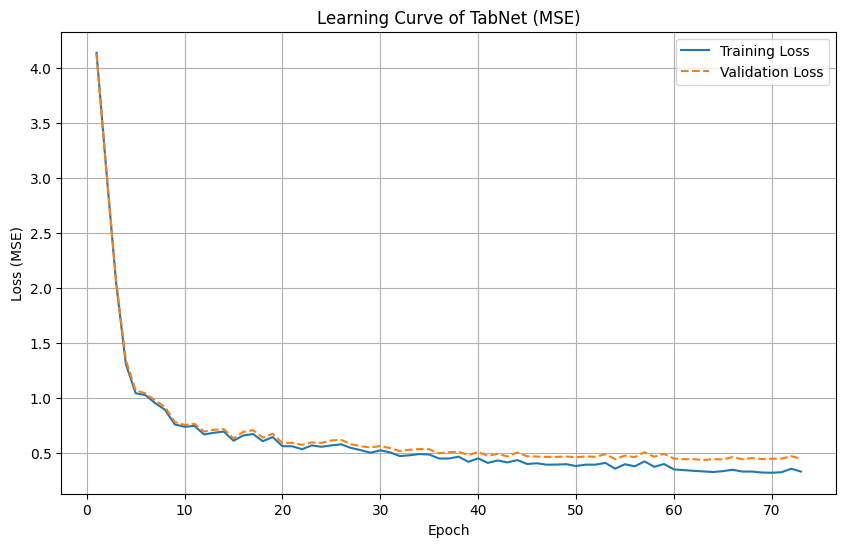

In [ ]:
# Extract losses from the callback
train_losses = history_callback.train_mse
val_losses = history_callback.val_mse

# Plot the learning curve
epochs = np.arange(1, len(train_losses) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve of TabNet (MSE)')
plt.legend()
plt.grid(True)
plt.show()

## Extreme Gradient Boosting (XGBoost)

In [ ]:
# Import library
from xgboost import XGBRegressor

### Base Model

In [ ]:
# Initialize XGBoost Regressor with default parameters
xgb = XGBRegressor()

# Fit the model
xgb.fit(X_train, y_train)

# Evaluate Model Performance
evaluate_model_performance(xgb)

[TRAINING RESULT]
Mean Absolute Error (MAE): 0.3479
Mean Squared Error (MSE): 0.2177
Root Mean Squared Error (RMSE): 0.4666
R-squared (R²): 0.9609

[TESTING RESULT]
Mean Absolute Error (MAE): 0.4013
Mean Squared Error (MSE): 0.3128
Root Mean Squared Error (RMSE): 0.5593
R-squared (R²): 0.9445


### Hyperparameter Tuning

In [ ]:
# Import library
from skopt import BayesSearchCV

In [ ]:
# Define the parameter search space
param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'n_estimators': (50, 500),
    'max_depth': (3, 10),
    'min_child_weight': (1, 10),
    'gamma': (0.0, 0.5),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0),
    'reg_alpha': (0.0, 3.0),   # L1 regularization term on weights
    'reg_lambda': (0.0, 3.0)   # L2 regularization term on weights
}

# Define the XGBoost model
xgb_model = XGBRegressor()

# Perform Bayesian Optimization using BayesSearchCV
xgb_opt = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space,
    n_iter=50,
    cv=3,
    random_state=42,
    verbose=1
)

# Fit the model
xgb_opt.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=False)

# Best hyperparameters
print("Best Hyperparameters: ", xgb_opt.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [ ]:
# Evaluate Model Performance
evaluate_model_performance(xgb_opt.best_estimator_)

[TRAINING RESULT]
Mean Absolute Error (MAE): 0.3312
Mean Squared Error (MSE): 0.1985
Root Mean Squared Error (RMSE): 0.4456
R-squared (R²): 0.9643

[TESTING RESULT]
Mean Absolute Error (MAE): 0.3854
Mean Squared Error (MSE): 0.2913
Root Mean Squared Error (RMSE): 0.5397
R-squared (R²): 0.9483


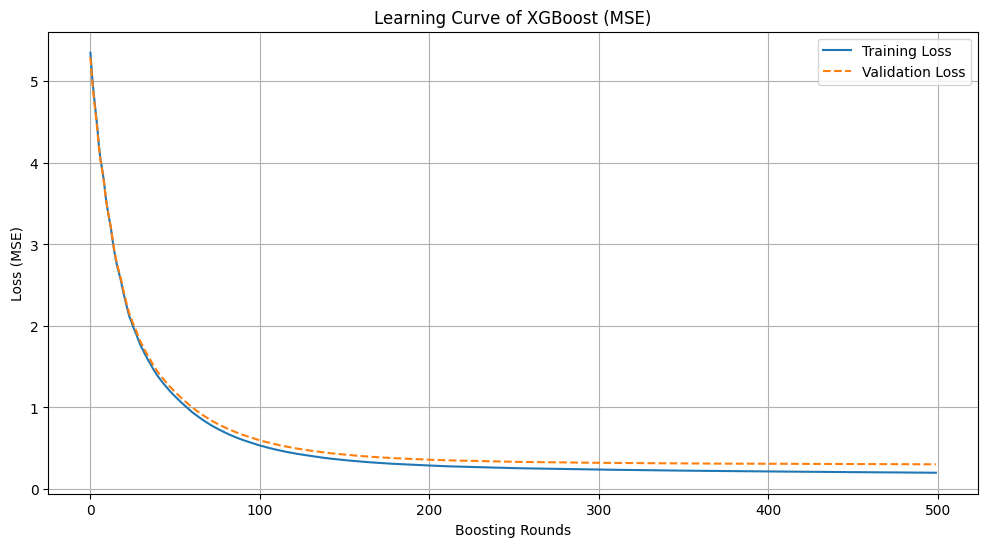

In [ ]:
# Retrieve the best estimator
best_xgb_model = xgb_opt.best_estimator_

# Extract evaluation results from the best model
evals_result = best_xgb_model.evals_result()

# Extract training and validation loss
boosting_round = len(evals_result['validation_0']['rmse'])
train_rmse = evals_result['validation_0']['rmse']
val_rmse = evals_result['validation_1']['rmse']

# Convert RMSE to MSE
train_mse = [rmse ** 2 for rmse in train_rmse]
val_mse = [rmse ** 2 for rmse in val_rmse]

# Plot the learning curve
plt.figure(figsize=(12, 6))
plt.plot(range(boosting_round), train_mse, label='Training Loss')
plt.plot(range(boosting_round), val_mse, label='Validation Loss', linestyle='--')
plt.xlabel('Boosting Rounds')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve of XGBoost (MSE)')
plt.legend()
plt.grid(True)
plt.show()

## Light Gradient Boosting Machine (LightGBM)

In [ ]:
# Import library
from lightgbm import LGBMRegressor

### Base Model

In [ ]:
# Initialize a basic LightGBM Regressor
lgb_reg = LGBMRegressor()

# Fit the model
lgb_reg.fit(X_train, y_train)

# Evaluate Model Performance
evaluate_model_performance(lgb_reg)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1816
[LightGBM] [Info] Number of data points in the train set: 69934, number of used features: 23
[LightGBM] [Info] Start training from score 4.003217
[TRAINING RESULT]
Mean Absolute Error (MAE): 0.3928
Mean Squared Error (MSE): 0.3021
Root Mean Squared Error (RMSE): 0.5496
R-squared (R²): 0.9457

[TESTING RESULT]
Mean Absolute Error (MAE): 0.4070
Mean Squared Error (MSE): 0.3392
Root Mean Squared Error (RMSE): 0.5824
R-squared (R²): 0.9399


### Hyperparameter Tuning

In [ ]:
# Import library
from skopt import BayesSearchCV

In [ ]:
# Define the parameter search space for LightGBM
param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'n_estimators': (50, 700),
    'num_leaves': (31, 128),
    'max_depth': (3, 30),
    'min_child_samples': (1, 50),
    'min_child_weight': (0.001, 10.0),
    'min_split_gain': (0.0, 0.5),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0),
    'reg_alpha': (0.0, 1.0),   # L1 regularization term
    'reg_lambda': (0.0, 1.0),   # L2 regularization term
}

# Initialize LightGBM model
lgb_model = LGBMRegressor(verbose=-1)

lgmb_opt = BayesSearchCV(
    estimator=lgb_model,
    search_spaces=param_space,
    n_iter=50,
    cv=3,
    random_state=42,
    verbose=1,
)

# Fit the model
lgmb_opt.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)])

# Best hyperparameters
print("Best Hyperparameters: ", lgmb_opt.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [ ]:
# Evaluate Model Performance
evaluate_model_performance(lgmb_opt.best_estimator_)

[TRAINING RESULT]
Mean Absolute Error (MAE): 0.3383
Mean Squared Error (MSE): 0.2149
Root Mean Squared Error (RMSE): 0.4636
R-squared (R²): 0.9614

[TESTING RESULT]
Mean Absolute Error (MAE): 0.3841
Mean Squared Error (MSE): 0.2993
Root Mean Squared Error (RMSE): 0.5471
R-squared (R²): 0.9469


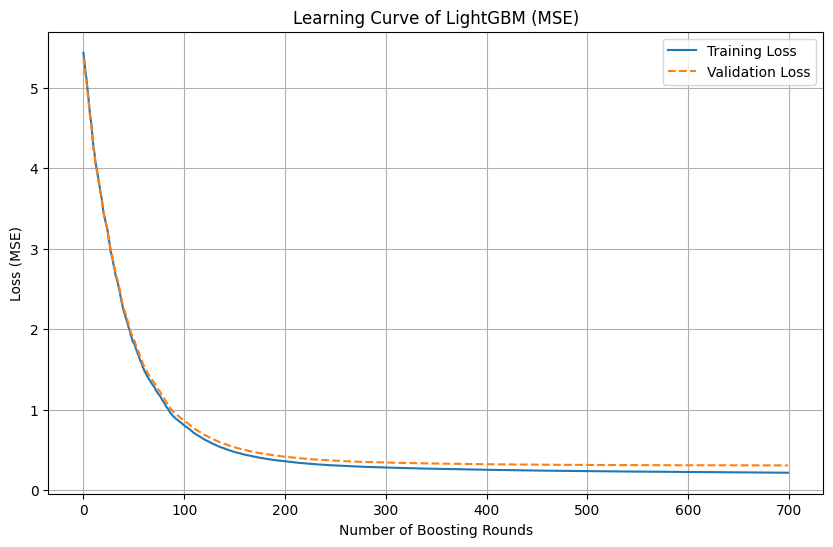

In [ ]:
# Extract evaluation results
evals_result = lgmb_opt.best_estimator_.evals_result_

# Extract training and validation loss
train_loss = evals_result['training']['l2']
val_loss = evals_result['valid_1']['l2']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.title('Learning Curve of LightGBM (MSE)')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

## Interpretability Analysis

In [ ]:
# Install/ Import libraries
pip install shap

import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 16.5 MB/s eta 0:00:00


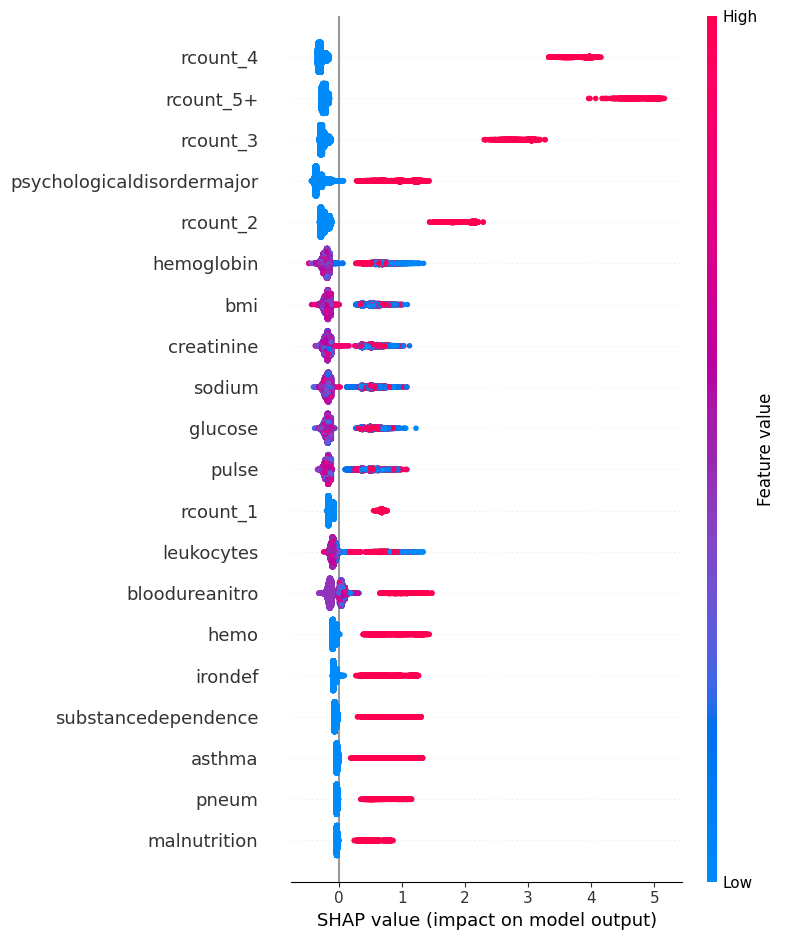

In [ ]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(xgb_opt)

# Calculate SHAP values for the dataset
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Deployment

In [ ]:
# Import library
import joblib

# Save the fitted encoder
encoder_path = 'onehot_encoder.pkl'
joblib.dump(onehot_encoder, encoder_path)

# Save the fitted RobustScaler
scaler_path = 'robust_scaler.pkl'
joblib.dump(robust_scaler, scaler_path)

# Define the path to save the model
model_path = 'xgboost_opt_model.pkl'
# Save the model
joblib.dump(xgb_opt.best_estimator_, model_path)